Этот ноутбук содержит код, использованный для написания статьи "Идентификация математической модели экономики Монголии на основе статистических данных", опубликованной в  Сборнике трудов молодёжной секции в рамках IX Международной научно-практической конференции «Системы управления, сложные системы: моделирование, устойчивость, стабилизация, интеллектуальные технологии»"
(CSMSSIT-2023), стр. 110-118, г. Липецк, Россия, май 2023 г..

Данный ноутбук не проходил ревью.

В некоторых местах используется грубый перебор для поиска оптимальных параметров. В черновых вариантах этого ноутбука при подготовке статьи были попытки использовать известные автору на момент подготовки данной работы (март-апрель 2023 года) солверы, но успехом данные попытки не увенчались.

Автор старался изначально писать код максимально понятным (не только для себя) образом, давать комментарии и пояснения. Тем не менее, крайне рекомендуется читать этот ноутбук вместе со статьёй (так должно быть понятнее). Если вам что-то неясно, и (или) вы нашли ошибку в коде, и (или) вы имеете замечания к работе, свяжитесь, пожалуйста, с автором.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
normalize_const_money = 1000000000000

In [3]:
YEARS = ['1970', '1971', '1972', '1973', '1974', '1975',
'1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
'1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
'1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
'2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015', '2016', '2017', '2018', '2019', '2020', '2021']
NAMES = ['CountryID',
'Country', 'Currency', 'IndicatorName', '1970', '1971', '1972', '1973', '1974',
'1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
'1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
'1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
'2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [4]:
YEARS_np = np.array(YEARS, dtype=str)
YEARS_np_int = np.array(YEARS, dtype=int)

In [5]:
CONST_2000 = 30

In [6]:
YEARS_2000_2021 = YEARS[CONST_2000:]
YEARS_2000_2021_np = np.array(YEARS_2000_2021, dtype=str)
YEARS_2000_2021_np_int = np.array(YEARS_2000_2021, dtype=int)

 GDP (Gross Domestic Product), FCE (Final consumption expenditure), GCF (Gross capital formation), EGS (Exports of goods and services), IGS (Imports of goods and services)  в текущих ценах (источник: https://unstats.un.org/unsd/snaama/Downloads , GDP and its breakdown at constant 2015 prices in National currency,  All countries for all years - sorted alphabetically):

In [10]:
GDP_current_NC_pd = pd.read_excel('GDP_current_NC.xlsx', names=NAMES)

GDP_current_NC_pd = GDP_current_NC_pd.drop([0, 1]).reset_index()
Mongolia_GDP_current_NC_pd = GDP_current_NC_pd[GDP_current_NC_pd['Country'] == 'Mongolia']

Mongolia_GDP_current_NC_pd_TVA = Mongolia_GDP_current_NC_pd[Mongolia_GDP_current_NC_pd['IndicatorName'] ==
                           'Total Value Added']

Mongolia_GDP_current_NC_pd_TVA_1970_2021 = Mongolia_GDP_current_NC_pd_TVA[YEARS]

Mongolia_GDP_current_NC_np_array_TVA_1970_2021 = np.array(Mongolia_GDP_current_NC_pd_TVA_1970_2021, dtype=float)
Mongolia_GDP_current_NC_np_array_TVA_1970_2021_0 = Mongolia_GDP_current_NC_np_array_TVA_1970_2021[0]
Mongolia_GDP_current_NC_np_array_TVA_1970_2021_0_normalized = Mongolia_GDP_current_NC_np_array_TVA_1970_2021 / normalize_const_money
Mongolia_GDP_current_NC_np_array_TVA_1970_2021_0_normalized_0 = Mongolia_GDP_current_NC_np_array_TVA_1970_2021_0_normalized[0]
Mongolia_GDP_current_1970_2021 = Mongolia_GDP_current_NC_np_array_TVA_1970_2021_0_normalized_0

Mongolia_FCE_current_1970_2021 = np.array(((GDP_current_NC_pd[GDP_current_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_current_NC_pd['IndicatorName'] == 'Final consumption expenditure'])[YEARS])[0] / normalize_const_money

Mongolia_GCF_current_1970_2021 = np.array(((GDP_current_NC_pd[GDP_current_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_current_NC_pd['IndicatorName'] == 'Gross capital formation'])[YEARS])[0] / normalize_const_money

Mongolia_EGS_current_1970_2021 = np.array(((GDP_current_NC_pd[GDP_current_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_current_NC_pd['IndicatorName'] == 'Exports of goods and services'])[YEARS])[0] / normalize_const_money

Mongolia_IGS_current_1970_2021 = np.array(((GDP_current_NC_pd[GDP_current_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_current_NC_pd['IndicatorName'] == 'Imports of goods and services'])[YEARS])[0] / normalize_const_money


GDP и другое в постоянных ценах 2015 года  (источник: https://unstats.un.org/unsd/snaama/Downloads , GDP and its breakdown at current prices in National currency,  All countries for all years - sorted alphabetically):

In [13]:
GDP_constant_NC_pd = pd.read_excel('GDP_constant_NC.xlsx', names=NAMES)

GDP_constant_NC_pd = GDP_constant_NC_pd.drop([0, 1]).reset_index()
Mongolia_GDP_constant_NC_pd = GDP_constant_NC_pd[GDP_constant_NC_pd['Country'] ==
                                               'Mongolia']

Mongolia_GDP_constant_NC_pd_TVA = Mongolia_GDP_constant_NC_pd[Mongolia_GDP_constant_NC_pd['IndicatorName'] ==
                           'Total Value Added']

Mongolia_GDP_constant_NC_pd_TVA_1970_2021 = Mongolia_GDP_constant_NC_pd_TVA[YEARS]

Mongolia_GDP_constant_NC_np_array_TVA_1970_2021 = np.array(Mongolia_GDP_constant_NC_pd_TVA_1970_2021, dtype=float)
Mongolia_GDP_constant_NC_np_array_TVA_1970_2021_0 = Mongolia_GDP_constant_NC_np_array_TVA_1970_2021[0]
Mongolia_GDP_constant_NC_np_array_TVA_1970_2021_0_normalized = Mongolia_GDP_constant_NC_np_array_TVA_1970_2021 / normalize_const_money
Mongolia_GDP_constant_NC_np_array_TVA_1970_2021_0_normalized_0 = Mongolia_GDP_constant_NC_np_array_TVA_1970_2021_0_normalized[0]
Mongolia_GDP_constant_1970_2021 = Mongolia_GDP_constant_NC_np_array_TVA_1970_2021_0_normalized_0

Mongolia_FCE_constant_1970_2021 = np.array(((GDP_constant_NC_pd[GDP_constant_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_constant_NC_pd['IndicatorName'] == 'Final consumption expenditure'])[YEARS])[0] / normalize_const_money

Mongolia_GCF_constant_1970_2021 = np.array(((GDP_constant_NC_pd[GDP_constant_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_constant_NC_pd['IndicatorName'] == 'Gross capital formation'])[YEARS])[0] / normalize_const_money

Mongolia_EGS_constant_1970_2021 = np.array(((GDP_constant_NC_pd[GDP_constant_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_constant_NC_pd['IndicatorName'] == 'Exports of goods and services'])[YEARS])[0] / normalize_const_money

Mongolia_IGS_constant_1970_2021 = np.array(((GDP_constant_NC_pd[GDP_constant_NC_pd['Country'] ==
                                               'Mongolia'])[Mongolia_GDP_constant_NC_pd['IndicatorName'] == 'Imports of goods and services'])[YEARS])[0] / normalize_const_money

Население Монголии (источник: https://unstats.un.org/unsd/amaapi/api/file/30):

In [15]:
population_pd_original = pd.read_excel('Download-Xpop.xlsx', names=['CountryID',
'Country', 'Currency', 'Measure', '1970', '1971', '1972', '1973', '1974',
'1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
'1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
'1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
'2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015', '2016', '2017', '2018', '2019', '2020', '2021'])
population_pd = population_pd_original.drop([0, 1]).reset_index()

In [16]:
CONST_NORMALIZE_POPULATION = 1000000

In [17]:
Mongolia_population_pd = population_pd[population_pd['Country'] == 'Mongolia']
Mongolia_population_pd_pop = Mongolia_population_pd[Mongolia_population_pd['Measure'] == 'Population']
Mongolia_population_1970_2021 = np.array(Mongolia_population_pd_pop[YEARS])[0] / CONST_NORMALIZE_POPULATION

In [18]:
Mongolia_population_2000_2021 = Mongolia_population_1970_2021[CONST_2000:]

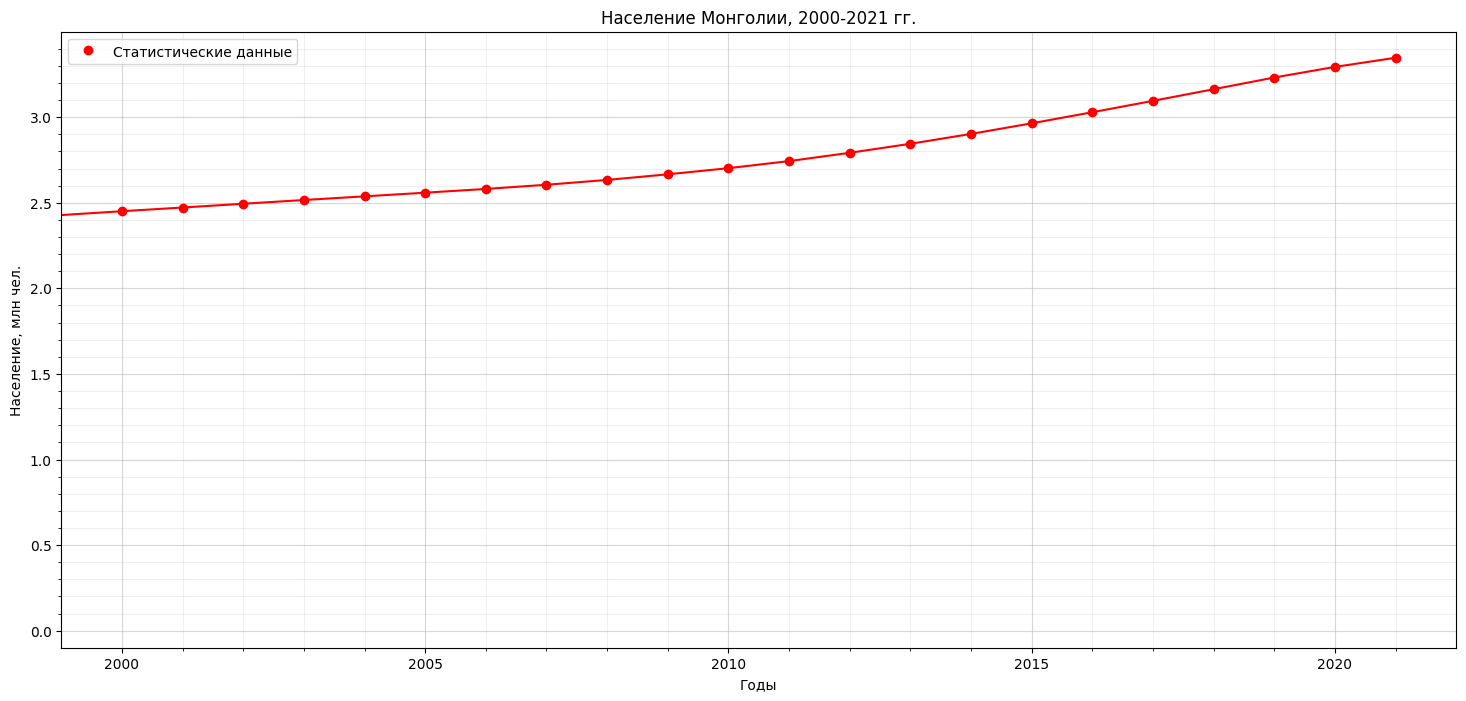

In [19]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

plt.plot(YEARS_np_int, Mongolia_population_1970_2021, color='red')

plt.plot(2000, Mongolia_population_2000_2021[0], 'ro', label='Статистические данные',)

for i in range(1, 22):
    plt.plot(2000 + i, Mongolia_population_2000_2021[i], '-ro')

plt.xlim(1999, 2022)
plt.ylim(-0.1, 3.5)

plt.title('Население Монголии, 2000-2021 гг.')

plt.xlabel('Годы')
plt.ylabel('Население, млн чел.')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 3.5, 0.5))
ax.set_yticks(np.arange(0, 3.5, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [21]:
Mongolia_specific_FCE_current_1970_2021 = Mongolia_FCE_current_1970_2021 / Mongolia_population_1970_2021
Mongolia_specific_FCE_constant_1970_2021 = Mongolia_FCE_constant_1970_2021 / Mongolia_population_1970_2021

Mongolia_specific_GCF_current_1970_2021 = Mongolia_GCF_current_1970_2021 / Mongolia_population_1970_2021
Mongolia_specific_GCF_constant_1970_2021 = Mongolia_GCF_constant_1970_2021 / Mongolia_population_1970_2021

Mongolia_specific_EGS_current_1970_2021 = Mongolia_EGS_current_1970_2021 / Mongolia_population_1970_2021
Mongolia_specific_EGS_constant_1970_2021 = Mongolia_EGS_constant_1970_2021 / Mongolia_population_1970_2021

Mongolia_specific_IGS_current_1970_2021 = Mongolia_IGS_current_1970_2021 / Mongolia_population_1970_2021
Mongolia_specific_IGS_constant_1970_2021 = Mongolia_IGS_constant_1970_2021 / Mongolia_population_1970_2021

Mongolia_specific_GDP_current_1970_2021 = Mongolia_GDP_current_1970_2021 / Mongolia_population_1970_2021
Mongolia_specific_GDP_constant_1970_2021 = Mongolia_GDP_constant_1970_2021 / Mongolia_population_1970_2021

In [22]:
Mongolia_unbalancing_percent_constant_1970_2021 = 100 * (((Mongolia_GDP_constant_1970_2021 + Mongolia_IGS_constant_1970_2021) - (Mongolia_FCE_constant_1970_2021 + Mongolia_GCF_constant_1970_2021 + Mongolia_EGS_constant_1970_2021)) / (Mongolia_GDP_constant_1970_2021 + Mongolia_IGS_constant_1970_2021) )

In [23]:
mean_unpalancing_percent_constant_1970_2021 = np.mean(Mongolia_unbalancing_percent_constant_1970_2021)
mean_unpalancing_percent_constant_1970_2021

-7.615597554925368

In [24]:
Mongolia_unbalancing_percent_constant_2000_2021 = Mongolia_unbalancing_percent_constant_1970_2021[CONST_2000:]
mean_unpalancing_percent_constant_2000_2021 = np.mean(Mongolia_unbalancing_percent_constant_2000_2021)
mean_unpalancing_percent_constant_2000_2021

-3.7678796223907494

In [25]:
C_current_1970_2021 = Mongolia_FCE_current_1970_2021.copy()
C_constant_1970_2021 = Mongolia_FCE_constant_1970_2021.copy()
J_current_1970_2021 = Mongolia_GCF_current_1970_2021.copy()
J_constant_1970_2021 = Mongolia_GCF_constant_1970_2021.copy()
E_current_1970_2021 = Mongolia_EGS_current_1970_2021.copy()
E_constant_1970_2021 = Mongolia_EGS_constant_1970_2021.copy()
I_current_1970_2021 = Mongolia_IGS_current_1970_2021.copy()
I_constant_1970_2021 = Mongolia_IGS_constant_1970_2021.copy()
Y_current_1970_2021 = Mongolia_GDP_current_1970_2021.copy()
Y_constant_1970_2021 = Mongolia_GDP_constant_1970_2021.copy()

p_C_1970_2021 = C_current_1970_2021 / C_constant_1970_2021
p_J_1970_2021 = J_current_1970_2021 / J_constant_1970_2021
p_E_1970_2021 = E_current_1970_2021 / E_constant_1970_2021
p_I_1970_2021 = I_current_1970_2021 / I_constant_1970_2021
p_Y_1970_2021 = Y_current_1970_2021 / Y_constant_1970_2021

In [26]:
CONST_2014 = CONST_2000 + 14

In [27]:
Mongolia_population_1970_2021[CONST_2014:]

array([2.902823, 2.964749, 3.029555, 3.09603 , 3.163991, 3.23243 ,
       3.294335, 3.347782])

Дополним данные численностью населения за 2022-ой год (источник: https://www.populationpyramid.net/ru/монголия/2022/ , 2022 г.)

In [28]:
Mongolia_population_2014_2022 = np.array([2.902823, 2.964749, 3.029555, 3.09603 , 3.163991, 3.23243 , 3.294335, 3.347782, 3.398366])

In [29]:
Mongolia_population_2014_2021 = Mongolia_population_1970_2021[CONST_2014:]
Mongolia_population_2014_2021

array([2.902823, 2.964749, 3.029555, 3.09603 , 3.163991, 3.23243 ,
       3.294335, 3.347782])

Возьмём данные по численности трудоустроенных за 2021 и 2022 годы (4-ые кварталы) (источник: https://www.theglobaleconomy.com/Mongolia/employed_persons/), рассчитаем доли занятых в населении за 2021-2022 гг. и линейной интерполяцией построим рассчёт доли занятых в населении до 2014 г.

In [30]:
Mongolia_number_employed_persons_2022 = 1.16
Mongolia_number_employed_persons_2021 = 1.13

Mongolia_fraction_employed_persons_2014_2022 = [0, 0, 0, 0, 0, 0, 0,  Mongolia_number_employed_persons_2021 / Mongolia_population_2014_2022[-2],  Mongolia_number_employed_persons_2022 / Mongolia_population_2014_2022[-1]]

year_difference = Mongolia_number_employed_persons_2022 / Mongolia_population_2014_2022[-1]  - Mongolia_number_employed_persons_2021 / Mongolia_population_2014_2022[-2]

Аналог $\Delta$ из статьи:

In [31]:
year_difference

0.0038036023248073647

In [32]:
Mongolia_fraction_employed_persons_2000_2022 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,  Mongolia_number_employed_persons_2021 / Mongolia_population_2014_2022[-2],  Mongolia_number_employed_persons_2022 / Mongolia_population_2014_2022[-1]]

In [33]:
for year in range(2021, 2013, -1):
    Mongolia_fraction_employed_persons_2014_2022[year - 2014] = Mongolia_fraction_employed_persons_2014_2022[year - 2014 + 1] - year_difference

Mongolia_fraction_employed_persons_2014_2021 = Mongolia_fraction_employed_persons_2014_2022[:-1]
Mongolia_fraction_employed_persons_2014_2021

[0.3109116962254299,
 0.3147152985502373,
 0.31851890087504464,
 0.322322503199852,
 0.32612610552465937,
 0.32992970784946674,
 0.3337333101742741,
 0.33753691249908147]

In [34]:
for year in range(2021, 1999, -1):
    Mongolia_fraction_employed_persons_2000_2022[year - 2000] = Mongolia_fraction_employed_persons_2000_2022[year - 2000 + 1] - year_difference

Mongolia_fraction_employed_persons_2000_2021 = Mongolia_fraction_employed_persons_2000_2022[:-1]
Mongolia_fraction_employed_persons_2000_2021

[0.2576612636781268,
 0.26146486600293417,
 0.26526846832774154,
 0.2690720706525489,
 0.27287567297735627,
 0.27667927530216363,
 0.280482877626971,
 0.28428647995177836,
 0.2880900822765857,
 0.2918936846013931,
 0.29569728692620045,
 0.2995008892510078,
 0.3033044915758152,
 0.30710809390062255,
 0.3109116962254299,
 0.3147152985502373,
 0.31851890087504464,
 0.322322503199852,
 0.32612610552465937,
 0.32992970784946674,
 0.3337333101742741,
 0.33753691249908147]

In [35]:
Mongolia_fraction_employed_persons_2014_2022_np =  np.array(Mongolia_fraction_employed_persons_2014_2022)

In [36]:
Mongolia_fraction_employed_persons_2014_2021_np =  np.array(Mongolia_fraction_employed_persons_2014_2021)

In [37]:
Mongolia_fraction_employed_persons_2000_2022_np =  np.array(Mongolia_fraction_employed_persons_2000_2022)

In [38]:
Mongolia_fraction_employed_persons_2000_2021_np =  np.array(Mongolia_fraction_employed_persons_2000_2021)

In [39]:
Mongolia_population_2014_2021 = Mongolia_population_2014_2022[:-1]
Mongolia_population_2014_2021

array([2.902823, 2.964749, 3.029555, 3.09603 , 3.163991, 3.23243 ,
       3.294335, 3.347782])

In [40]:
Mongolia_population_2000_2021 = Mongolia_population_1970_2021[CONST_2000:]
Mongolia_population_2000_2021

array([2.450979, 2.472601, 2.494617, 2.516454, 2.537949, 2.559255,
       2.581242, 2.605643, 2.633887, 2.666713, 2.70252 , 2.743938,
       2.792349, 2.845153, 2.902823, 2.964749, 3.029555, 3.09603 ,
       3.163991, 3.23243 , 3.294335, 3.347782])

In [41]:
Mongolia_number_employed_persons_2014_2021_counted = Mongolia_fraction_employed_persons_2014_2021_np * Mongolia_population_2014_2021
Mongolia_number_employed_persons_2014_2021_counted

array([0.90252162, 0.93305187, 0.96497053, 0.99792014, 1.03186006,
       1.06647469, 1.09942932, 1.13      ])

In [42]:
Mongolia_number_employed_persons_2000_2021_counted = Mongolia_fraction_employed_persons_2000_2021_np * Mongolia_population_2000_2021
Mongolia_number_employed_persons_2000_2021_counted

array([0.63152235, 0.64649829, 0.66174323, 0.67710749, 0.69254454,
       0.70809282, 0.72399418, 0.74074908, 0.75879672, 0.77839668,
       0.79912783, 0.82181187, 0.84693199, 0.87376951, 0.90252162,
       0.93305187, 0.96497053, 0.99792014, 1.03186006, 1.06647469,
       1.09942932, 1.13      ])

In [43]:
Mongolia_number_employed_persons_2000_2021_counted = Mongolia_fraction_employed_persons_2000_2021_np * Mongolia_population_2000_2021
Mongolia_number_employed_persons_2000_2021_counted

array([0.63152235, 0.64649829, 0.66174323, 0.67710749, 0.69254454,
       0.70809282, 0.72399418, 0.74074908, 0.75879672, 0.77839668,
       0.79912783, 0.82181187, 0.84693199, 0.87376951, 0.90252162,
       0.93305187, 0.96497053, 0.99792014, 1.03186006, 1.06647469,
       1.09942932, 1.13      ])

Вычислим относительные индексы цен $\pi_C, \pi_I, \pi_J, \pi_E$:

In [44]:
pi_C_1970_2021 = p_C_1970_2021 / p_Y_1970_2021
pi_I_1970_2021 = p_I_1970_2021 / p_Y_1970_2021
pi_J_1970_2021 = p_J_1970_2021 / p_Y_1970_2021
pi_E_1970_2021 = p_E_1970_2021 / p_Y_1970_2021

In [45]:
pi_C_2000_2021 = pi_C_1970_2021[CONST_2000:]
pi_E_2000_2021 = pi_E_1970_2021[CONST_2000:]
pi_I_2000_2021 = pi_I_1970_2021[CONST_2000:]
pi_J_2000_2021 = pi_J_1970_2021[CONST_2000:]

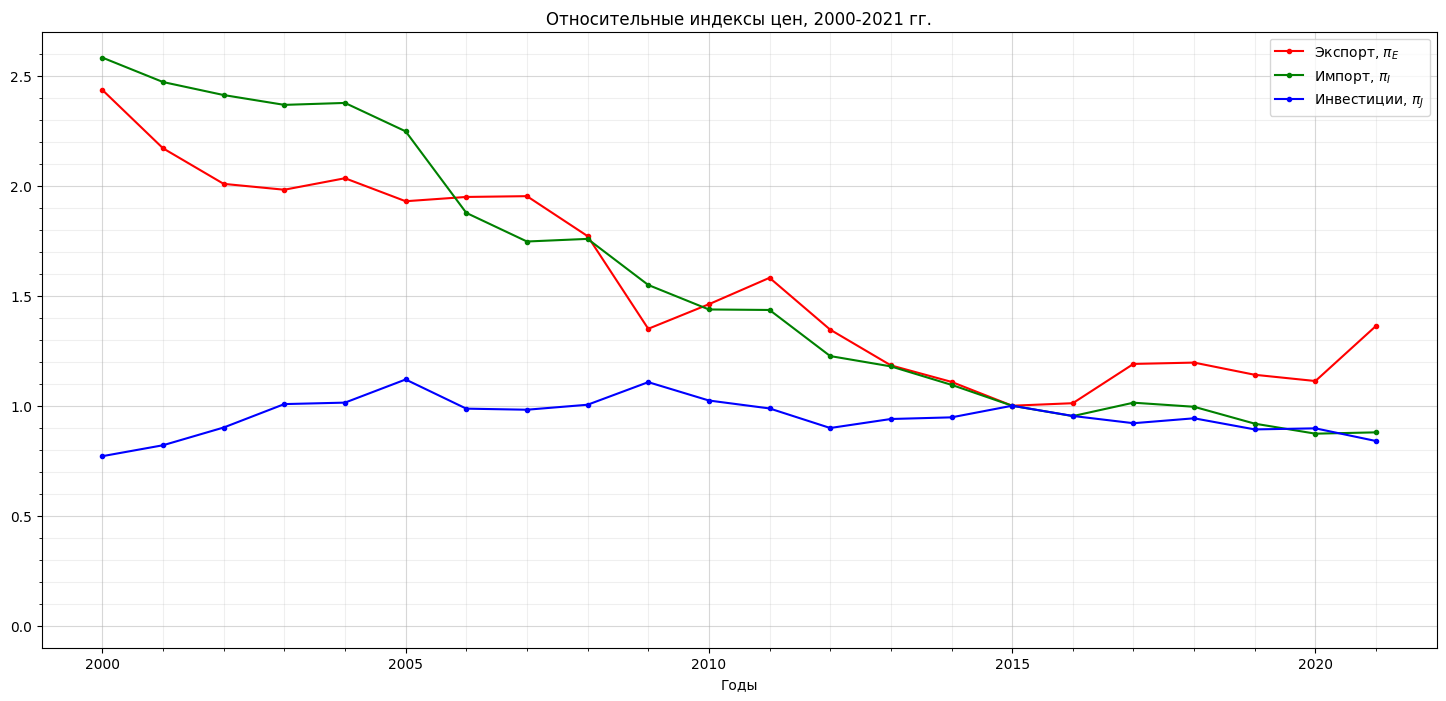

In [46]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2000_2021_np_int, pi_E_2000_2021, label=r'Экспорт, $\pi_{E}$', color='red', marker='.')
ax.plot(YEARS_2000_2021_np_int, pi_I_2000_2021, label='Импорт, $\pi_{I}$', color='green', marker='.')
ax.plot(YEARS_2000_2021_np_int, pi_J_2000_2021, label='Инвестиции, $\pi_{J}$', color='blue', marker='.')

plt.xlim(1999, 2022)
plt.ylim(-0.1, 2.7)

plt.title('Относительные индексы цен, 2000-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.7, 0.5))
ax.set_yticks(np.arange(0, 2.7, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

Далее $Y$ -- ВВП, $I$ -- импорт, $E$ -- экспорт, $C$ -- потребление, $J$ -- инвестиции.

Выделим данные за 2000-2021 и 2014-2021 гг.

In [47]:
pi_C_2014_2021 = pi_C_1970_2021[CONST_2014:]
pi_E_2014_2021 = pi_E_1970_2021[CONST_2014:]
pi_I_2014_2021 = pi_I_1970_2021[CONST_2014:]
pi_J_2014_2021 = pi_J_1970_2021[CONST_2014:]

J_constant_2014_2021 = J_constant_1970_2021[CONST_2014:]
I_constant_2014_2021 = I_constant_1970_2021[CONST_2014:]
C_constant_2014_2021 = C_constant_1970_2021[CONST_2014:]
E_constant_2014_2021 = E_constant_1970_2021[CONST_2014:]
Y_constant_2014_2021 = Y_constant_1970_2021[CONST_2014:]

In [48]:
pi_C_2000_2021 = pi_C_1970_2021[CONST_2000:]
pi_E_2000_2021 = pi_E_1970_2021[CONST_2000:]
pi_I_2000_2021 = pi_I_1970_2021[CONST_2000:]
pi_J_2000_2021 = pi_J_1970_2021[CONST_2000:]

J_constant_2000_2021 = J_constant_1970_2021[CONST_2000:]
I_constant_2000_2021 = I_constant_1970_2021[CONST_2000:]
C_constant_2000_2021 = C_constant_1970_2021[CONST_2000:]
E_constant_2000_2021 = E_constant_1970_2021[CONST_2000:]
Y_constant_2000_2021 = Y_constant_1970_2021[CONST_2000:]

$$\sigma (t) := \frac{\pi_{J}(t) \cdot J(T)}{Y(t) + \pi_{I}(t) \cdot I(t)}$$

In [49]:
sigma_2014_2021 = (pi_J_2014_2021 * J_constant_2014_2021) / (Y_constant_2014_2021 + (pi_I_2014_2021 * I_constant_2014_2021))
sigma_2014_2021

array([0.23809528, 0.178629  , 0.15951423, 0.18555583, 0.25018939,
       0.23026214, 0.15364477, 0.24073081])

In [50]:
sigma_2000_2021 = (pi_J_2000_2021 * J_constant_2000_2021) / (Y_constant_2000_2021 + (pi_I_2000_2021 * I_constant_2000_2021))
sigma_2000_2021

array([0.1967638 , 0.17486532, 0.16800629, 0.21874878, 0.20845198,
       0.25980931, 0.26447864, 0.27644834, 0.29520347, 0.24524213,
       0.28740379, 0.35923788, 0.36085892, 0.35502852, 0.23809528,
       0.178629  , 0.15951423, 0.18555583, 0.25018939, 0.23026214,
       0.15364477, 0.24073081])

$$\delta (t) := \frac{\pi_{E}(t) \cdot E(t)}{Y(t)}$$

In [51]:
delta_2014_2021 = (pi_E_2014_2021 * E_constant_2014_2021) / Y_constant_2014_2021
delta_2014_2021

array([0.57629877, 0.48149815, 0.55487973, 0.65066994, 0.65206143,
       0.66244666, 0.63709023, 0.66647982])

In [52]:
delta_2000_2021 = (pi_E_2000_2021 * E_constant_2000_2021) / Y_constant_2000_2021
delta_2000_2021

array([0.5096921 , 0.48252483, 0.48257275, 0.49418048, 0.57498525,
       0.54987219, 0.55519472, 0.55607049, 0.50546937, 0.4648646 ,
       0.52000005, 0.60111483, 0.49019145, 0.43875274, 0.57629877,
       0.48149815, 0.55487973, 0.65066994, 0.65206143, 0.66244666,
       0.63709023, 0.66647982])

$$\rho (t) := \frac{\pi_{I}(t) \cdot I(t)}{Y(t) - \pi_{E}(t) \cdot E(t)}$$

In [53]:
rho_2014_2021 = (pi_I_2014_2021 * I_constant_2014_2021) / (Y_constant_2014_2021 - (pi_E_2014_2021 * E_constant_2014_2021))
rho_2014_2021

array([1.48574072, 0.95565261, 1.2296967 , 1.78705362, 2.19711845,
       2.16008065, 1.6799382 , 2.01487247])

In [54]:
rho_2000_2021 = (pi_I_2000_2021 * I_constant_2000_2021) / (Y_constant_2000_2021 - (pi_E_2000_2021 * E_constant_2000_2021))
rho_2000_2021

array([1.39204496, 1.29277225, 1.32747071, 1.35053883, 1.67209415,
       1.40828288, 1.19617935, 1.30393566, 1.35392671, 1.0587644 ,
       1.31522972, 2.13475051, 1.45680661, 1.23466394, 1.48574072,
       0.95565261, 1.2296967 , 1.78705362, 2.19711845, 2.16008065,
       1.6799382 , 2.01487247])

In [55]:
YEARS_2014_2021 = YEARS[CONST_2014:]
YEARS_2014_2021_np = np.array(YEARS_2014_2021)
YEARS_2014_2021_np_int = np.array(YEARS_2014_2021, dtype=int)

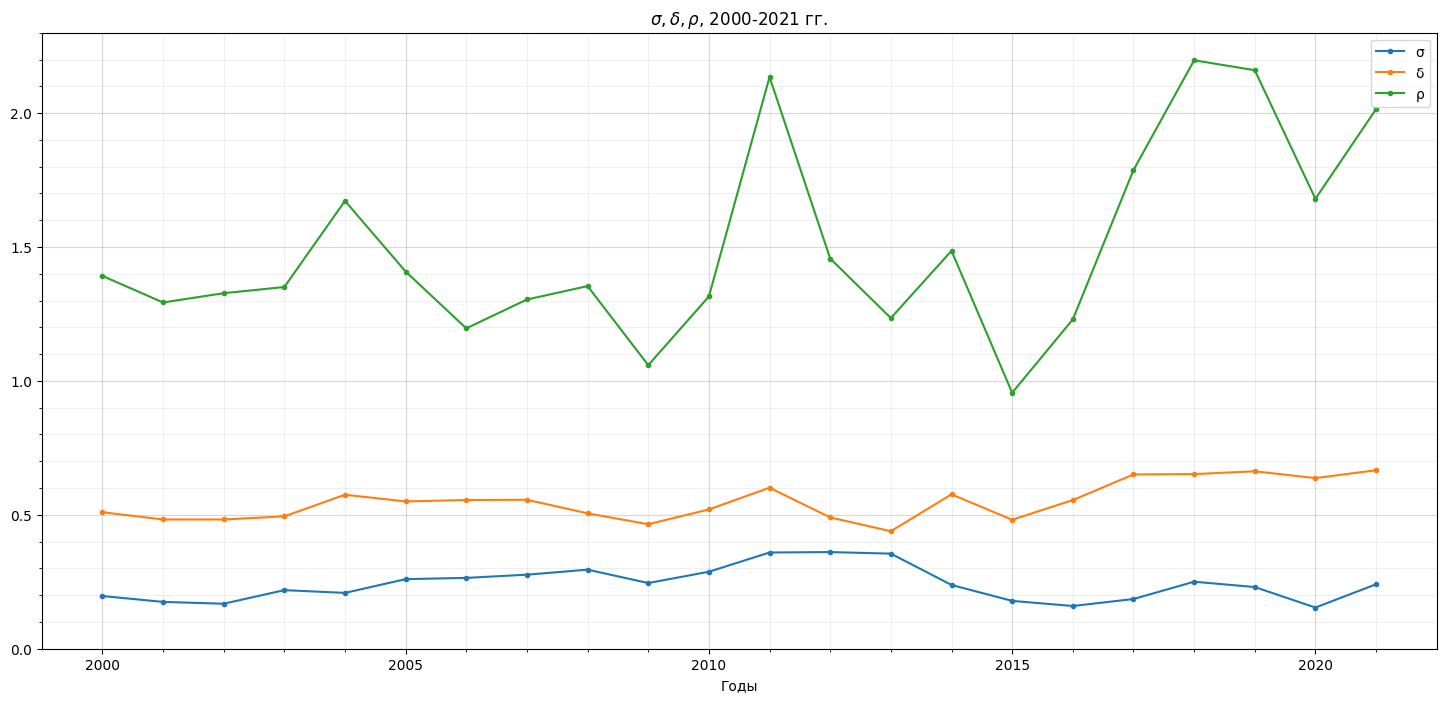

In [56]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

plt.plot(YEARS_2000_2021_np_int, sigma_2000_2021, label='σ', marker='.')
plt.plot(YEARS_2000_2021_np_int, delta_2000_2021, label='δ', marker='.')
plt.plot(YEARS_2000_2021_np_int, rho_2000_2021, label='ρ', marker='.')

plt.xlim(1999, 2022)

plt.title(r'$\sigma, \delta, \rho$, 2000-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.4, 0.5))
ax.set_yticks(np.arange(0, 2.4, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

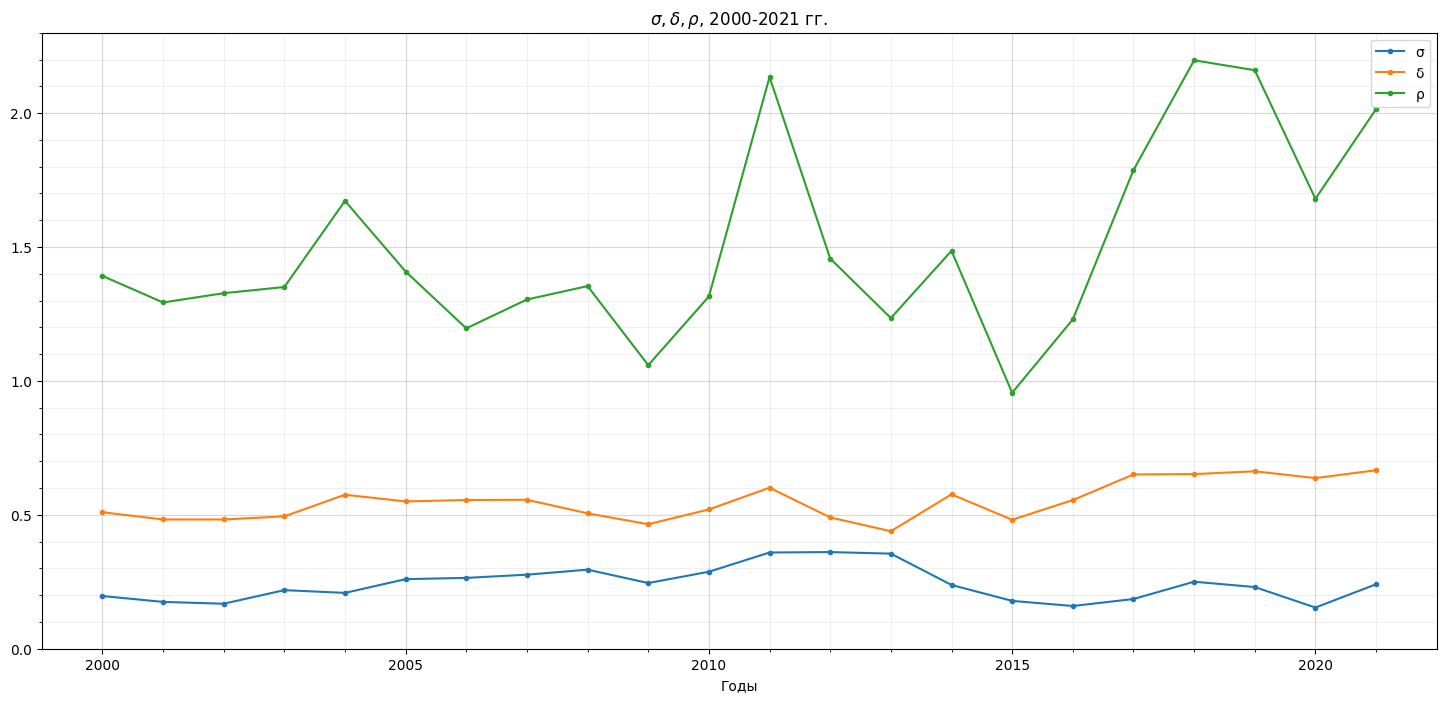

In [57]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

plt.plot(YEARS_2000_2021_np_int, sigma_2000_2021, label='σ', marker='.')
plt.plot(YEARS_2000_2021_np_int, delta_2000_2021, label='δ', marker='.')
plt.plot(YEARS_2000_2021_np_int, rho_2000_2021, label='ρ', marker='.')

plt.xlim(1999, 2022)

plt.title(r'$\sigma, \delta, \rho$, 2000-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.4, 0.5))
ax.set_yticks(np.arange(0, 2.4, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.savefig('sigma_delta_rho_2000_2021.pdf')
files.download('sigma_delta_rho_2000_2021.pdf')

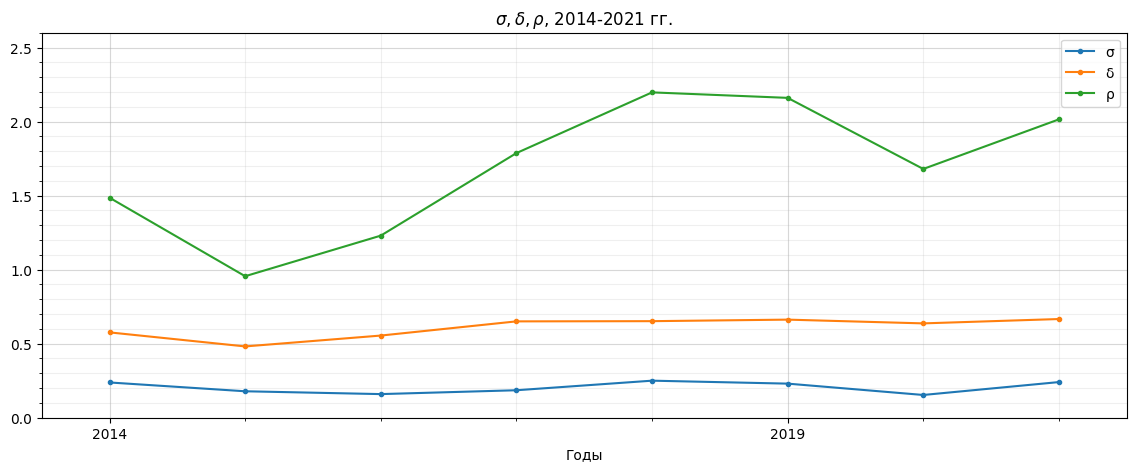

In [58]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, sigma_2014_2021, label='σ', marker='.')
plt.plot(YEARS_2014_2021_np_int, delta_2014_2021, label='δ', marker='.')
plt.plot(YEARS_2014_2021_np_int, rho_2014_2021, label='ρ', marker='.')

plt.xlim(2013.5, 2021.5)

plt.title(r'$\sigma, \delta, \rho$, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.7, 0.5))
ax.set_yticks(np.arange(0, 2.7, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [59]:
def min_max_mean(array: np.array):
    return (1/2)*(array.max() + array.min())

In [60]:
rho_2014_2021_mean = rho_2014_2021.mean()
rho_2014_2021_min_max_mean = min_max_mean(rho_2014_2021)

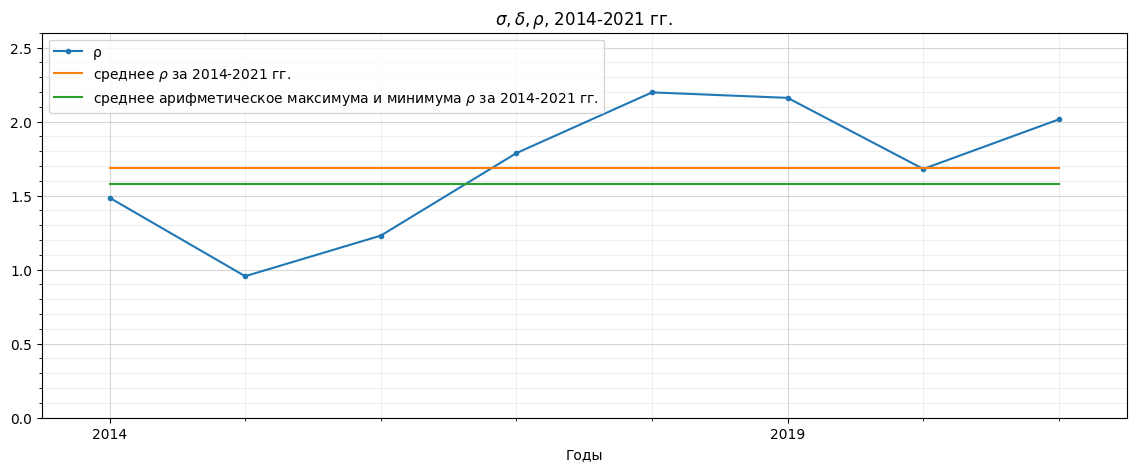

In [61]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, rho_2014_2021, label='ρ', marker='.')
plt.plot(YEARS_2014_2021_np_int, np.array([rho_2014_2021_mean] * 8, dtype=float), label=r'среднее $\rho$ за 2014-2021 гг.')
plt.plot(YEARS_2014_2021_np_int, np.array([rho_2014_2021_min_max_mean] * 8, dtype=float), label=r'среднее арифметическое максимума и минимума $\rho$ за 2014-2021 гг.')

plt.xlim(2013.5, 2021.5)

plt.title(r'$\sigma, \delta, \rho$, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.7, 0.5))
ax.set_yticks(np.arange(0, 2.7, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [62]:
rho_2014_2021_less_than_min_max_mean =  rho_2014_2021[rho_2014_2021<rho_2014_2021_min_max_mean]
rho_2014_2021_less_than_min_max_mean_mean = rho_2014_2021_less_than_min_max_mean.mean()
rho_2014_2021_less_than_min_max_mean_min_max_mean = min_max_mean(rho_2014_2021_less_than_min_max_mean)

In [63]:
YEARS_2014_2021_np_int_rho_less_than_min_max_mean_int = [2014, 2015, 2016]
YEARS_2014_2021_np_int_rho_less_than_min_max_mean_int_np = np.array(YEARS_2014_2021_np_int_rho_less_than_min_max_mean_int, dtype=int)

In [64]:
def sinus(mediana, amplitude, period, shift, array, print_flag=False):
    res = np.array(amplitude * np.sin((2*np.pi / period) * array - shift) + mediana, dtype=float)
    if print_flag:
        print("sinus", array, res)
    return res

In [65]:
def create_arange(left, right, step_param):
    return np.arange(left, right + step_param, step=step_param)

In [66]:
arange_2014_2021 = create_arange(2014, 2021, 0.1)

In [67]:
def create_value_array(value, length):
    return np.array([value] * length, dtype=float)

In [68]:
def create_year_map(left_year, right_year, array):
    if (right_year - left_year + 1 != len(array)):
        raise Exception("Wrong dimension(s)")
    array_map_left_year_right_year = {}
    length = len(array)
    for i in range(length):
        current_year = i + left_year
        current_year_string = str(int(current_year))
        array_map_left_year_right_year[current_year_string] = array[i]
    return array_map_left_year_right_year

In [69]:
CONST_ARANGE_STEP = 0.01

Зададим используемую метрику -- индекс Тейла:

$$ T(X, Y) = \frac{\sum\limits_{i = 1}^{n}(X_{i} - Y_{i})^{2}}{\sum\limits_{i = 1}^{n}[X_{i}^{2} + Y_{i}^{2}]}$$
$\forall X=(X_1, X_2, ... , X_n), Y=(Y_1, Y_2, ... ,Y_n)  $

In [70]:
def Theil_index(X_stat, X_estimation):
    T =  np.sqrt(np.sum((X_estimation - X_stat) ** 2) / (np.sum(X_estimation**2) + np.sum(X_stat**2)))
    return T

def Theil_convolution(Y_stat, Y_estimation, I_stat, I_estimation, E_stat, E_estimation, J_stat, J_estimation, Q_stat, Q_estimation ):
    T_Y = Theil_index(X_stat=Y_stat, X_estimation=Y_estimation)
    T_I = Theil_index(X_stat=I_stat, X_estimation=I_estimation)
    T_E = Theil_index(X_stat=E_stat, X_estimation=E_estimation)
    T_J = Theil_index(X_stat=J_stat, X_estimation=J_estimation)
    T_Q = Theil_index(X_stat=Q_stat, X_estimation=Q_estimation)
    S = (1-T_Y) * (1-T_I) * (1-T_E) * (1-T_J) * (1-T_Q)
    return S


metrica = Theil_index

Попробуем приблизить $\rho$ "смешанным синусом" -- максимумом из двух синусов с разными, но связанными умножением на константу, гиперпараметрами и параметрами.

In [71]:
big_sinus_mediana = rho_2014_2021_min_max_mean
big_sinus_amplitude = rho_2014_2021.max() - rho_2014_2021_min_max_mean

small_sinus_mediana = rho_2014_2021_less_than_min_max_mean_min_max_mean
small_sinus_amplitude = rho_2014_2021_less_than_min_max_mean.max() - rho_2014_2021_less_than_min_max_mean_min_max_mean

In [72]:
big_sinus_mediana, big_sinus_amplitude, small_sinus_mediana, small_sinus_amplitude

(1.5763855339379045,
 0.6207329191113755,
 1.2206966680236904,
 0.2650440531971612)

In [73]:
import math

In [74]:
rho_2014_2021_period_coef = 0.181
rho_2014_2021_shift_coef = 0.463

Попробуем максимум двух синусов свести к функции двух параметров, предположив, что параметры малого синуса линейно зависят от параметров большого синуса

In [75]:
def mixed_sinus(first_sinus_mediana, first_sinus_amplitude, first_sinus_period, first_sinus_shift, second_sinus_mediana, second_sinus_amplitude, second_sinus_period, second_sinus_shift, common_array):
    first_sinus_applied = sinus(mediana=first_sinus_mediana, amplitude=first_sinus_amplitude, period=first_sinus_period, shift=first_sinus_shift, array=common_array)
    second_sinus_applied = sinus(mediana=second_sinus_mediana, amplitude=second_sinus_amplitude, period=second_sinus_period, shift=second_sinus_shift, array=common_array)
    res = np.maximum(first_sinus_applied, second_sinus_applied)
    return res


In [76]:
def find_best_smoothed_sinus_period_and_shift(array_data, array_target, big_sinus_mediana=big_sinus_mediana,
                                    big_sinus_amplitude=big_sinus_amplitude, small_sinus_mediana=small_sinus_mediana,
                                    small_sinus_amplitude=small_sinus_amplitude, step_period=0.01,
                                     left_bound_period=6.0, right_bound_period=9.0,
                                     step_shift=0.01, left_bound_shift=0.0, right_bound_shift=9.0,
                                     period_coef=rho_2014_2021_period_coef, shift_coef=rho_2014_2021_shift_coef, round_number=3, print_flag=True):
    arange_period = np.arange(left_bound_period, right_bound_period + step_period, step_period)
    arange_shift = np.arange(left_bound_shift, right_bound_shift + step_shift, step_shift)
    best_metrica_value = -1
    best_period = 0
    best_shift = 0
    meter = -1
    for i in range(len(arange_period)):
        current_period_raw = round(arange_period[i], round_number)
        period_flag = True
        current_period = round(current_period_raw, round_number)
        current_big_sinus_period = current_period.copy()
        current_small_sinus_period = current_big_sinus_period * period_coef
        for j in range(len(arange_shift)):
            meter = meter + 1
            current_shift_raw = round(arange_shift[j], round_number)
            current_shift = round(current_shift_raw, round_number)
            current_big_sinus_shift = current_shift.copy()
            current_small_sinus_shift = current_big_sinus_shift * shift_coef
            current_sinus_applied = mixed_sinus(first_sinus_mediana=big_sinus_mediana,
                                                first_sinus_amplitude=big_sinus_amplitude,
                                                first_sinus_period=current_big_sinus_period,
                                                first_sinus_shift=current_big_sinus_shift,
                                                second_sinus_mediana=small_sinus_mediana,
                                                second_sinus_amplitude=small_sinus_amplitude,
                                                second_sinus_period=current_small_sinus_period,
                                                second_sinus_shift=current_small_sinus_shift,
                                                common_array=array_data)
            current_metrica_value = metrica(array_target, current_sinus_applied)
            local_flag = False
            if (current_metrica_value < best_metrica_value) or (best_metrica_value < 0):
                best_metrica_value = current_metrica_value.copy()
                best_period = current_period.copy()
                best_shift = current_shift.copy()
                local_flag = True
            if (print_flag and period_flag and current_period == round(current_period, 1)):
                print(current_period, current_shift, current_metrica_value, best_metrica_value, best_period, best_shift, local_flag, meter)
                period_flag = False

    return best_period, best_shift, best_metrica_value

In [77]:
mixed_sinus_period , mixed_sinus_shift , mixed_sinus_metrica  = find_best_smoothed_sinus_period_and_shift(array_data=YEARS_2014_2021_np_int,
                                                                                array_target=rho_2014_2021)
mixed_sinus_period , mixed_sinus_shift , mixed_sinus_metrica

6.0 0.0 0.19596064971798427 0.19596064971798427 6.0 0.0 True 0
6.1 0.0 0.2998257672540145 0.09059230022952394 6.04 5.67 False 9010
6.2 0.0 0.24794821530306865 0.08917451230318105 6.12 3.46 False 18020
6.3 0.0 0.1543113194362331 0.08917451230318105 6.12 3.46 False 27030
6.4 0.0 0.21521889901225297 0.08917451230318105 6.12 3.46 False 36040
6.5 0.0 0.2618543361189403 0.08917451230318105 6.12 3.46 False 45050
6.6 0.0 0.2620779253450918 0.08917451230318105 6.12 3.46 False 54060
6.7 0.0 0.13612418170966822 0.08917451230318105 6.12 3.46 False 63070
6.8 0.0 0.29718494937040574 0.08917451230318105 6.12 3.46 False 72080
6.9 0.0 0.26213870118977634 0.08917451230318105 6.12 3.46 False 81090
7.0 0.0 0.15431925752942224 0.08917451230318105 6.12 3.46 False 90100
7.1 0.0 0.14671543205275928 0.08917451230318105 6.12 3.46 False 99110
7.2 0.0 0.1918517696988373 0.08917451230318105 6.12 3.46 False 108120
7.3 0.0 0.28207678491344396 0.08917451230318105 6.12 3.46 False 117130
7.4 0.0 0.30756281063098007 0.0

(8.91, 8.41, 0.07778964823199566)

In [ ]:
#этот блок использовался для ускорения работы при многократных повторных запусках
mixed_sinus_period , mixed_sinus_shift , mixed_sinus_metrica = 8.91, 8.41, 0.07778964823199566

In [78]:
mixed_sinus_2000_2021_discrete = mixed_sinus(first_sinus_mediana=big_sinus_mediana,
                                             first_sinus_amplitude=big_sinus_amplitude,
                                             first_sinus_period=mixed_sinus_period,
                                             first_sinus_shift=mixed_sinus_shift,
                                             second_sinus_mediana=small_sinus_mediana,
                                             second_sinus_amplitude=small_sinus_amplitude,
                                             second_sinus_period=mixed_sinus_period * rho_2014_2021_period_coef,
                                             second_sinus_shift=mixed_sinus_shift * rho_2014_2021_shift_coef,
                                             common_array=YEARS_2000_2021_np_int)
mixed_sinus_2000_2021_discrete

array([2.02458056, 2.19604335, 2.07192019, 1.71141967, 1.28650586,
       1.0283806 , 1.48573811, 1.25716362, 1.67836183, 2.05091585,
       2.19711188, 2.04721226, 1.67272132, 1.25227679, 1.47736722,
       1.00201128, 1.30254266, 1.71699093, 2.07534036, 2.19568096,
       2.02060847, 1.63363507])

In [79]:
mixed_sinus_2014_2021_discrete = mixed_sinus(first_sinus_mediana=big_sinus_mediana,
                                             first_sinus_amplitude=big_sinus_amplitude,
                                             first_sinus_period=mixed_sinus_period,
                                             first_sinus_shift=mixed_sinus_shift,
                                             second_sinus_mediana=small_sinus_mediana,
                                             second_sinus_amplitude=small_sinus_amplitude,
                                             second_sinus_period=mixed_sinus_period * rho_2014_2021_period_coef,
                                             second_sinus_shift=mixed_sinus_shift * rho_2014_2021_shift_coef,
                                             common_array=YEARS_2014_2021_np_int)
mixed_sinus_2014_2021_discrete

array([1.47736722, 1.00201128, 1.30254266, 1.71699093, 2.07534036,
       2.19568096, 2.02060847, 1.63363507])

In [80]:
mixed_sinus_2000_2021_continious = mixed_sinus(first_sinus_mediana=big_sinus_mediana,
                                             first_sinus_amplitude=big_sinus_amplitude,
                                             first_sinus_period=mixed_sinus_period,
                                             first_sinus_shift=mixed_sinus_shift,
                                             second_sinus_mediana=small_sinus_mediana,
                                             second_sinus_amplitude=small_sinus_amplitude,
                                             second_sinus_period=mixed_sinus_period * rho_2014_2021_period_coef,
                                             second_sinus_shift=mixed_sinus_shift * rho_2014_2021_shift_coef,
                                             common_array=create_arange(2000, 2021, CONST_ARANGE_STEP))

In [81]:
mixed_sinus_2014_2021_continious = mixed_sinus(first_sinus_mediana=big_sinus_mediana,
                                             first_sinus_amplitude=big_sinus_amplitude,
                                             first_sinus_period=mixed_sinus_period,
                                             first_sinus_shift=mixed_sinus_shift,
                                             second_sinus_mediana=small_sinus_mediana,
                                             second_sinus_amplitude=small_sinus_amplitude,
                                             second_sinus_period=mixed_sinus_period * rho_2014_2021_period_coef,
                                             second_sinus_shift=mixed_sinus_shift * rho_2014_2021_shift_coef,
                                             common_array=create_arange(2014, 2021, CONST_ARANGE_STEP))

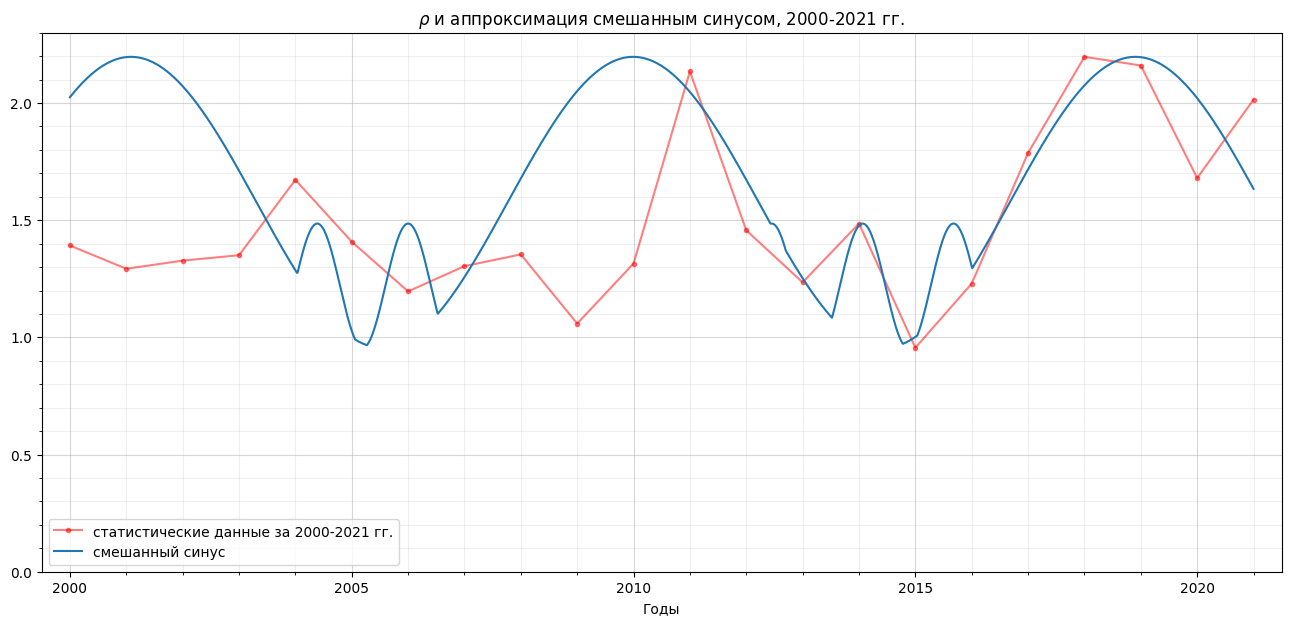

In [82]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2000_2021_np_int, rho_2000_2021, color='red', label='статистические данные за 2000-2021 гг.', alpha=0.5, marker='.')
ax.plot(create_arange(2000, 2021, CONST_ARANGE_STEP), mixed_sinus_2000_2021_continious, label='смешанный синус')


plt.xlim(1999.5, 2021.5)

plt.title(r'$ \rho$ и аппроксимация смешанным синусом, 2000-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.4, 0.5))
ax.set_yticks(np.arange(0, 2.4, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

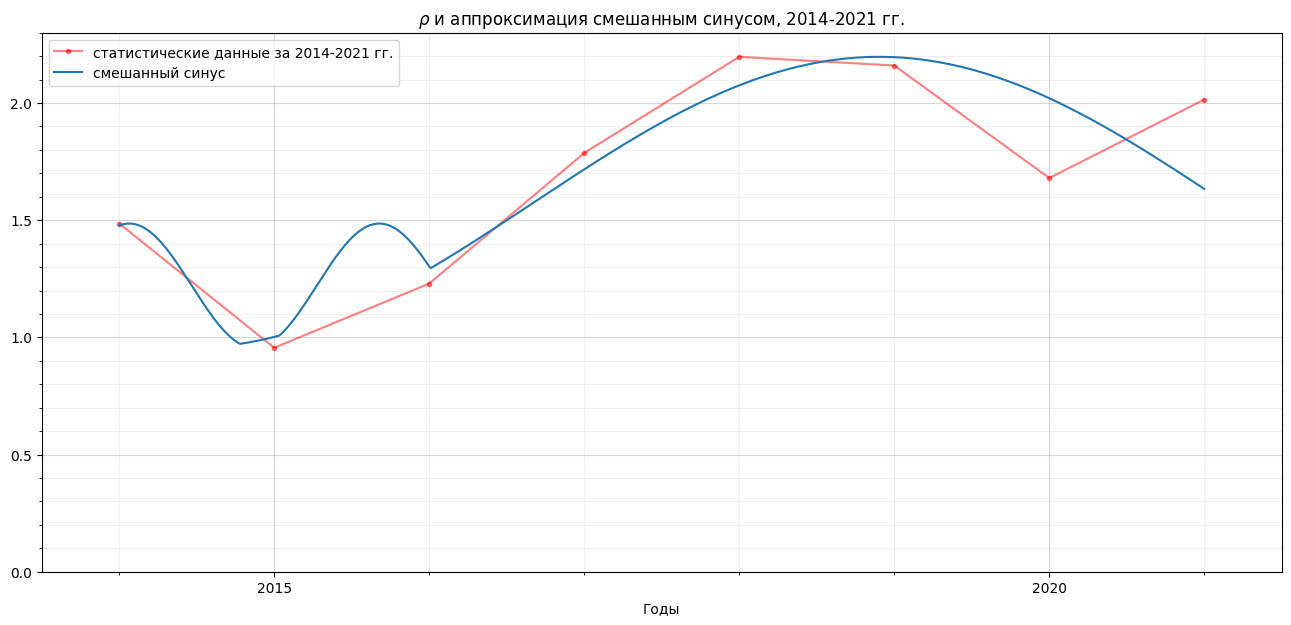

In [83]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2014_2021_np_int, rho_2014_2021, color='red', label='статистические данные за 2014-2021 гг.', alpha=0.5, marker='.')
ax.plot(create_arange(2014, 2021, CONST_ARANGE_STEP), mixed_sinus_2014_2021_continious, label='смешанный синус')


plt.xlim(2013.5, 2021.5)

plt.title(r'$ \rho$ и аппроксимация смешанным синусом, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2015, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.4, 0.5))
ax.set_yticks(np.arange(0, 2.4, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

Построим предсказание для $\rho$ до 2032-го года

In [84]:
def predict_rho(array):
    global big_sinus_mediana, big_sinus_amplitude, small_sinus_mediana, small_sinus_amplitude, mixed_sinus_period, mixed_sinus_shift, rho_2014_2021_period_coef, rho_2014_2021_shift_coef
    return mixed_sinus(first_sinus_mediana=big_sinus_mediana,
                                             first_sinus_amplitude=big_sinus_amplitude,
                                             first_sinus_period=mixed_sinus_period,
                                             first_sinus_shift=mixed_sinus_shift,
                                             second_sinus_mediana=small_sinus_mediana,
                                             second_sinus_amplitude=small_sinus_amplitude,
                                             second_sinus_period=mixed_sinus_period * rho_2014_2021_period_coef,
                                             second_sinus_shift=mixed_sinus_shift * rho_2014_2021_shift_coef,
                                             common_array=array)

In [85]:
YEARS_2014_2032 = ['2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030',
       '2031', '2032']

YEARS_2014_2032_np = np.array(YEARS_2014_2032, dtype=str)
YEARS_2014_2032_np_int = np.array(YEARS_2014_2032, dtype=int)

In [86]:
rho_predicition_2014_2032_discrete = predict_rho(YEARS_2014_2032_np_int)
rho_predicition_2014_2032_discrete

array([1.47736722, 1.00201128, 1.30254266, 1.71699093, 2.07534036,
       2.19568096, 2.02060847, 1.63363507, 1.45334199, 0.97538042,
       1.36182695, 1.32712452, 1.75505386, 2.09775576, 2.19175635,
       1.99221595, 1.59431829, 1.18786644, 1.4125037 ])

In [87]:
rho_predicition_2014_2032_continious = predict_rho(create_arange(2014, 2032, CONST_ARANGE_STEP))

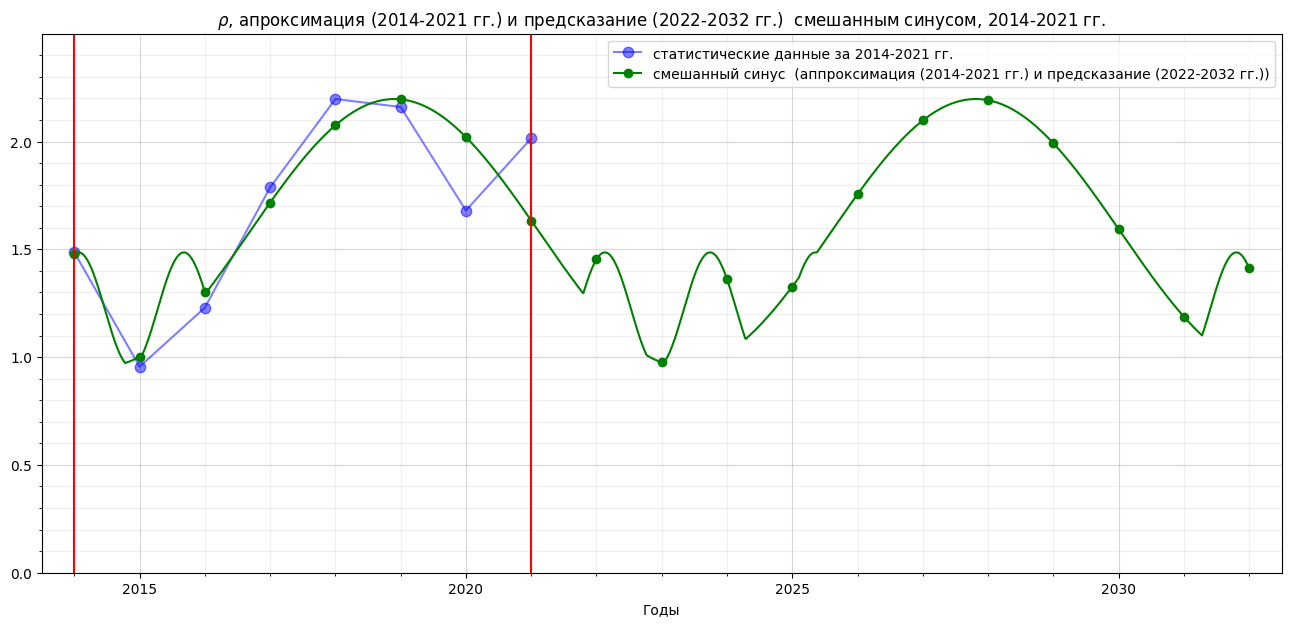

In [88]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2014_2021_np_int, rho_2014_2021, color='blue', label='статистические данные за 2014-2021 гг.', alpha=0.5, marker='.', markersize=15)
ax.plot(create_arange(2014, 2032, CONST_ARANGE_STEP), rho_predicition_2014_2032_continious, color='green')

ax.plot(2014.0, rho_predicition_2014_2032_discrete[0], 'go-', label='смешанный синус  (аппроксимация (2014-2021 гг.) и предсказание (2022-2032 гг.))')
for i in range(2015, 2033):
    ax.plot(i, rho_predicition_2014_2032_discrete[i - 2014], 'go')

plt.xlim(2013.5, 2032.5)
plt.ylim(0, 2.5)

plt.title(r'$ \rho$, апроксимация (2014-2021 гг.) и предсказание (2022-2032 гг.)  смешанным синусом, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend()

ax.set_xticks(np.arange(2015, 2032, 5))
ax.set_xticks(YEARS_2014_2032_np_int, minor=True)
ax.set_yticks(np.arange(0, 2.5, 0.5))
ax.set_yticks(np.arange(0, 2.5, 0.1), minor=True)

ax.vlines(2014, 0, 2.5, color='red')
ax.vlines(2021, 0, 2.5, color='red')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [89]:
rho_2014_2021_approximation = rho_predicition_2014_2032_discrete[:8]
rho_2014_2032_approximation = rho_predicition_2014_2032_discrete.copy()
rho_2014_2021_approximation, rho_2014_2032_approximation

(array([1.47736722, 1.00201128, 1.30254266, 1.71699093, 2.07534036,
        2.19568096, 2.02060847, 1.63363507]),
 array([1.47736722, 1.00201128, 1.30254266, 1.71699093, 2.07534036,
        2.19568096, 2.02060847, 1.63363507, 1.45334199, 0.97538042,
        1.36182695, 1.32712452, 1.75505386, 2.09775576, 2.19175635,
        1.99221595, 1.59431829, 1.18786644, 1.4125037 ]))

Проверим сигму

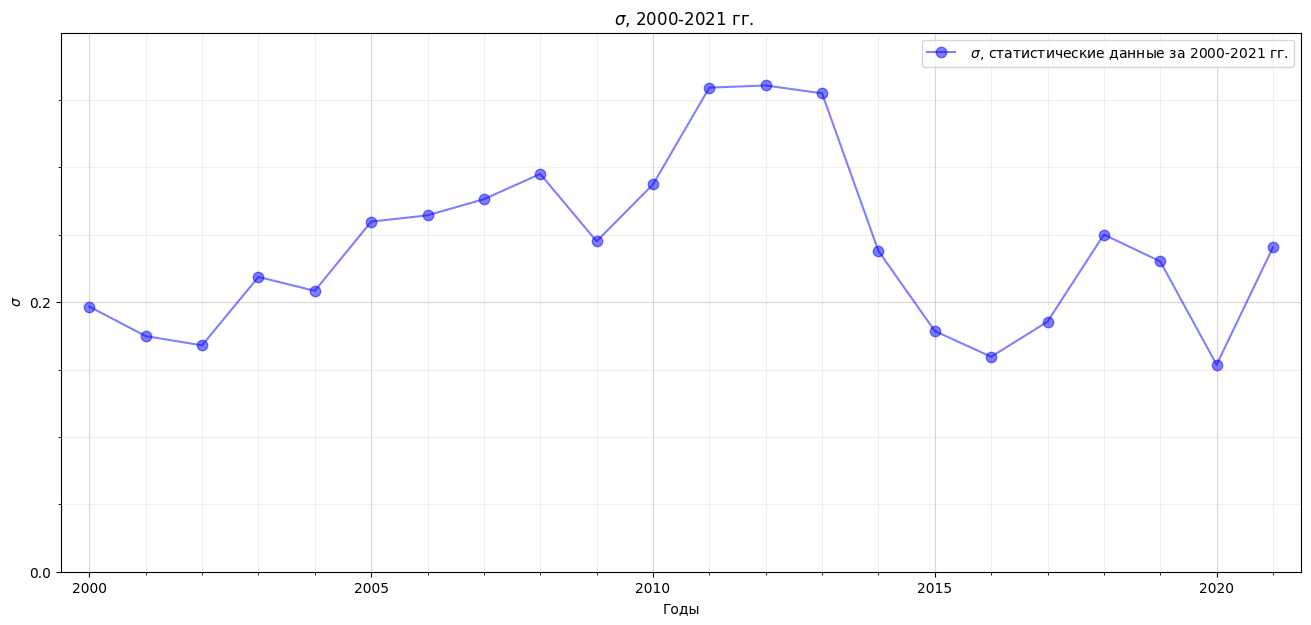

In [90]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2000_2021_np_int, sigma_2000_2021, color='blue', label=r' $\sigma$, статистические данные за 2000-2021 гг.', alpha=0.5, marker='.', markersize=15)

plt.xlim(1999.5, 2021.5)
plt.ylim(0, 0.4)

plt.title(r' $\sigma$, 2000-2021 гг.')

plt.xlabel('Годы')
plt.ylabel(r' $\sigma$')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 0.4, 0.2))
ax.set_yticks(np.arange(0, 0.4, 0.05), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

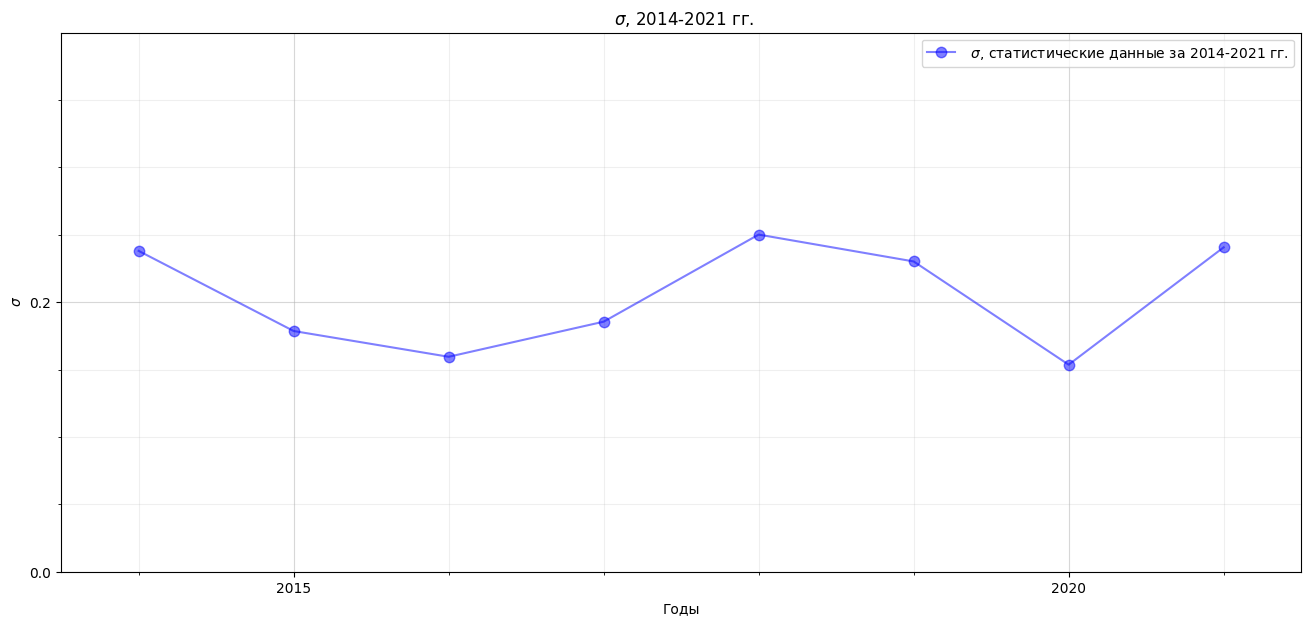

In [91]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2014_2021_np_int, sigma_2014_2021, color='blue', label=r' $\sigma$, статистические данные за 2014-2021 гг.', alpha=0.5, marker='.', markersize=15)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 0.4)

plt.title(r' $\sigma$, 2014-2021 гг.')

plt.xlabel('Годы')
plt.ylabel(r' $\sigma$')

plt.legend()

ax.set_xticks(np.arange(2015, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 0.4, 0.2))
ax.set_yticks(np.arange(0, 0.4, 0.05), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

Тенденции до 2014-го не видится, начиная в 2014-го -- синус

In [92]:
def find_best_sinus_period_and_shift(array_data, array_target, mediana, amplitude, step_period=0.001,
                                     left_bound_period=6, right_bound_period=8,
                                     step_shift=0.001, left_bound_shift=0, right_bound_shift=8):
    arange_period = np.arange(left_bound_period, right_bound_period + step_period, step_period)
    arange_shift = np.arange(left_bound_shift, right_bound_shift + step_shift, step_shift)
    best_metrica_value = -1
    best_period = 0
    best_shift = 0

    for current_period_raw in arange_period:
        period_flag = True
        current_period = round(current_period_raw, 3)
        for current_shift_raw in arange_shift:
            current_shift = round(current_shift_raw, 3)
            current_sinus_applied = sinus(mediana, amplitude, current_period, current_shift, array_data)
            current_metrica_value = metrica(array_target, current_sinus_applied)
            local_flag = False
            if (current_metrica_value < best_metrica_value) or (best_metrica_value < 0):
                best_metrica_value = current_metrica_value.copy()
                best_period = current_period.copy()
                best_shift = current_shift.copy()
                local_flag = True
            if (period_flag and current_period == round(current_period, 1)):
                print(current_period, current_shift, current_metrica_value, best_metrica_value, best_period, best_shift, local_flag)
                period_flag = False

    return best_period, best_shift, best_metrica_value

Идея -- взять данные за 2014-2021 г. и аппроксимировать синусом.

In [93]:
sigma_2014_2021_mediana = (1/2) * (max(sigma_2014_2021) + min(sigma_2014_2021))
sigma_2014_2021_amplitude = max(sigma_2014_2021) - sigma_2014_2021_mediana

In [94]:
sigma_2014_2021_period, sigma_2014_2021_shift, sigma_2014_2021_metrica = find_best_sinus_period_and_shift(array_data=YEARS_2014_2021_np_int,
                                      array_target=sigma_2014_2021, mediana=sigma_2014_2021_mediana, amplitude=sigma_2014_2021_amplitude, step_period=0.001,
                                      left_bound_period=3.5, right_bound_period=4.5,
                                      step_shift=0.001, left_bound_shift=-4.5, right_bound_shift=4.5)

3.5 -4.5 0.08322335695758644 0.08322335695758644 3.5 -4.5 True
3.6 -4.5 0.0755214207798858 0.07492870086810939 3.599 2.852 False
3.7 -4.5 0.12009870615940875 0.07090799756613464 3.699 1.849 False
3.8 -4.5 0.23535259381736592 0.06867621973874474 3.799 -0.43 False
3.9 -4.5 0.10308351825870665 0.0680149592529375 3.895 -1.025 False
4.0 -4.5 0.07696365176234372 0.0680149592529375 3.895 -1.025 False
4.1 -4.5 0.20828179879971664 0.0680149592529375 3.895 -1.025 False
4.2 -4.5 0.08986090510059228 0.0680149592529375 3.895 -1.025 False
4.3 -4.5 0.1646898050220319 0.0680149592529375 3.895 -1.025 False
4.4 -4.5 0.10305916859155603 0.0680149592529375 3.895 -1.025 False
4.5 -4.5 0.10778729471196126 0.0680149592529375 3.895 -1.025 False


In [95]:
sigma_2014_2021_mediana, sigma_2014_2021_amplitude

(0.201917082413641, 0.0482723084969037)

In [96]:
sigma_2014_2021_period, sigma_2014_2021_shift, sigma_2014_2021_metrica

(3.895, -1.025, 0.0680149592529375)

In [97]:
#этот блок использовался для ускорения работы при многократных повторных запусках
sigma_2014_2021_period, sigma_2014_2021_shift, sigma_2014_2021_metrica = 3.895, -1.025, 0.0680149592529375

In [98]:
sigma_2014_2021_model_2014_2021_discrete = sinus(mediana=sigma_2014_2021_mediana, amplitude=sigma_2014_2021_amplitude, period=sigma_2014_2021_period, shift=sigma_2014_2021_shift, array=YEARS_2014_2021_np_int)
sigma_2014_2021_model_2014_2021_discrete

array([0.25001078, 0.20402621, 0.15364482, 0.20389491, 0.25002189,
       0.19586648, 0.15432454, 0.21199709])

In [99]:
sigma_2014_2021_model_2014_2021_continious = sinus(mediana=sigma_2014_2021_mediana, amplitude=sigma_2014_2021_amplitude, period=sigma_2014_2021_period, shift=sigma_2014_2021_shift, array=create_arange(2014, 2021, CONST_ARANGE_STEP))

<ipython-input-100-068d2500d620>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-ro', label='Статистические данные', color='red')


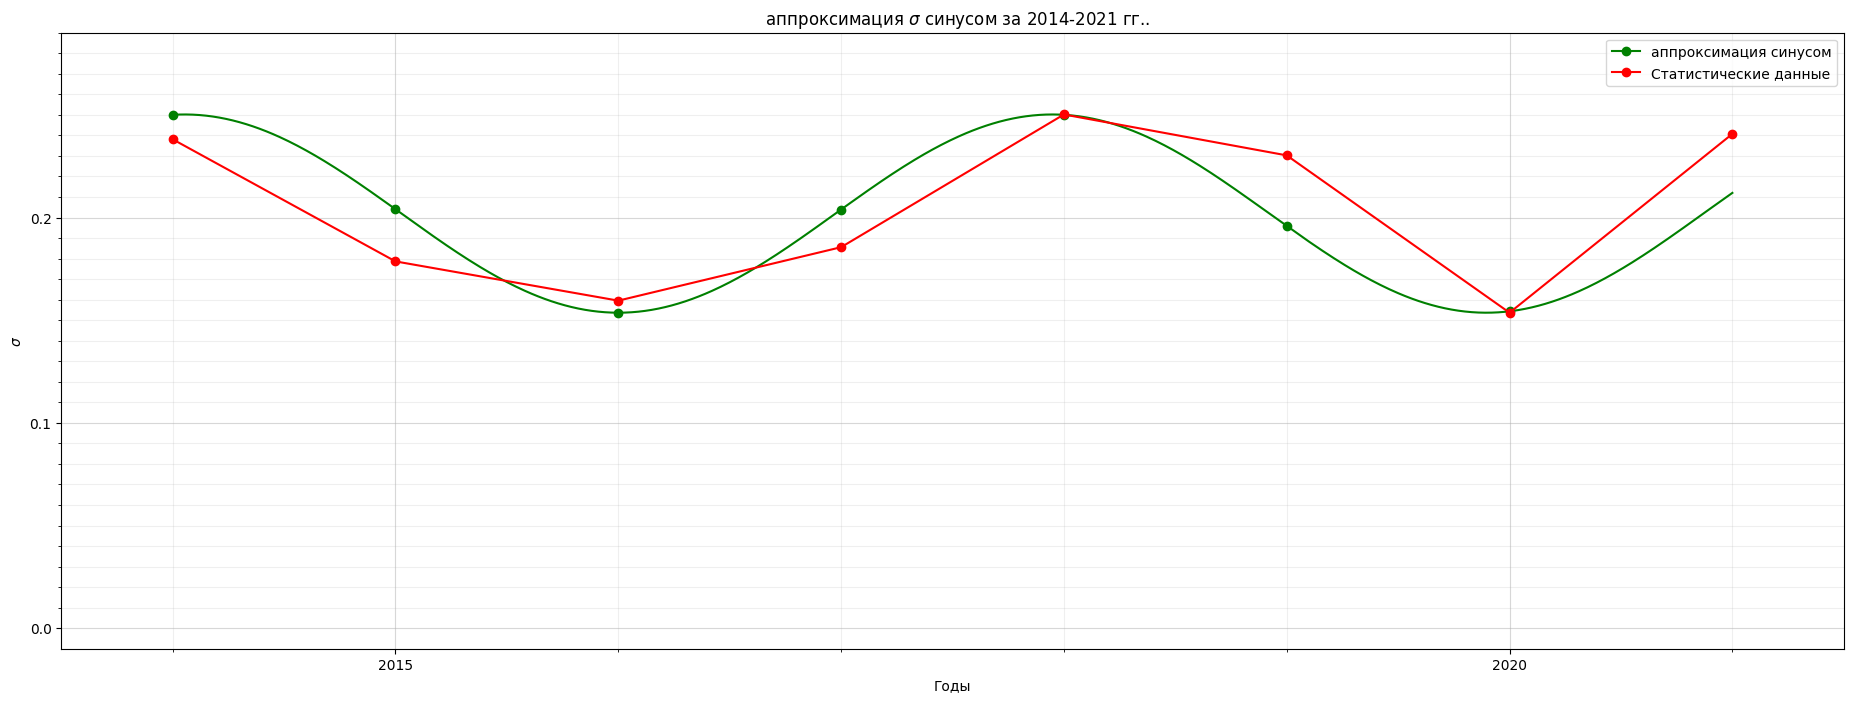

In [100]:
fig, ax = plt.subplots()

fig.set_figwidth(23)
fig.set_figheight(8)

ax.plot(create_arange(2014, 2021, CONST_ARANGE_STEP), sigma_2014_2021_model_2014_2021_continious, color='green')

ax.plot(2014, sigma_2014_2021_model_2014_2021_discrete[0], '-go', label='аппроксимация синусом',)
for i in range(2015, 2021):
    plt.plot(i, sigma_2014_2021_model_2014_2021_discrete[i - 2014], '-go')

ax.plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-ro', label='Статистические данные', color='red')

plt.xlim(2013.5, 2021.5)
plt.ylim(-0.01, 0.27)

plt.title(r'  аппроксимация $\sigma$ синусом за 2014-2021 гг..')

plt.xlabel('Годы')
plt.ylabel(r'$\sigma$ ')

plt.legend()


ax.set_xticks(np.arange(2015, 2022, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 0.3, 0.1))
ax.set_yticks(np.arange(0, 0.3, 0.01), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

Строим предсказание:

In [101]:
sigma_2014_2032_model_2014_2032_discrete = sinus(mediana=sigma_2014_2021_mediana, amplitude=sigma_2014_2021_amplitude, period=sigma_2014_2021_period, shift=sigma_2014_2021_shift, array=YEARS_2014_2032_np_int)
sigma_2014_2032_model_2014_2032_discrete

array([0.25001078, 0.20402621, 0.15364482, 0.20389491, 0.25002189,
       0.19586648, 0.15432454, 0.21199709, 0.2486562 , 0.18787992,
       0.15636641, 0.21981077, 0.24595279, 0.18029513, 0.15971199,
       0.22711231, 0.24198903, 0.17332918, 0.16426552])

In [102]:
sigma_2014_2032_model_2014_2032_continious = sinus(mediana=sigma_2014_2021_mediana, amplitude=sigma_2014_2021_amplitude, period=sigma_2014_2021_period, shift=sigma_2014_2021_shift, array=create_arange(2014, 2032, CONST_ARANGE_STEP))

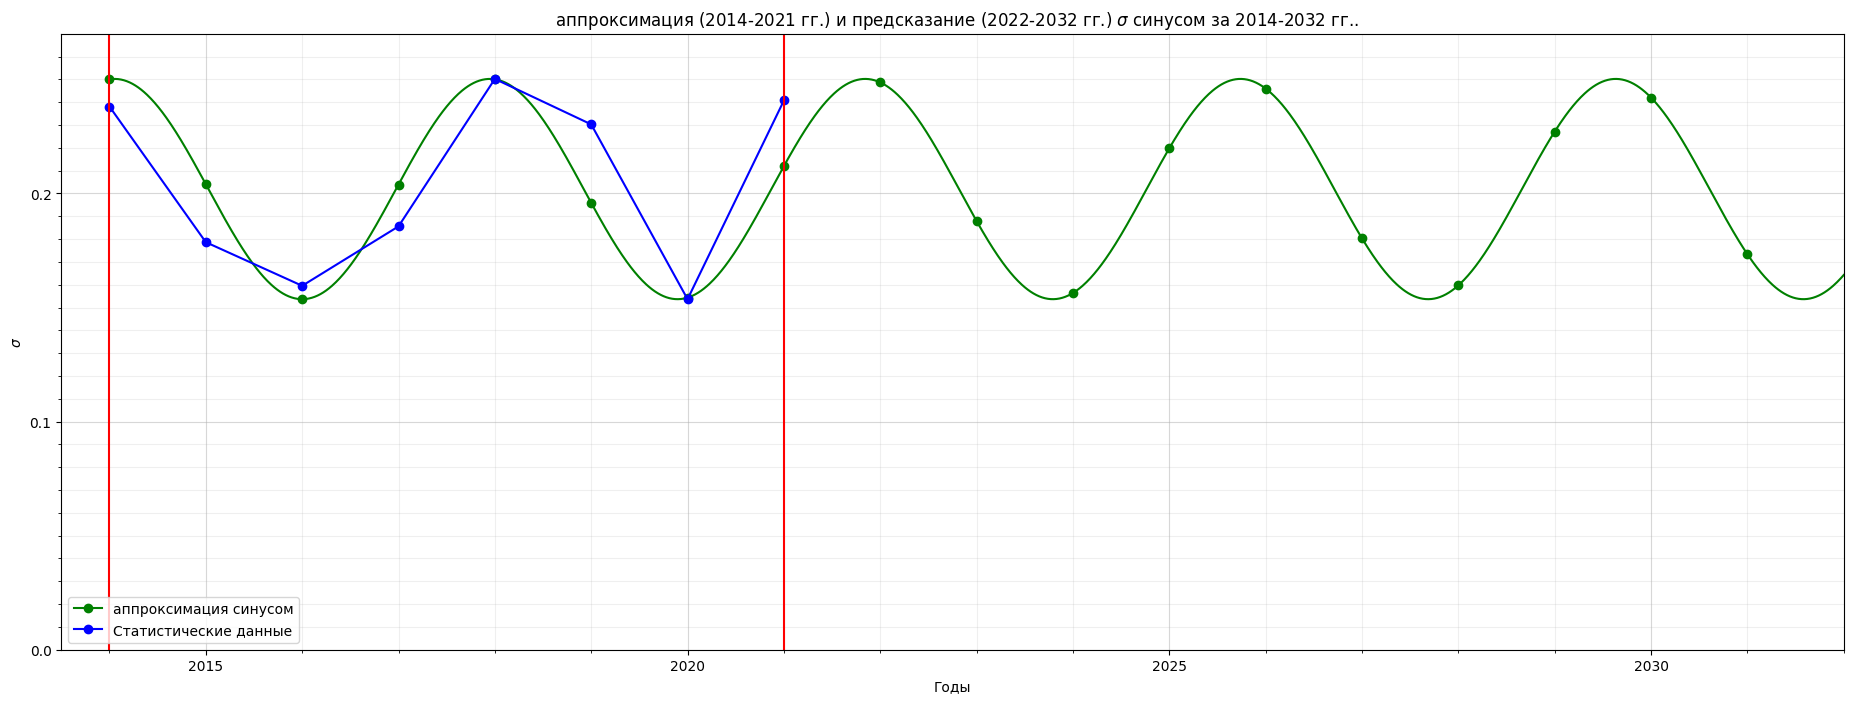

In [103]:
fig, ax = plt.subplots()

fig.set_figwidth(23)
fig.set_figheight(8)

ax.plot(create_arange(2014, 2032, CONST_ARANGE_STEP), sigma_2014_2032_model_2014_2032_continious, color='green')

ax.plot(2014, sigma_2014_2032_model_2014_2032_discrete[0], '-go', label='аппроксимация синусом',)
for i in range(2015, 2032):
    plt.plot(i, sigma_2014_2032_model_2014_2032_discrete[i - 2014], '-go')

ax.plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-bo', label='Статистические данные')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 0.27)

plt.title(r'  аппроксимация (2014-2021 гг.) и предсказание (2022-2032 гг.) $\sigma$ синусом за 2014-2032 гг..')

plt.xlabel('Годы')
plt.ylabel(r'$\sigma$ ')

plt.legend()


ax.set_xticks(np.arange(2015, 2032, 5))
ax.set_xticks(YEARS_2014_2032_np_int, minor=True)
ax.set_yticks(np.arange(0, 0.27, 0.1))
ax.set_yticks(np.arange(0, 0.27, 0.01), minor=True)

ax.vlines(2014.0, 0.0, 0.27, color='red')
ax.vlines(2021.0, 0.0, 0.27, color='red')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [104]:
sigma_2014_2021_approximation = sigma_2014_2032_model_2014_2032_discrete[:8]
sigma_2014_2032_approximation = sigma_2014_2032_model_2014_2032_discrete.copy()
sigma_2014_2021_approximation, sigma_2014_2032_approximation

(array([0.25001078, 0.20402621, 0.15364482, 0.20389491, 0.25002189,
        0.19586648, 0.15432454, 0.21199709]),
 array([0.25001078, 0.20402621, 0.15364482, 0.20389491, 0.25002189,
        0.19586648, 0.15432454, 0.21199709, 0.2486562 , 0.18787992,
        0.15636641, 0.21981077, 0.24595279, 0.18029513, 0.15971199,
        0.22711231, 0.24198903, 0.17332918, 0.16426552]))

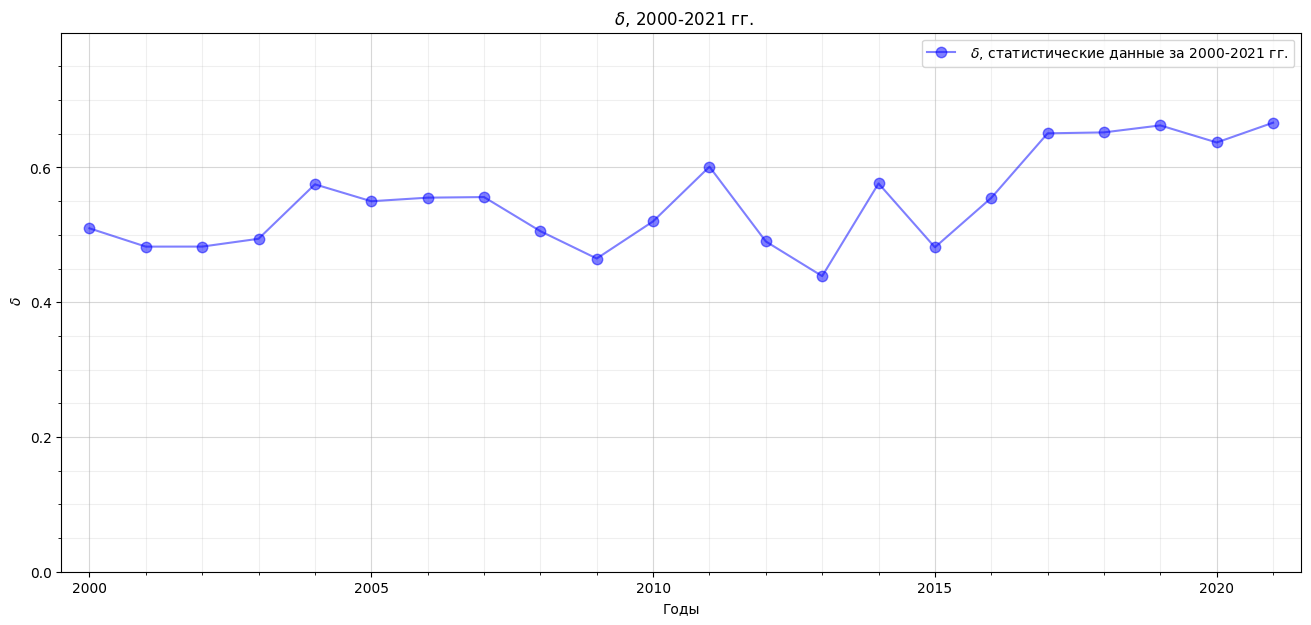

In [105]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2000_2021_np_int, delta_2000_2021, color='blue', label=r' $\delta$, статистические данные за 2000-2021 гг.', alpha=0.5, marker='.', markersize=15)

plt.xlim(1999.5, 2021.5)
plt.ylim(0, 0.8)

plt.title(r' $\delta$, 2000-2021 гг.')

plt.xlabel('Годы')
plt.ylabel(r' $\delta$')

plt.legend()

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 0.8, 0.2))
ax.set_yticks(np.arange(0, 0.8, 0.05), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

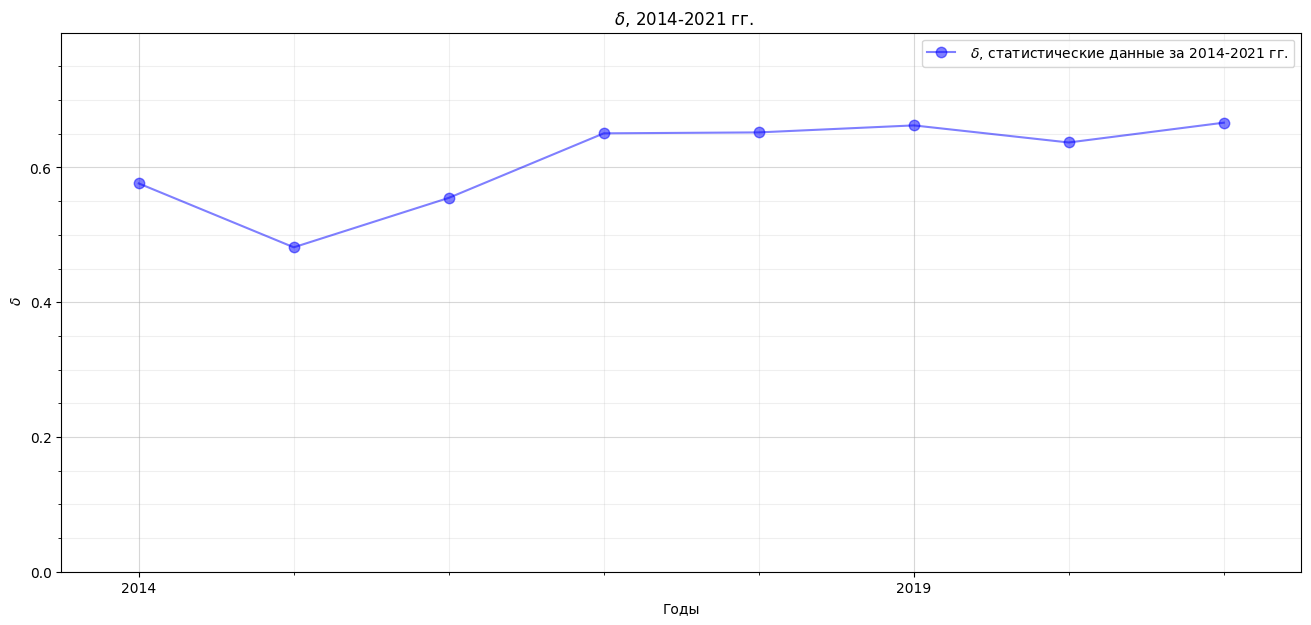

In [106]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(7)

ax.plot(YEARS_2014_2021_np_int, delta_2014_2021, color='blue', label=r' $\delta$, статистические данные за 2014-2021 гг.', alpha=0.5, marker='.', markersize=15)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 0.8)

plt.title(r' $\delta$, 2014-2021 гг.')

plt.xlabel('Годы')
plt.ylabel(r' $\delta$')

plt.legend()

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0, 0.8, 0.2))
ax.set_yticks(np.arange(0, 0.8, 0.05), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

Приблизим функцией следующего вида:

$$f(x) = a \cdot \sin(b \cdot \ln(x - c) + d) + e $$

In [107]:
CONST_FIND_sin_ln = 0.01

In [108]:
delta_2014_2021_params = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0}

min_delta_2014_2021 = min(delta_2014_2021)
max_delta_2014_2021 = max(delta_2014_2021) + 0.2 * max(delta_2014_2021)
delta_2014_2021_mediana = (min_delta_2014_2021 + max_delta_2014_2021) / 2
delta_2014_2021_amplitude = max_delta_2014_2021 - delta_2014_2021_mediana
delta_2014_2021_params['a'] = delta_2014_2021_amplitude
delta_2014_2021_params['e'] = delta_2014_2021_mediana
delta_2014_2021_params

{'a': 0.15913881732420632, 'b': 0, 'c': 0, 'd': 0, 'e': 0.6406369694599925}

In [109]:
def sin_ln( b, c, d,  a=delta_2014_2021_params['a'], e=delta_2014_2021_params['e'], array=YEARS_2014_2021_np_int, print_flag=False):
    if print_flag:
        if (min(array - c) <= 0):
            print(array, c)
    return a * np.sin(b * np.log(array - c) + d) + e

In [110]:
delta_2014_2021_params['c'] = 2013.94

In [111]:
def find_sin_ln_b_d(a, c, e, left_bound_b=0.0, right_bound_b=1.5, step_b=0.001 ,
                     left_bound_d=-1.5, right_bound_d=1.5, step_d=0.001 , array_data=YEARS_2014_2021_np_int, array_target=delta_2014_2021, print_flag_for_sin_ln=False):
    b_arange = np.arange(left_bound_b, right_bound_b + step_b, step_b)
    c_arange = np.array([c], dtype=float)
    d_arange = np.arange(left_bound_d, right_bound_d + step_d, step_d)

    best_b = 0
    best_c = 0
    best_d = 0
    best_metrica = -1

    current_c = round(c, 3)

    for current_b_raw in b_arange:
        current_b = round(current_b_raw, 3)
        for current_d_raw in d_arange:
            current_d = round(current_d_raw, 3)
            current_value = sin_ln(a=a, b=current_b, c=current_c, d=current_d, e=e, array=array_data, print_flag=print_flag_for_sin_ln)
            current_metrica = metrica(current_value, array_target) / len(array_target)
            if (best_metrica < 0 or current_metrica < best_metrica):
                best_metrica = current_metrica
                best_b = current_b
                best_c = current_c
                best_d = current_d
            if (current_b == round(current_b, 1) and current_d == round(current_d, 1)):
                 print(current_b, current_d, current_metrica, best_b, best_c, best_d, best_metrica)

    return best_b, best_d, best_metrica

In [112]:
delta_2014_2021_params['b'],  delta_2014_2021_params['d'], delta_2014_2021_metrica  = find_sin_ln_b_d(a=delta_2014_2021_params['a'], c=delta_2014_2021_params['c'],
                                                  e=delta_2014_2021_params['e'], print_flag_for_sin_ln=True)
delta_2014_2021_params['b'], delta_2014_2021_params['d'], delta_2014_2021_metrica

0.0 0.2 0.012054629500416289 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.3 0.013465223056973886 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.4 0.014919515504894927 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.5 0.016358094863430463 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.6 0.017739787705532497 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.7 0.019035645627494595 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.8 0.02022496983454096 0.0 2013.94 -0.172 0.008951222997069214
0.0 0.9 0.021292755586030835 0.0 2013.94 -0.172 0.008951222997069214
0.0 1.0 0.022228033393900098 0.0 2013.94 -0.172 0.008951222997069214
0.0 1.1 0.023022766429787307 0.0 2013.94 -0.172 0.008951222997069214
0.0 1.2 0.02367109883703312 0.0 2013.94 -0.172 0.008951222997069214
0.0 1.3 0.02416883369236248 0.0 2013.94 -0.172 0.008951222997069214
0.0 1.4 0.024513068947639983 0.0 2013.94 -0.172 0.008951222997069214
0.0 1.5 0.024701948742065577 0.0 2013.94 -0.172 0.008951222997069214
0.1 -1.5 0.022267773325862005 0.099 2

(0.632, -0.949, 0.0038051612925736195)

In [113]:
#этот блок использовался для ускорения работы при многократных повторных запусках
delta_2014_2021_params['b'], delta_2014_2021_params['d'], delta_2014_2021_metrica = 0.632, -0.949, 0.0038051612925736195

In [114]:
delta_model_2014_2021_discrete = sin_ln(b=delta_2014_2021_params['b'], c=delta_2014_2021_params['c'], d=delta_2014_2021_params['d'], print_flag=True)
delta_model_2014_2021_discrete

array([0.57654414, 0.51478423, 0.56542641, 0.60247518, 0.63054601,
       0.65267285, 0.67064183, 0.68556468])

In [115]:
delta_model_2014_2021_continious = sin_ln(b=delta_2014_2021_params['b'], c=delta_2014_2021_params['c'], d=delta_2014_2021_params['d'], array=create_arange(2014, 2021, 0.01), print_flag=True)

<ipython-input-116-36482cab3497>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(YEARS_2014_2021_np_int, delta_2014_2021, '-ro', label='Статистические данные', color='red')


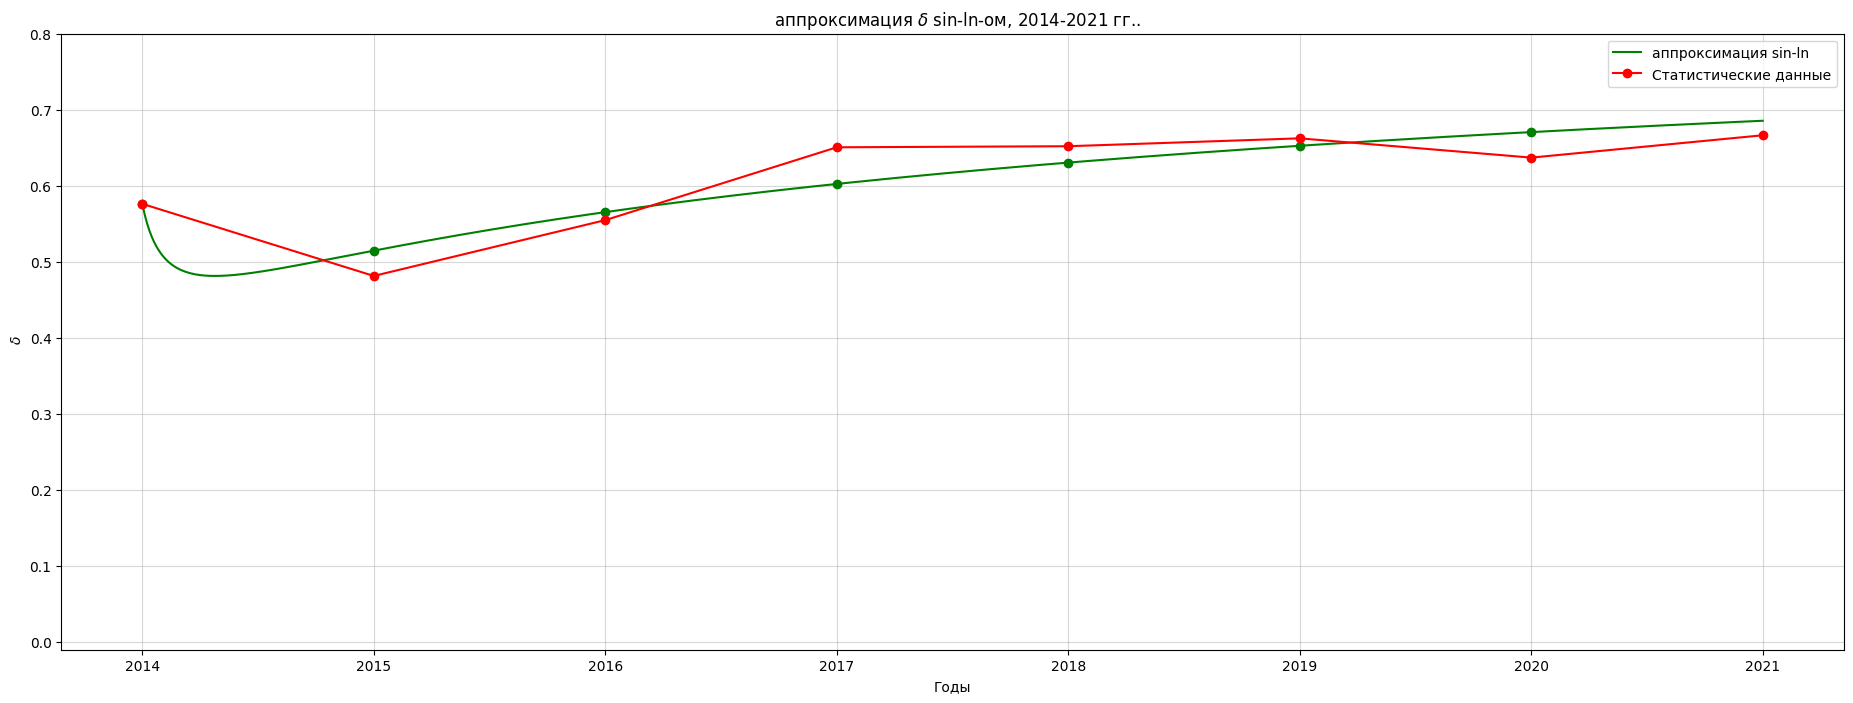

In [116]:
fig, ax = plt.subplots()

fig.set_figwidth(23)
fig.set_figheight(8)

ax.plot(create_arange(2014, 2021, CONST_ARANGE_STEP), delta_model_2014_2021_continious,  label='аппроксимация sin-ln', color='green')


plt.plot(2014, delta_model_2014_2021_discrete[0], 'go')

for i in range(2015, 2021):
    plt.plot(i, delta_model_2014_2021_discrete[i - 2014], 'go')

ax.plot(YEARS_2014_2021_np_int, delta_2014_2021, '-ro', label='Статистические данные', color='red')

plt.ylim(-0.01, 0.8)

plt.title(r'  аппроксимация $\delta$ sin-ln-ом, 2014-2021 гг..')

plt.xlabel('Годы')
plt.ylabel(r' $\delta$')

plt.legend()

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

Предсказание до 2032-го года:

In [117]:
delta_model_2014_2032_discrete = sin_ln(b=delta_2014_2021_params['b'], c=delta_2014_2021_params['c'], d=delta_2014_2021_params['d'], print_flag=True, array=YEARS_2014_2032_np_int)
delta_model_2014_2032_discrete

array([0.57654414, 0.51478423, 0.56542641, 0.60247518, 0.63054601,
       0.65267285, 0.67064183, 0.68556468, 0.69817354, 0.70897362,
       0.71832693, 0.72650101, 0.73369872, 0.7400772 , 0.74576041,
       0.75084771, 0.75541986, 0.75954322, 0.763273  ])

In [118]:
delta_model_2014_2032_continious = sin_ln(b=delta_2014_2021_params['b'], c=delta_2014_2021_params['c'], d=delta_2014_2021_params['d'], array=create_arange(2014, 2032, CONST_ARANGE_STEP), print_flag=True)

<ipython-input-119-72ba907bc4e8>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(YEARS_2014_2021_np_int, delta_2014_2021, '-bo', label='Статистические данные', color='blue')


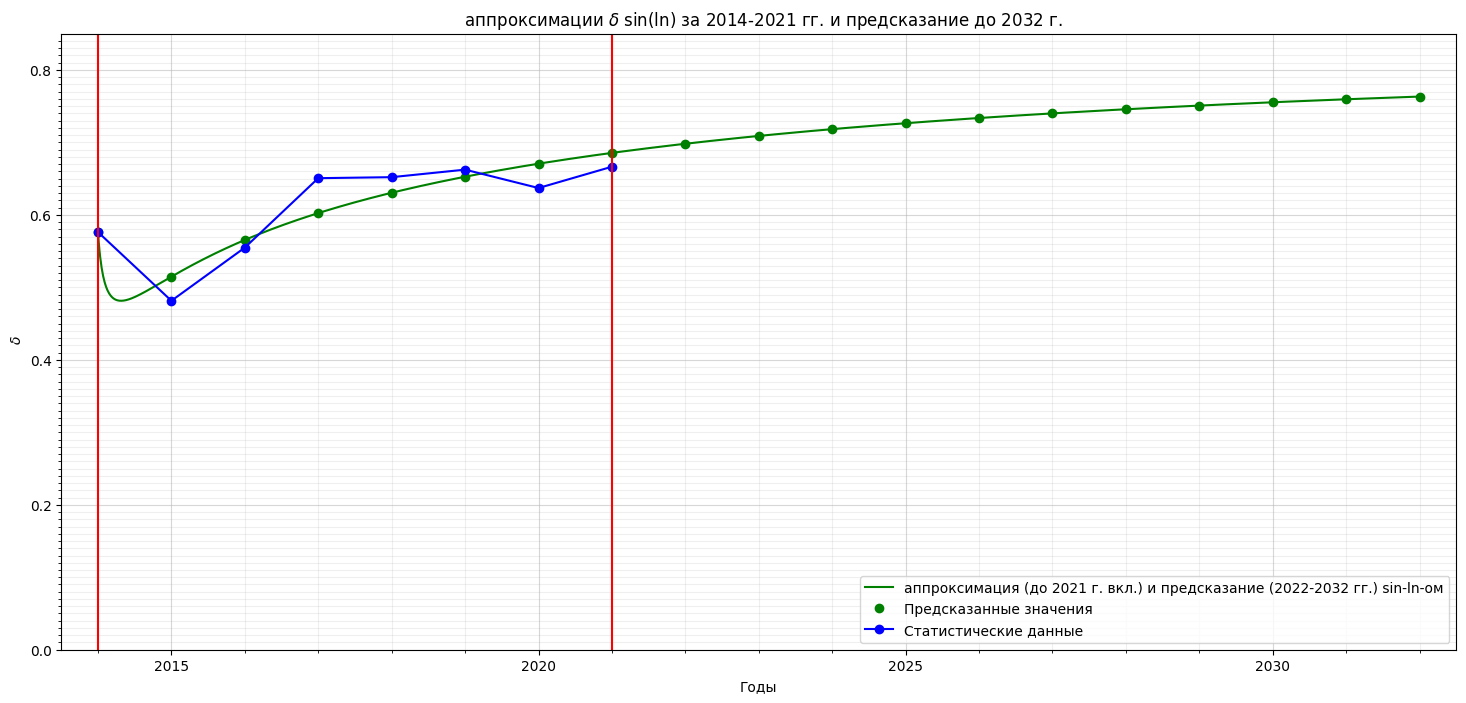

In [119]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(create_arange(2014, 2032, CONST_ARANGE_STEP), delta_model_2014_2032_continious, label='аппроксимация (до 2021 г. вкл.) и предсказание (2022-2032 гг.) sin-ln-ом', color='green')

plt.plot(2014, delta_model_2014_2032_discrete[0], 'go', label='Предсказанные значения')

for i in range(2015, 2033):
    plt.plot(i, delta_model_2014_2032_discrete[i - 2014], 'go')

ax.plot(YEARS_2014_2021_np_int, delta_2014_2021, '-bo', label='Статистические данные', color='blue')

ax.vlines(2021, 0, 0.85, color='red')
ax.vlines(2014, -0, 0.85, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(0, 0.85)

plt.title(r'  аппроксимации $\delta$ sin(ln) за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')
plt.ylabel(r' $\delta$')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(YEARS_2014_2032_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 0.85, 0.2))
ax.set_yticks(np.arange(0.0, 0.85, 0.01), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [120]:
delta_2014_2021_approximation = delta_model_2014_2021_discrete
delta_2014_2032_approximation = delta_model_2014_2032_discrete
delta_2014_2021_approximation, delta_2014_2032_approximation

(array([0.57654414, 0.51478423, 0.56542641, 0.60247518, 0.63054601,
        0.65267285, 0.67064183, 0.68556468]),
 array([0.57654414, 0.51478423, 0.56542641, 0.60247518, 0.63054601,
        0.65267285, 0.67064183, 0.68556468, 0.69817354, 0.70897362,
        0.71832693, 0.72650101, 0.73369872, 0.7400772 , 0.74576041,
        0.75084771, 0.75541986, 0.75954322, 0.763273  ]))

<ipython-input-123-4369c7c7045e>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-ro', label='Статистические данные', color='red')
<ipython-input-123-4369c7c7045e>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax[1].plot(YEARS_2014_2021_np_int, delta_2014_2021, '-ro', label='Статистические данные', color='red')


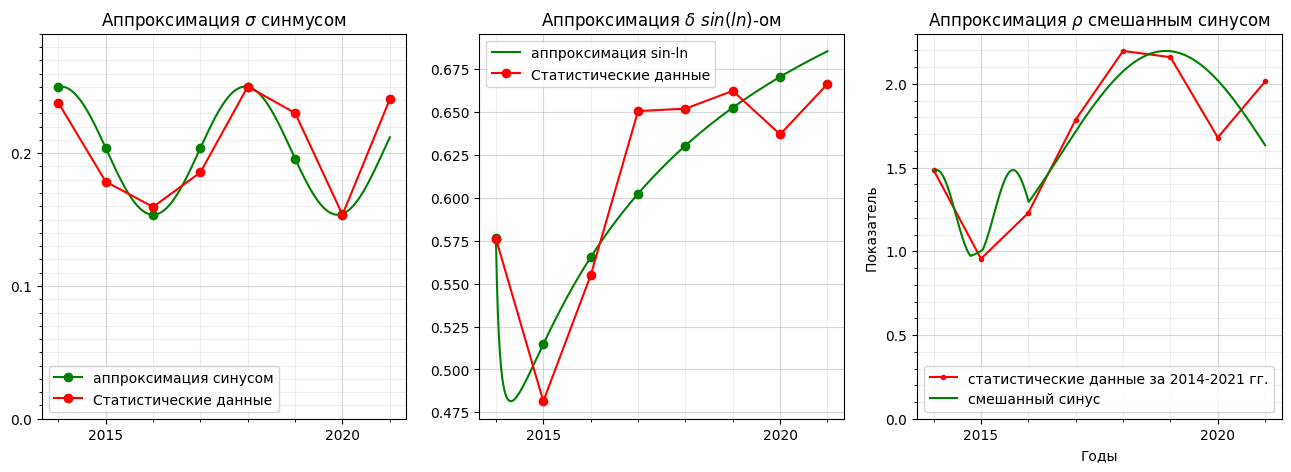

In [123]:
fig, ax = plt.subplots(1, 3,  sharex=True, sharey=False)

fig.set_figwidth(16)
fig.set_figheight(5)

ax[0].plot(create_arange(2014, 2021, CONST_ARANGE_STEP), sigma_2014_2021_model_2014_2021_continious, color='green')

ax[0].plot(2014, sigma_2014_2021_model_2014_2021_discrete[0], '-go', label='аппроксимация синусом',)
for i in range(2015, 2021):
    ax[0].plot(i, sigma_2014_2021_model_2014_2021_discrete[i - 2014], '-go')

ax[0].plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-ro', label='Статистические данные', color='red')

plt.xlabel('Годы')
plt.ylabel(r'Показатель ')

ax[0].set_xticks(np.arange(2015, 2022, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0, 0.3, 0.1))
ax[0].set_yticks(np.arange(0, 0.3, 0.01), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)

ax[0].legend()

ax[0].set_title(r'Аппроксимация $\sigma$ синмусом')


ax[1].plot(create_arange(2014, 2021, CONST_ARANGE_STEP), delta_model_2014_2021_continious,  label='аппроксимация sin-ln', color='green')


ax[1].plot(2014, delta_model_2014_2021_discrete[0], 'go')

for i in range(2015, 2021):
    ax[1].plot(i, delta_model_2014_2021_discrete[i - 2014], 'go')

ax[1].plot(YEARS_2014_2021_np_int, delta_2014_2021, '-ro', label='Статистические данные', color='red')

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)

ax[1].legend()

ax[1].set_title(r'Аппроксимация $\delta$ $sin(ln)$-ом')



ax[2].plot(YEARS_2014_2021_np_int, rho_2014_2021, color='red', label='статистические данные за 2014-2021 гг.', marker='.')
ax[2].plot(create_arange(2014, 2021, CONST_ARANGE_STEP), mixed_sinus_2014_2021_continious, label='смешанный синус', color='green')

ax[2].legend()

ax[2].set_xticks(np.arange(2015, 2021, 5))
ax[2].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[2].set_yticks(np.arange(0, 2.4, 0.5))
ax[2].set_yticks(np.arange(0, 2.4, 0.1), minor=True)

ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=0.5)

ax[2].set_title(r'Аппроксимация $\rho$ смешанным синусом' )


plt.show()


<ipython-input-124-5c9bece35bc4>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-ro', label='Статистические данные', color='red')
<ipython-input-124-5c9bece35bc4>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax[1].plot(YEARS_2014_2021_np_int, delta_2014_2021, '-ro', label='Статистические данные', color='red')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

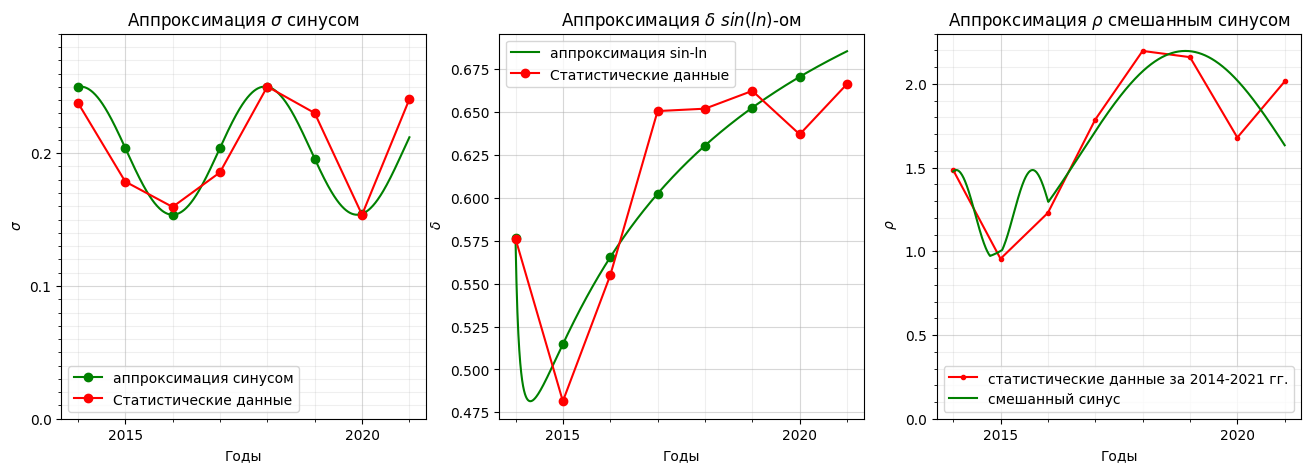

In [124]:
fig, ax = plt.subplots(1, 3,  sharex=True, sharey=False)

fig.set_figwidth(16)
fig.set_figheight(5)

ax[0].plot(create_arange(2014, 2021, CONST_ARANGE_STEP), sigma_2014_2021_model_2014_2021_continious, color='green')

ax[0].plot(2014, sigma_2014_2021_model_2014_2021_discrete[0], '-go', label='аппроксимация синусом',)
for i in range(2015, 2021):
    ax[0].plot(i, sigma_2014_2021_model_2014_2021_discrete[i - 2014], '-go')

ax[0].plot(YEARS_2014_2021_np_int, sigma_2014_2021, '-ro', label='Статистические данные', color='red')

ax[0].set_xticks(np.arange(2015, 2022, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0, 0.3, 0.1))
ax[0].set_yticks(np.arange(0, 0.3, 0.01), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)

ax[0].set_xlabel('Годы')
ax[0].set_ylabel(r' $\sigma$')

ax[0].legend()

ax[0].set_title(r'Аппроксимация $\sigma$ синусом')


ax[1].plot(create_arange(2014, 2021, CONST_ARANGE_STEP), delta_model_2014_2021_continious,  label='аппроксимация sin-ln', color='green')


ax[1].plot(2014, delta_model_2014_2021_discrete[0], 'go')

for i in range(2015, 2021):
    ax[1].plot(i, delta_model_2014_2021_discrete[i - 2014], 'go')

ax[1].plot(YEARS_2014_2021_np_int, delta_2014_2021, '-ro', label='Статистические данные', color='red')

ax[1].set_xlabel('Годы')
ax[1].set_ylabel(r' $\delta$')

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)

ax[1].legend()

ax[1].set_title(r'Аппроксимация $\delta$ $sin(ln)$-ом')



ax[2].plot(YEARS_2014_2021_np_int, rho_2014_2021, color='red', label='статистические данные за 2014-2021 гг.', marker='.')
ax[2].plot(create_arange(2014, 2021, CONST_ARANGE_STEP), mixed_sinus_2014_2021_continious, label='смешанный синус', color='green')

ax[2].legend()

ax[2].set_xticks(np.arange(2015, 2021, 5))
ax[2].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[2].set_yticks(np.arange(0, 2.4, 0.5))
ax[2].set_yticks(np.arange(0, 2.4, 0.1), minor=True)

ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=0.5)

ax[2].set_title(r'Аппроксимация $\rho$ смешанным синусом' )

ax[2].set_xlabel('Годы')
ax[2].set_ylabel(r' $\rho$')


plt.savefig('sigma_delta_rho_approzimations_2014_2022.png')

files.download('sigma_delta_rho_approzimations_2014_2022.png')

In [125]:
def fi_E_unvectorized(t, a_E, b_E):
    return a_E + (1 - a_E) * np.exp(-b_E * (t - 2014))

def fi_I_unvectorized(t, a_I, b_I):
    return 1 - a_I * ((t - 2014)**2) * np.exp(-b_I * (t - 2014))

def fi_J_unvectorized(t, a_J, b_J):
    return a_J - (1 - a_J) * (1 + t - 2014) * np.exp(-b_J * (t - 2014))

In [126]:
def fi_E(ts: np.array, a_E, b_E, size=7):
    if (len(ts) != 7):
        size = len(ts)
    res = np.array([0]*size, dtype=float)
    for i in range(len(ts)):
        res[i] = fi_E_unvectorized(2014 + i, a_E, b_E)
    return res


def fi_I(ts: np.array, a_I, b_I, size=7):
    if (len(ts) != 7):
        size = len(ts)
    res = np.array([0]*size, dtype=float)
    for i in range(len(ts)):
        res[i] = fi_I_unvectorized(2014 + i, a_I, b_I)
    return res

def fi_J(ts: np.array, a_J, b_J, size=7):
    if (len(ts) != 7):
        size = len(ts)
    res = np.array([0]*size, dtype=float)
    for i in range(len(ts)):
        res[i] = fi_J_unvectorized(2014 + i, a_J, b_J)
    return res

<ipython-input-127-5807d7b56366>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(YEARS_2000_2021_np_int, pi_E_2000_2021, '-bo', label='Статистические данные', color='blue')


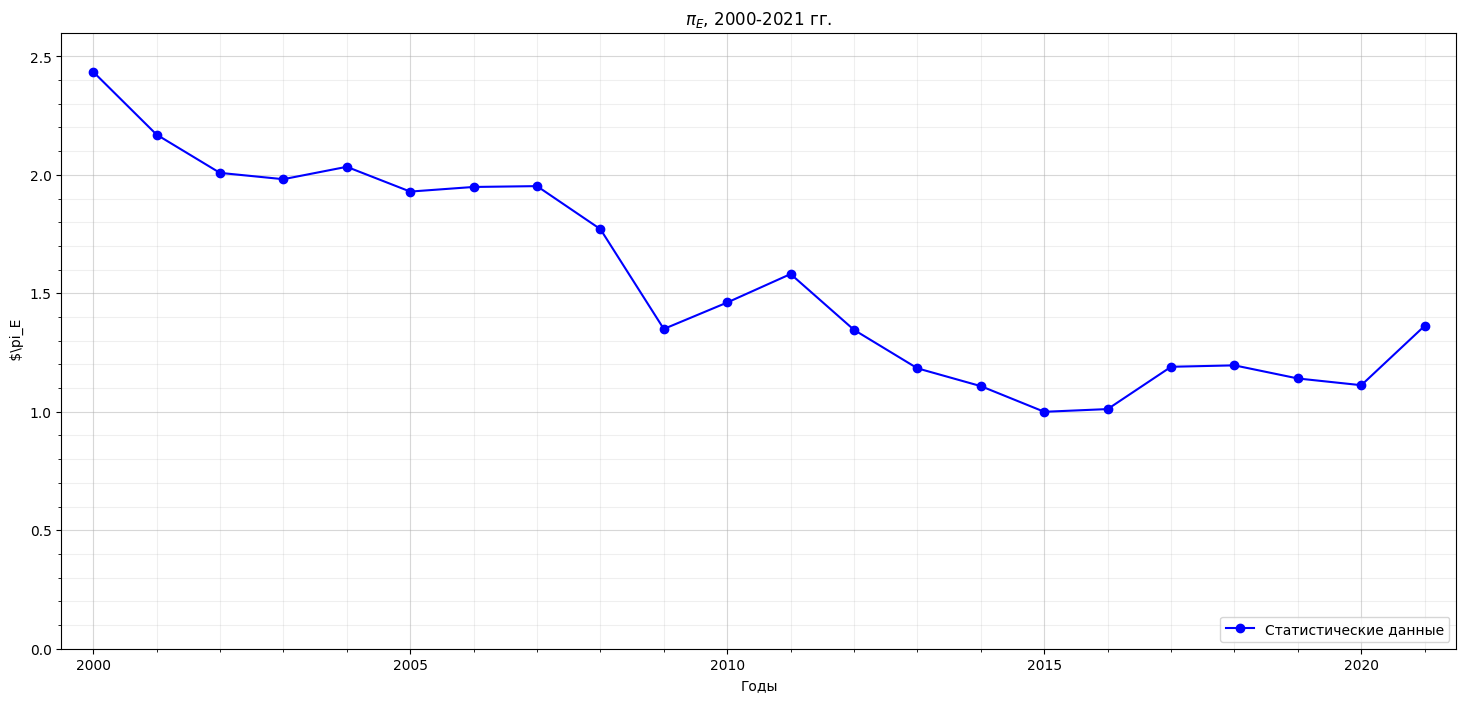

In [127]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2000_2021_np_int, pi_E_2000_2021, '-bo', label='Статистические данные', color='blue')

plt.xlim(1999.5, 2021.5)
plt.ylim(0, 2.6)

plt.title(r'$\pi_E$, 2000-2021 гг.')

plt.xlabel('Годы')
plt.ylabel(r' $\pi_E')

plt.legend(loc=4)

ax.set_xticks(np.arange(2000, 2021, 5))
ax.set_xticks(YEARS_2000_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 2.6, 0.5))
ax.set_yticks(np.arange(0.0, 2.6, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

<ipython-input-128-7bd0aabf52dd>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(YEARS_2014_2021_np_int, pi_E_2014_2021, '-bo', label='Статистические данные', color='blue')


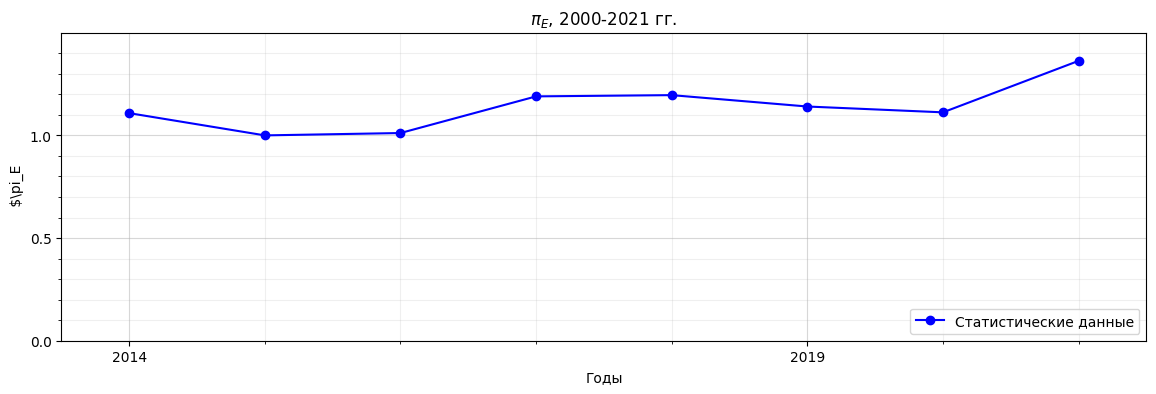

In [128]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

ax.plot(YEARS_2014_2021_np_int, pi_E_2014_2021, '-bo', label='Статистические данные', color='blue')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.5)

plt.title(r'$\pi_E$, 2000-2021 гг.')

plt.xlabel('Годы')
plt.ylabel(r' $\pi_E')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.5, 0.5))
ax.set_yticks(np.arange(0.0, 1.5, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [129]:
def find_best_params_pi(array_data, array_target, left_bound_a=-1.0, right_bound_a = 1.0, step_a = 0.01,  left_bound_b = -1.0, right_bound_b=1.0, step_b=0.01,
                     liter=None):
    global f_E, f_I, f_J

    best_a = 0.0
    best_b = 0.0
    best_metrica = -10

    a_arange = np.arange(left_bound_a, right_bound_a + step_a, step=step_a)
    b_arange = np.arange(left_bound_b, right_bound_b + step_b, step=step_b)

    for current_a_raw in a_arange:
        current_a = round(current_a_raw, 3)
        for current_b_raw in b_arange:
            current_b = round(current_b_raw, 3)
            current_metrica = 0
            if liter=='E':
                current_metrica = metrica(fi_E(array_data, current_a, current_b), array_target)/ len(array_data)
            elif liter=='I':
                current_metrica = metrica(fi_I(array_data, current_a, current_b), array_target)/ len(array_data)
            elif liter=='J':
                current_metrica = metrica(fi_J(array_data, current_a, current_b), array_target)/ len(array_data)
            else:
                print('Wrong parameter liter')
                break
            if (best_metrica < 0 or current_metrica < best_metrica):
                best_a = current_a.copy()
                best_b = current_b.copy()
                best_metrica = current_metrica.copy()
            if (current_a == round(current_a, 1) and current_b == round(current_b, 1)):
                print(current_a, current_b, current_metrica, best_a, best_b, best_metrica)
    return best_a, best_b, best_metrica

In [130]:
best_a_E, best_b_E, best_E_metrika = find_best_params_pi(array_data=YEARS_2014_2021_np_int, array_target=pi_E_2014_2021, liter='E')
best_a_E, best_b_E, best_E_metrika

-1.0 -1.0 0.12490058856638404 -1.0 -1.0 0.12490058856638404
-1.0 -0.9 0.12479564054749993 -1.0 -0.9 0.12479564054749993
-1.0 -0.8 0.12457945868358511 -1.0 -0.8 0.12457945868358511
-1.0 -0.7 0.12413367751783749 -1.0 -0.7 0.12413367751783749
-1.0 -0.6 0.12321293034597564 -1.0 -0.6 0.12321293034597564
-1.0 -0.5 0.12130438393737467 -1.0 -0.5 0.12130438393737467
-1.0 -0.4 0.11731672975935534 -1.0 -0.4 0.11731672975935534
-1.0 -0.3 0.10885846284841175 -1.0 -0.3 0.10885846284841175
-1.0 -0.2 0.09060695733728613 -1.0 -0.2 0.09060695733728613
-1.0 -0.1 0.05229313482739247 -1.0 -0.1 0.05229313482739247
-1.0 0.0 0.014548225735494745 -1.0 -0.02 0.006246231318764613
-1.0 0.1 0.07908721656664248 -1.0 -0.02 0.006246231318764613
-1.0 0.2 0.11832342704015385 -1.0 -0.02 0.006246231318764613
-1.0 0.3 0.13769636726122952 -1.0 -0.02 0.006246231318764613
-1.0 0.4 0.1475860660679645 -1.0 -0.02 0.006246231318764613
-1.0 0.5 0.1531115008390695 -1.0 -0.02 0.006246231318764613
-1.0 0.6 0.15647124079713526 -1.0 -

(0.75, -0.11, 0.006062614290623775)

In [131]:
#этот блок использовался для ускорения работы при многократных повторных запусках
best_a_E, best_b_E, best_E_metrica = 0.75, -0.11, 0.006062614290623775

In [132]:
best_a_I, best_b_I, best_I_metrika = find_best_params_pi(array_data=YEARS_2014_2021_np_int, array_target=pi_I_2014_2021, liter='I')
best_a_I, best_b_I, best_I_metrika

-1.0 -1.0 0.12499741381316662 -1.0 -1.0 0.12499741381316662
-1.0 -0.9 0.12499468176749884 -1.0 -0.9 0.12499468176749884
-1.0 -0.8 0.12498904916970896 -1.0 -0.8 0.12498904916970896
-1.0 -0.7 0.12497742388743342 -1.0 -0.7 0.12497742388743342
-1.0 -0.6 0.12495341192382553 -1.0 -0.6 0.12495341192382553
-1.0 -0.5 0.12490380654827785 -1.0 -0.5 0.12490380654827785
-1.0 -0.4 0.12480141369502877 -1.0 -0.4 0.12480141369502877
-1.0 -0.3 0.12459060688861644 -1.0 -0.3 0.12459060688861644
-1.0 -0.2 0.12415908458093719 -1.0 -0.2 0.12415908458093719
-1.0 -0.1 0.12328585467203187 -1.0 -0.1 0.12328585467203187
-1.0 0.0 0.12155720193389105 -1.0 0.0 0.12155720193389105
-1.0 0.1 0.11827094182637071 -1.0 0.1 0.11827094182637071
-1.0 0.2 0.11244876709728871 -1.0 0.2 0.11244876709728871
-1.0 0.3 0.10322189120420643 -1.0 0.3 0.10322189120420643
-1.0 0.4 0.09066652433348055 -1.0 0.4 0.09066652433348055
-1.0 0.5 0.07628643325123961 -1.0 0.5 0.07628643325123961
-1.0 0.6 0.062216781153534115 -1.0 0.6 0.06221678115

(0.01, 0.22, 0.004398091628867321)

In [133]:
#этот блок использовался для ускорения работы при многократных повторных запусках
best_a_I, best_b_I, best_I_metrika = 0.01, 0.22, 0.004398091628867321

In [134]:
best_a_J, best_b_J, best_J_metrika = find_best_params_pi(array_data=YEARS_2014_2021_np_int, array_target=pi_J_2014_2021, liter='J', right_bound_a=2.0)
best_a_J, best_b_J, best_J_metrika

-1.0 -1.0 0.12500805057070463 -1.0 -1.0 0.12500805057070463
-1.0 -0.9 0.12501664449137442 -1.0 -1.0 0.12500805057070463
-1.0 -0.8 0.12503446746281605 -1.0 -1.0 0.12500805057070463
-1.0 -0.7 0.12507146979158545 -1.0 -1.0 0.12500805057070463
-1.0 -0.6 0.12514829710142888 -1.0 -1.0 0.12500805057070463
-1.0 -0.5 0.12530749704136512 -1.0 -1.0 0.12500805057070463
-1.0 -0.4 0.12563531939571304 -1.0 -1.0 0.12500805057070463
-1.0 -0.3 0.1263002499100647 -1.0 -1.0 0.12500805057070463
-1.0 -0.2 0.12760598077823926 -1.0 -1.0 0.12500805057070463
-1.0 -0.1 0.1300120041000978 -1.0 -1.0 0.12500805057070463
-1.0 0.0 0.1339743551054321 -1.0 -1.0 0.12500805057070463
-1.0 0.1 0.13947628504785187 -1.0 -1.0 0.12500805057070463
-1.0 0.2 0.1456597895426358 -1.0 -1.0 0.12500805057070463
-1.0 0.3 0.15132456215278456 -1.0 -1.0 0.12500805057070463
-1.0 0.4 0.1558002138519347 -1.0 -1.0 0.12500805057070463
-1.0 0.5 0.15908080239578476 -1.0 -1.0 0.12500805057070463
-1.0 0.6 0.16143907734538462 -1.0 -1.0 0.1250080505

(0.99, -0.08, 0.0019962160361128773)

In [135]:
#этот блок использовался для ускорения работы при многократных повторных запусках
best_a_J, best_b_J, best_J_metrika = 0.99, -0.08, 0.0019962160361128773

In [136]:
pi_I_2014_2021_approximation = fi_I(YEARS_2014_2021, best_a_I, best_b_I)
pi_J_2014_2021_approximation = fi_J(YEARS_2014_2021, best_a_J, best_b_J)
pi_E_2014_2021_approximation = fi_E(YEARS_2014_2021, best_a_E, best_b_E)

In [137]:
pi_I_2014_2032_approximation = fi_I(YEARS_2014_2032, best_a_I, best_b_I)
pi_J_2014_2032_approximation = fi_J(YEARS_2014_2032, best_a_J, best_b_J)
pi_E_2014_2032_approximation = fi_E(YEARS_2014_2032, best_a_E, best_b_E)

In [138]:
pi_I_2014_2032_approximation, pi_J_2014_2032_approximation, pi_E_2014_2032_approximation

(array([1.        , 0.99197481, 0.97423854, 0.95348338, 0.93363473,
        0.91678223, 0.90383129, 0.89495326, 0.88989129, 0.88816392,
        0.88919684, 0.89240484, 0.89723977, 0.9032158 , 0.90991986,
        0.91701287, 0.92422545, 0.93135064, 0.93823551]),
 array([0.98      , 0.96833426, 0.95479467, 0.93915003, 0.92114361,
        0.90049052, 0.87687479, 0.8499462 , 0.81931672, 0.78455668,
        0.7451905 , 0.70069204, 0.65047946, 0.59390962, 0.53027187,
        0.45878129, 0.37857125, 0.28868521, 0.18806779]),
 array([1.        , 1.02906952, 1.06151918, 1.09774203, 1.1381768 ,
        1.18331325, 1.23369808, 1.28994156, 1.35272493, 1.42280862,
        1.50104151, 1.58837116, 1.68585534, 1.7946748 , 1.91614757,
        2.05174496, 2.20310935, 2.3720741 , 2.56068575]))

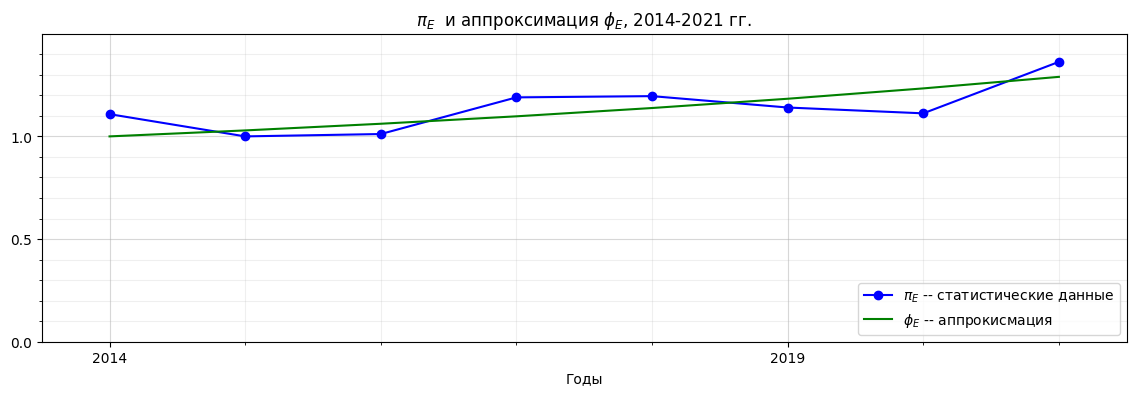

In [139]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

plt.plot(YEARS_2014_2021_np_int, pi_E_2014_2021, '-bo', label='$\pi_E$ -- статистические данные')
plt.plot(YEARS_2014_2021_np_int, pi_E_2014_2021_approximation, label='$\phi_E$ -- аппрокисмация', color='green')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.5)

plt.title(r'$\pi_E$  и аппроксимация $\phi_E$, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.5, 0.5))
ax.set_yticks(np.arange(0.0, 1.5, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

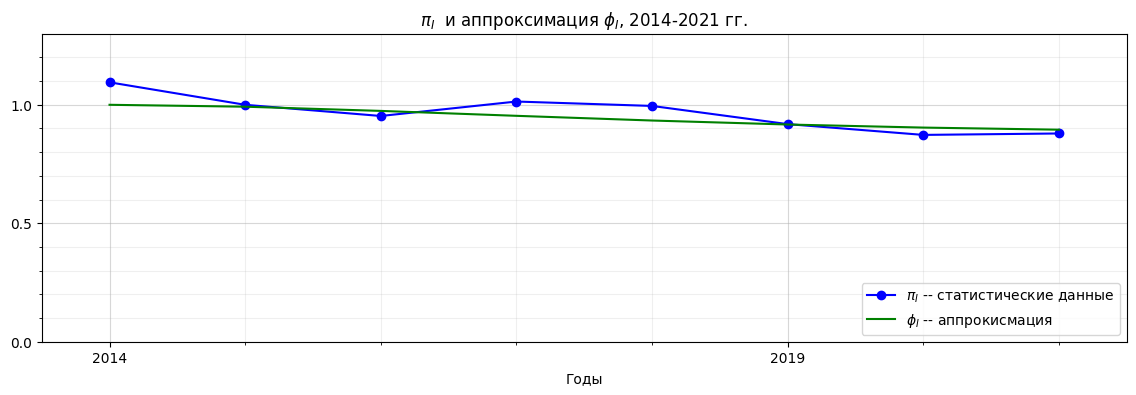

In [140]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

plt.plot(YEARS_2014_2021_np_int, pi_I_2014_2021, '-bo', label='$\pi_I$ -- статистические данные')
plt.plot(YEARS_2014_2021_np_int, pi_I_2014_2021_approximation, label='$\phi_I$ -- аппрокисмация', color='green')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.3)

plt.title(r'$\pi_I$  и аппроксимация $\phi_I$, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.3, 0.5))
ax.set_yticks(np.arange(0.0, 1.3, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

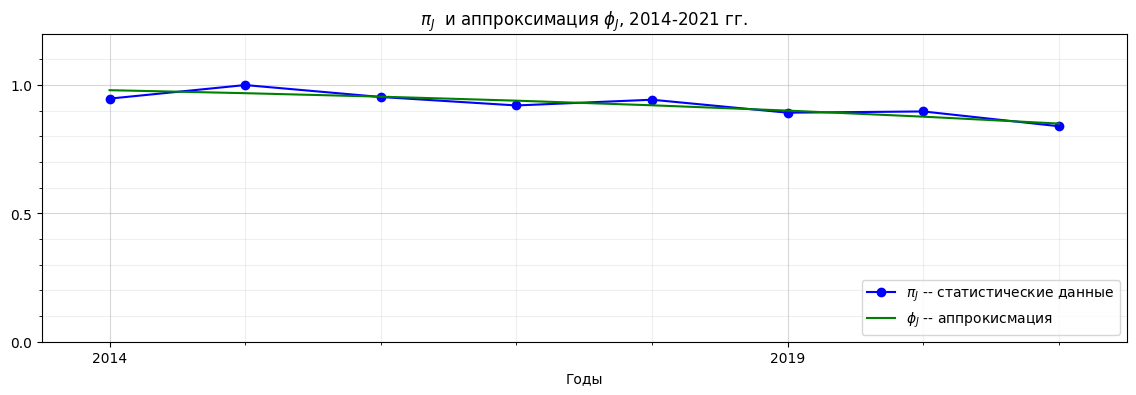

In [141]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

plt.plot(YEARS_2014_2021_np_int, pi_J_2014_2021, '-bo', label='$\pi_J$ -- статистические данные')
plt.plot(YEARS_2014_2021_np_int, pi_J_2014_2021_approximation, label='$\phi_J$ -- аппрокисмация', color='green')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.2)

plt.title(r'$\pi_J$  и аппроксимация $\phi_J$, 2014-2021 гг.')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.2, 0.5))
ax.set_yticks(np.arange(0.0, 1.2, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

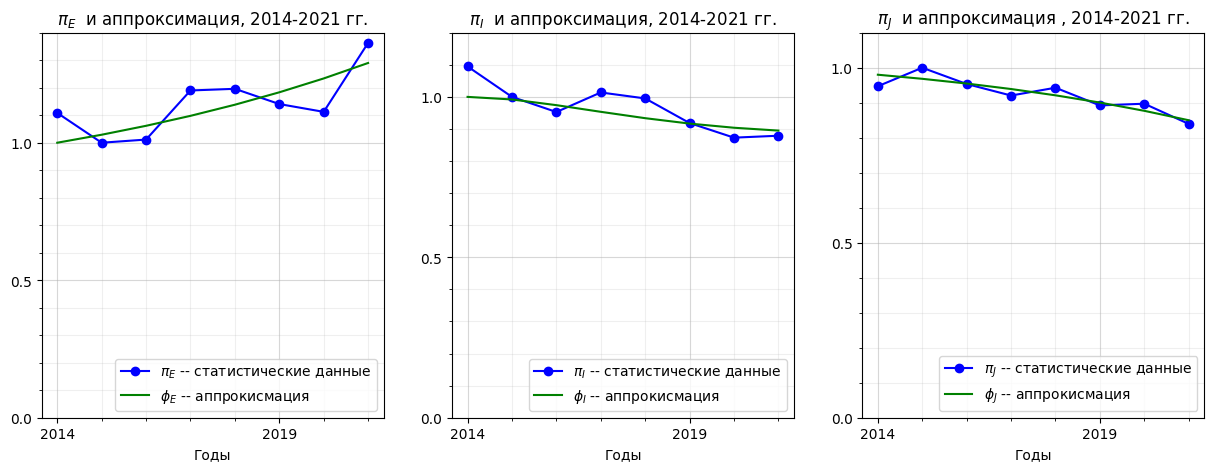

In [142]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=False)

fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].plot(YEARS_2014_2021_np_int, pi_E_2014_2021, '-bo', label='$\pi_E$ -- статистические данные')
ax[0].plot(YEARS_2014_2021_np_int, pi_E_2014_2021_approximation, label='$\phi_E$ -- аппрокисмация', color='green')

ax[0].set_title(r'$\pi_E$  и аппроксимация, 2014-2021 гг.')

ax[0].set_xlabel('Годы')

ax[0].legend(loc=4)

ax[0].set_xticks(np.arange(2014, 2021, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0.0, 1.5, 0.5))
ax[0].set_yticks(np.arange(0.0, 1.5, 0.1), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)




ax[1].plot(YEARS_2014_2021_np_int, pi_I_2014_2021, '-bo', label='$\pi_I$ -- статистические данные')
ax[1].plot(YEARS_2014_2021_np_int, pi_I_2014_2021_approximation, label='$\phi_I$ -- аппрокисмация', color='green')

ax[1].set_title(r'$\pi_I$  и аппроксимация, 2014-2021 гг.')

ax[1].set_xlabel('Годы')

ax[1].legend(loc=4)

ax[1].set_xticks(np.arange(2014, 2021, 5))
ax[1].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[1].set_yticks(np.arange(0.0, 1.3, 0.5))
ax[1].set_yticks(np.arange(0.0, 1.3, 0.1), minor=True)

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)



ax[2].plot(YEARS_2014_2021_np_int, pi_J_2014_2021, '-bo', label='$\pi_J$ -- статистические данные')
ax[2].plot(YEARS_2014_2021_np_int, pi_J_2014_2021_approximation, label='$\phi_J$ -- аппрокисмация', color='green')

ax[2].set_title(r'$\pi_J$  и аппроксимация , 2014-2021 гг.')

ax[2].set_xlabel('Годы')

ax[2].legend(loc=4)

ax[2].set_xticks(np.arange(2014, 2021, 5))
ax[2].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[2].set_yticks(np.arange(0.0, 1.2, 0.5))
ax[2].set_yticks(np.arange(0.0, 1.2, 0.1), minor=True)

ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=0.5)



plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

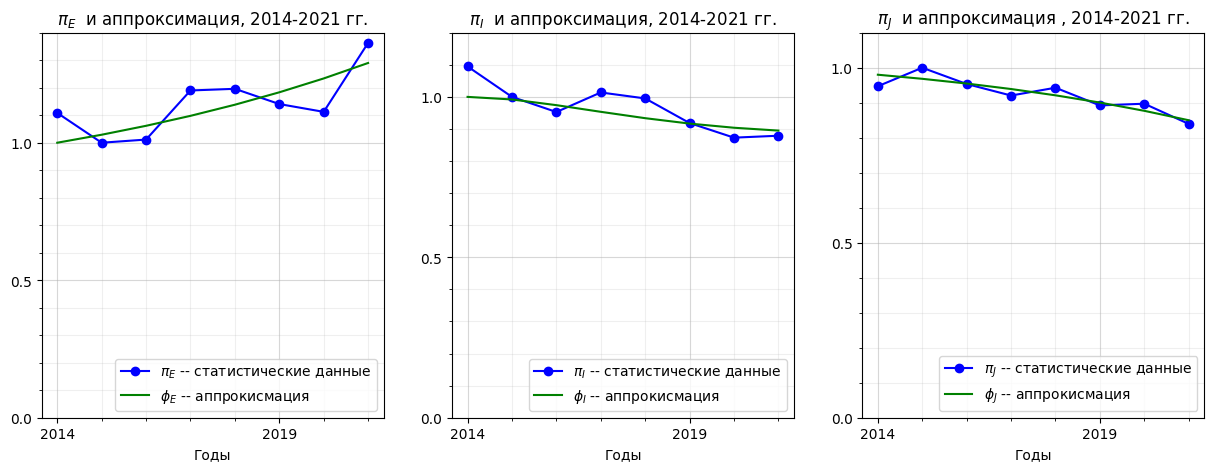

In [143]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=False)

fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].plot(YEARS_2014_2021_np_int, pi_E_2014_2021, '-bo', label='$\pi_E$ -- статистические данные')
ax[0].plot(YEARS_2014_2021_np_int, pi_E_2014_2021_approximation, label='$\phi_E$ -- аппрокисмация', color='green')

ax[0].set_title(r'$\pi_E$  и аппроксимация, 2014-2021 гг.')

ax[0].set_xlabel('Годы')

ax[0].legend(loc=4)

ax[0].set_xticks(np.arange(2014, 2021, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0.0, 1.5, 0.5))
ax[0].set_yticks(np.arange(0.0, 1.5, 0.1), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)




ax[1].plot(YEARS_2014_2021_np_int, pi_I_2014_2021, '-bo', label='$\pi_I$ -- статистические данные')
ax[1].plot(YEARS_2014_2021_np_int, pi_I_2014_2021_approximation, label='$\phi_I$ -- аппрокисмация', color='green')

ax[1].set_title(r'$\pi_I$  и аппроксимация, 2014-2021 гг.')

ax[1].set_xlabel('Годы')

ax[1].legend(loc=4)

ax[1].set_xticks(np.arange(2014, 2021, 5))
ax[1].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[1].set_yticks(np.arange(0.0, 1.3, 0.5))
ax[1].set_yticks(np.arange(0.0, 1.3, 0.1), minor=True)

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)



ax[2].plot(YEARS_2014_2021_np_int, pi_J_2014_2021, '-bo', label='$\pi_J$ -- статистические данные')
ax[2].plot(YEARS_2014_2021_np_int, pi_J_2014_2021_approximation, label='$\phi_J$ -- аппрокисмация', color='green')

ax[2].set_title(r'$\pi_J$  и аппроксимация , 2014-2021 гг.')

ax[2].set_xlabel('Годы')

ax[2].legend(loc=4)

ax[2].set_xticks(np.arange(2014, 2021, 5))
ax[2].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[2].set_yticks(np.arange(0.0, 1.2, 0.5))
ax[2].set_yticks(np.arange(0.0, 1.2, 0.1), minor=True)

ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=0.5)



plt.savefig('pi_approximations_2014_2021.png')
files.download('pi_approximations_2014_2021.png')

In [144]:
L_2014_2021 = Mongolia_number_employed_persons_2014_2021_counted
L_2014_2021

array([0.90252162, 0.93305187, 0.96497053, 0.99792014, 1.03186006,
       1.06647469, 1.09942932, 1.13      ])

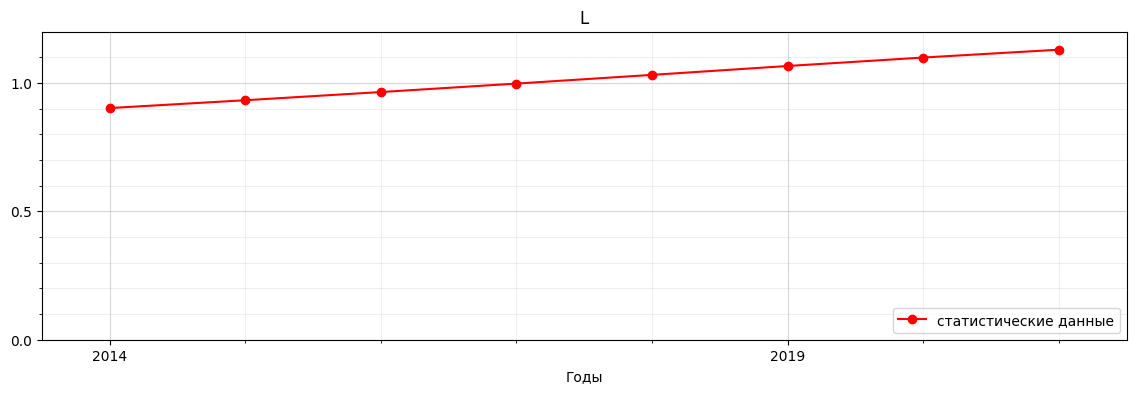

In [145]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

plt.plot(YEARS_2014_2021_np_int, L_2014_2021, '-ro', label='статистические данные')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.2)

plt.title(r'L')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.2, 0.5))
ax.set_yticks(np.arange(0.0, 1.2, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [146]:
def L_exponential_approximation(c_1, c_2, array=YEARS_2014_2021_np_int):
    return c_1 * np.exp(c_2 * (array - 2014))

In [147]:
raw_coeficients = np.polyfit(YEARS_2014_2021_np_int, np.log(L_2014_2021), deg=1)
B = raw_coeficients[0]
C = raw_coeficients[1]
log_A = C + 2014*B
A = np.exp(log_A)
print('A * e^{B(t - 2015)} ', 'A =', A, 'B =', B)

A * e^{B(t - 2015)}  A = 0.9041596646842853 B = 0.03246886116515217


In [148]:
L_2014_2021_exponential_approximation_descrete = L_exponential_approximation(A, B)
L_2014_2021_exponential_approximation_descrete

array([0.90415966, 0.93399849, 0.96482206, 0.99666285, 1.02955444,
       1.06353152, 1.09862989, 1.13488658])

In [149]:
L_2014_2032_exponential_approximation_descrete = L_exponential_approximation(c_1=A, c_2=B, array=YEARS_2014_2032_np_int)
L_2014_2032_exponential_approximation_descrete

array([0.90415966, 0.93399849, 0.96482206, 0.99666285, 1.02955444,
       1.06353152, 1.09862989, 1.13488658, 1.17233979, 1.21102903,
       1.25099508, 1.29228008, 1.33492755, 1.37898246, 1.42449126,
       1.47150193, 1.52006404, 1.57022878, 1.62204904])

In [150]:
L_2014_2021_exponential_approximation_continious = L_exponential_approximation(c_1=A, c_2=B, array=create_arange(2014, 2021, CONST_ARANGE_STEP))

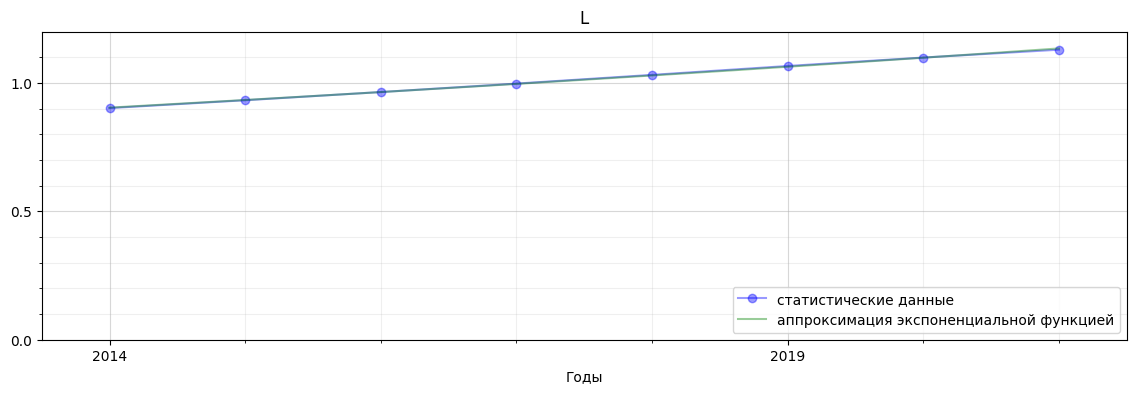

In [151]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

ax.plot(YEARS_2014_2021_np_int, L_2014_2021, '-bo', label='статистические данные', alpha=0.4)
ax.plot(create_arange(2014, 2021, CONST_ARANGE_STEP), L_2014_2021_exponential_approximation_continious , label='аппроксимация экспоненциальной функцией', alpha=0.4, color='green')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.2)

plt.title(r'L')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.2, 0.5))
ax.set_yticks(np.arange(0.0, 1.2, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

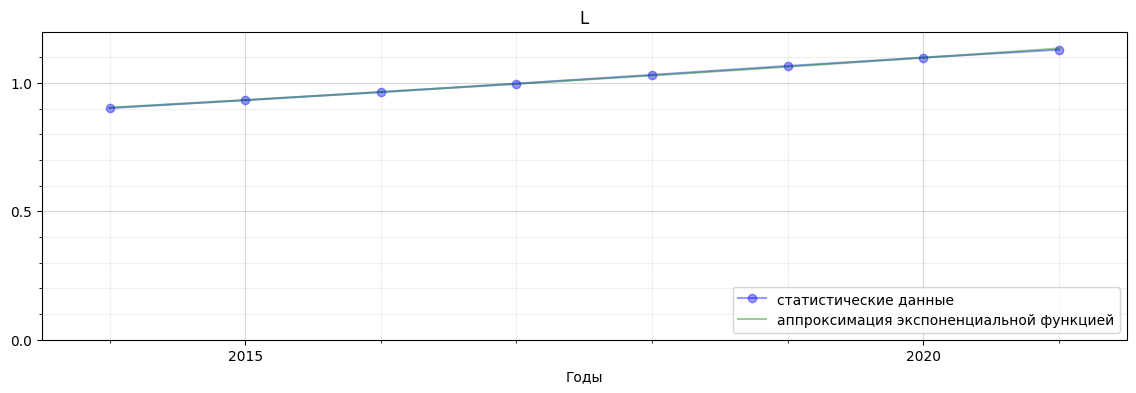

In [152]:
fig, ax = plt.subplots()

fig.set_figwidth(14)
fig.set_figheight(4)

ax.plot(YEARS_2014_2021_np_int, L_2014_2021, '-bo', label='статистические данные', alpha=0.4)
ax.plot(create_arange(2014, 2021, CONST_ARANGE_STEP), L_2014_2021_exponential_approximation_continious , label='аппроксимация экспоненциальной функцией', alpha=0.4, color='green')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 1.2)

plt.title(r'L')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 1.2, 0.5))
ax.set_yticks(np.arange(0.0, 1.2, 0.1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.savefig('L_approximation.png')
files.download('L_approximation.png')

In [153]:
L_2014_2021_approximation = L_2014_2021_exponential_approximation_descrete.copy()

In [154]:
L_2014_2032_approximation = L_2014_2032_exponential_approximation_descrete.copy()

In [155]:
a_arange = np.arange(0.01, 0.99 + 0.01, step=0.01)
b_arange = np.arange(-0.99, 1.99 + 0.01, step=0.01)
mu_arange = np.arange(-0.19, 0.1, step=0.0001)
alpha_arange = np.arange(0.001, 2.999 + 0.001, step=0.001)

In [156]:
YEARS_2014_2021_np = np.array(YEARS_2014_2021)
YEARS_2014_2021_np_int = np.array(YEARS_2014_2021, dtype=int)
YEARS_2014_2021_np_int

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

В дискретном виде модель приобретает вид:
$$K_{t + 1} = (1 - \mu) \cdot K_{t} + J_{t} , t_0 = 2015, K_{2015} = Y_{stat}(t_0)/\alpha_{K_{0}} $$

In [157]:
beta_2014_2021 = sigma_2014_2021 * (1 + rho_2014_2021 * (1 - delta_2014_2021))
beta_2014_2021

array([0.38797868, 0.26714103, 0.24682641, 0.30139305, 0.44144974,
       0.39815604, 0.24731677, 0.40250206])

In [158]:
beta_2014_2021_approximation = sigma_2014_2021_approximation * (1 + rho_2014_2021_approximation * (1 - delta_2014_2021_approximation))
beta_2014_2032_approximation = sigma_2014_2032_approximation * (1 + rho_2014_2032_approximation * (1 - delta_2014_2032_approximation))
beta_2014_2021_approximation

array([0.40641747, 0.30322205, 0.24061557, 0.34306267, 0.44172438,
       0.34523809, 0.25702813, 0.32089418])

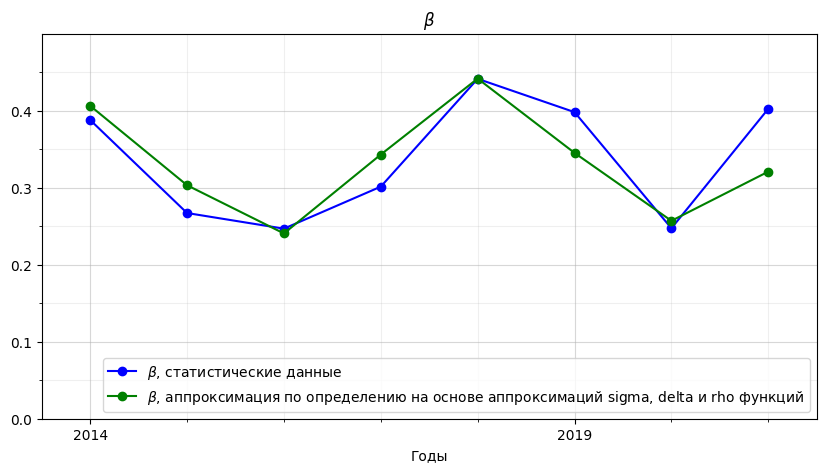

In [159]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, beta_2014_2021, '-bo', label=r'$\beta$, статистические данные')
plt.plot(YEARS_2014_2021_np_int, beta_2014_2021_approximation, '-go', label=r'$\beta$, аппроксимация по определению на основе аппроксимаций sigma, delta и rho функций')

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 0.5)

plt.title(r'$\beta$')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 0.5, 0.1))
ax.set_yticks(np.arange(0.0, 0.5, 0.05), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [160]:
L_2014_2021_stat = L_2014_2021.copy()
L_2014_2021_stat

array([0.90252162, 0.93305187, 0.96497053, 0.99792014, 1.03186006,
       1.06647469, 1.09942932, 1.13      ])

In [161]:
J_2014_2021_stat = Mongolia_GCF_constant_1970_2021[CONST_2014:]
C_2014_2021_stat = Mongolia_FCE_constant_1970_2021[CONST_2014:]
E_2014_2021_stat = Mongolia_EGS_constant_1970_2021[CONST_2014:]
I_2014_2021_stat = Mongolia_IGS_constant_1970_2021[CONST_2014:]
Y_2014_2021_stat = Mongolia_GDP_constant_1970_2021[CONST_2014:]

In [162]:
Q_2014_2021_stat = ((1 - sigma_2014_2021) * (1 + rho_2014_2021 * (1 - delta_2014_2021)) - delta_2014_2021) * Y_2014_2021_stat

In [163]:
L_0 = L_2014_2021_approximation[0]
Y_0 = Y_2014_2021_stat[0]

In [164]:
def general_estimation_K_Y(a, b, mu, alpha, beta, L, pi_J, last_year=2021):
    global Y_0
    K_0 = Y_0 / alpha
    length = last_year - 2014 + 1
    K_estimation = np.array([0] * length, dtype=float)
    K_estimation[0] = K_0
    Y_estimation = np.array([0] * length, dtype=float)
    Y_estimation[0] = Y_0

    k_estimation = np.array([0] * length, dtype=float)
    k_estimation[0] = 1
    y_estimation = np.array([0] * length, dtype=float)
    y_estimation[0] = 1

    l_estimation = L / L_0

    for i in range(1, length, 1):
        k_estimation[i] = (1 - mu) * k_estimation[i - 1] + alpha * beta[i - 1] * y_estimation[i - 1] / pi_J[i - 1]
        y_estimation[i] = (a * (l_estimation[i] ** (-b)) + (1 - a) * (k_estimation[i] ** (-b))) ** (-1 / b)

    Y_estimation = y_estimation * Y_0
    K_estimation = k_estimation * K_0
    return Y_estimation, K_estimation

In [165]:
def general_estimation(a, b, mu, alpha, Y, sigma, rho, delta, pi_E, pi_I, pi_J):
    E = delta * Y / pi_E
    I = rho * (1 - delta) * Y / pi_I
    J = sigma * (1 + rho * (1 - delta)) * Y / pi_J
    Q = ((1 - sigma) * (1 + rho * (1 - delta)) - delta) * Y
    return E, I, J, Q

In [166]:
def general_identification(Y_stat, I_stat, E_stat, J_stat, Q_stat, pi_E_approximation,
                           pi_I_approximation, pi_J_approximation, sigma_approximation,
                           delta_approximation, rho_approximation, L_approximation,
                           ab_step=0.1, mu_step=0.001, alpha_step=0.01):
    global K_0, Y_0
    beta_approximation = sigma_approximation * (1 + rho_approximation * (1 - delta_approximation))
    best_a = 0
    best_b = 0
    best_mu = 0
    best_alpha = 0
    best_S = -1000
    best_Y_estimation = 0
    best_J_estimation = 0
    best_E_estimation = 0
    best_I_estimation = 0
    best_Q_estimation = 0
    a_arange = np.arange(0.0, 1 , step=ab_step)
    b_arange = np.arange(-1.0, 3.0 , step=ab_step)
    mu_arange = np.arange(-0.2, 0.2 , step=mu_step)
    alpha_arange = np.arange(0.0, 3.0 , step=alpha_step)

    for a_raw in a_arange:
        current_a = round(a_raw, 3)
        for b_raw in b_arange:
            current_b = round(b_raw, 3)
            if (current_b == 0):
                continue
            for mu_raw in mu_arange:
                current_mu = round(mu_raw, 3)
                for alpha_raw in alpha_arange:
                    current_alpha = round(alpha_raw, 3)
                    Y_estimation, K_estimation = general_estimation_K_Y(a=current_a,
                                          b=current_b, alpha = current_alpha,  mu=current_mu, beta=beta_approximation, last_year=2021, L=L_approximation, pi_J=pi_J_approximation)

                    E_estimation, I_estimation, J_estimation, Q_estimation = general_estimation(a=current_a, b=current_b,
                              mu=current_mu, alpha=current_alpha, Y=Y_estimation, sigma=sigma_approximation,
                              rho=rho_approximation, delta=delta_approximation, pi_E=pi_E_approximation,
                              pi_J=pi_J_approximation, pi_I=pi_I_approximation)
                    S = Theil_convolution(Y_stat=Y_stat, Y_estimation=Y_estimation,
                                          I_stat=I_stat, I_estimation=I_estimation,
                                          E_stat=E_stat, E_estimation=E_estimation,
                                          J_stat=J_stat, J_estimation=J_estimation,
                                          Q_stat=Q_stat, Q_estimation=Q_estimation)
                    if (best_S < 0 or S > best_S):
                        best_a = current_a.copy()
                        best_b = current_b.copy()
                        best_mu = current_mu.copy()
                        best_alpha = current_alpha.copy()
                        best_S = S.copy()
                        best_Y_estimation = Y_estimation.copy()
                        best_I_estimation = I_estimation.copy()
                        best_E_estimation = E_estimation.copy()
                        best_J_estimation = J_estimation.copy()
                        best_Q_estimation = Q_estimation.copy()
                    if (current_a == round(current_a, 1) and current_b == round(current_b, 1) and current_mu == round(current_mu, 1) and current_alpha == round(current_alpha, 1) ):
                        print( current_a, current_b, current_mu, current_alpha, S, best_a, best_b, best_mu, best_alpha, best_S)

    return best_S, best_a, best_b, best_mu, best_alpha, best_Y_estimation, best_I_estimation, best_J_estimation, best_E_estimation, best_Q_estimation

In [167]:
best_S, best_a, best_b, best_mu, best_alpha, best_Y_2014_2021_estimation, best_I_2014_2021_estimation, best_J_2014_2021_estimation, best_E_2014_2021_estimation, best_Q_2014_2021_estimation = general_identification(Y_stat=Y_2014_2021_stat,
                          I_stat=I_2014_2021_stat, E_stat=E_2014_2021_stat, J_stat=J_2014_2021_stat,
                          Q_stat=Q_2014_2021_stat, pi_E_approximation=pi_E_2014_2021_approximation,
                           pi_I_approximation=pi_I_2014_2021_approximation, pi_J_approximation=pi_J_2014_2021_approximation,
                           sigma_approximation=sigma_2014_2021_approximation, delta_approximation=delta_2014_2021_approximation,
                           rho_approximation=rho_2014_2021_approximation, L_approximation=L_2014_2021_approximation,
                           ab_step=0.1, mu_step=0.001, alpha_step=0.01)
best_S, best_a, best_b, best_mu, best_alpha

<ipython-input-164-5e33d4bef729>:3: RuntimeWarning: divide by zero encountered in scalar divide
  K_0 = Y_0 / alpha


Выходные данные были обрезаны до нескольких последних строк (5000).
0.8 2.7 -0.1 1.0 0.6554171460657564 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.1 0.6540472606581608 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.2 0.6528688290287621 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.3 0.6518473130325639 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.4 0.6509557380274331 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.5 0.6501727674117217 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.6 0.64948132974266 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.7 0.6488676235826809 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.8 0.6483203852246165 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 1.9 0.6478303424044569 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 2.0 0.6473898016045746 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 2.1 0.6469923326540545 0.7 2.9 0.197 0.63 0.738860147353366
0.8 2.7 -0.1 2.2 0.6466325251054708 0.7 2.9 0.197 0.63 0.7

(0.7388638559881604, 0.8, 2.9, 0.198, 0.62)

In [ ]:
#этот блок использовался для ускорения работы при многократных повторных запусках
best_S, best_a, best_b, best_mu, best_alpha = 0.7388638559881604, 0.8, 2.9, 0.198, 0.62

In [168]:
best_Y_2014_2021_estimation, best_K_2014_2021_estimation = general_estimation_K_Y(a = best_a, b=best_b,
                              mu=best_mu, alpha=best_alpha, beta=beta_2014_2021_approximation,
                              L=L_2014_2021_approximation, pi_J=pi_J_2014_2021_approximation, last_year=2021)

In [169]:
best_E_2014_2021_estimation, best_I_2014_2021_estimation, best_J_2014_2021_estimation, best_Q_2014_2021_estimation = general_estimation(a = best_a, b=best_b,
                              mu=best_mu, alpha=best_alpha, Y=best_Y_2014_2021_estimation, sigma=sigma_2014_2021_approximation,
                              rho=rho_2014_2021_approximation, delta=delta_2014_2021_approximation, pi_E=pi_E_2014_2021_approximation,
                              pi_J=pi_J_2014_2021_approximation, pi_I=pi_I_2014_2021_approximation)

In [170]:
best_S, best_a, best_b, best_mu, best_alpha, best_Y_2014_2021_estimation, best_I_2014_2021_estimation, best_J_2014_2021_estimation, best_E_2014_2021_estimation, best_Q_2014_2021_estimation

(0.7388638559881604,
 0.8,
 2.9,
 0.198,
 0.62,
 array([20.2977768 , 21.06961165, 21.59247155, 21.94055495, 22.72580127,
        23.88361556, 24.70187432, 25.25271335]),
 array([12.69828534, 10.3267437 , 12.54562604, 15.70604112, 18.66344871,
        19.86743744, 18.18834318, 14.49419386]),
 array([ 8.41772568,  6.59769155,  5.44146813,  8.01467831, 10.89791021,
         9.15671377,  7.24057366,  9.53407258]),
 array([11.70256419, 10.53991369, 11.50139707, 12.0416632 , 12.59001525,
        13.17333966, 13.42801007, 13.42104856]),
 array([13.04412678, 14.07840664, 16.41046558, 16.17037888, 15.78244155,
        18.26400779, 18.22588121, 12.80852229]))

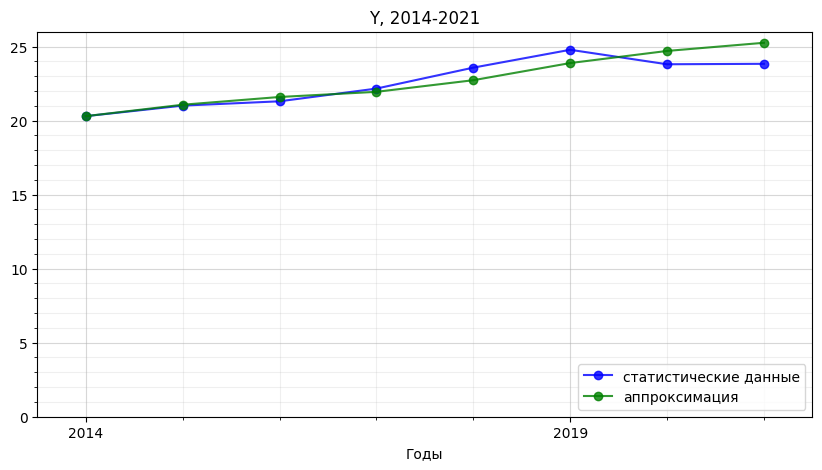

In [171]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, Y_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
plt.plot(YEARS_2014_2021_np_int, best_Y_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 26)

plt.title('Y, 2014-2021')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 26, 5))
ax.set_yticks(np.arange(0.0, 26, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

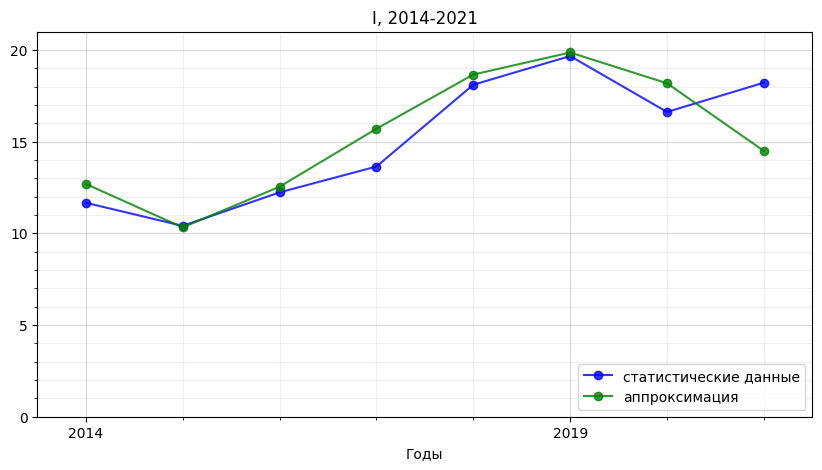

In [172]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, I_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
plt.plot(YEARS_2014_2021_np_int, best_I_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 21)

plt.title('I, 2014-2021')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 21, 5))
ax.set_yticks(np.arange(0.0, 21, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

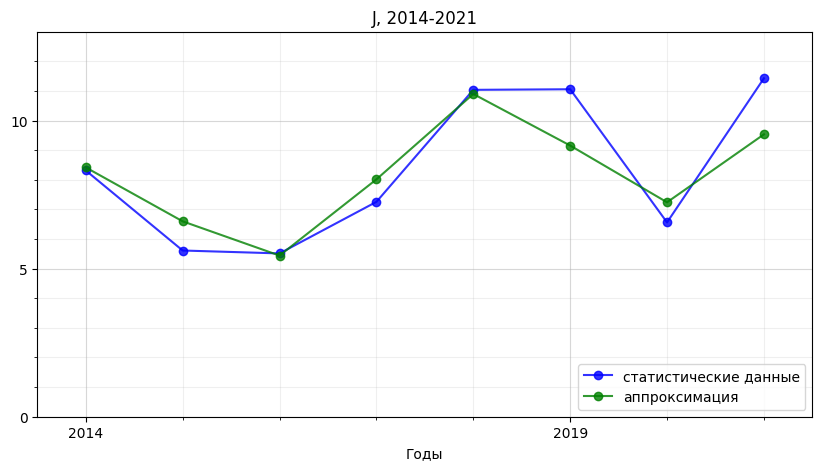

In [173]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, J_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
plt.plot(YEARS_2014_2021_np_int, best_J_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 13)

plt.title('J, 2014-2021')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 13, 5))
ax.set_yticks(np.arange(0.0, 13, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

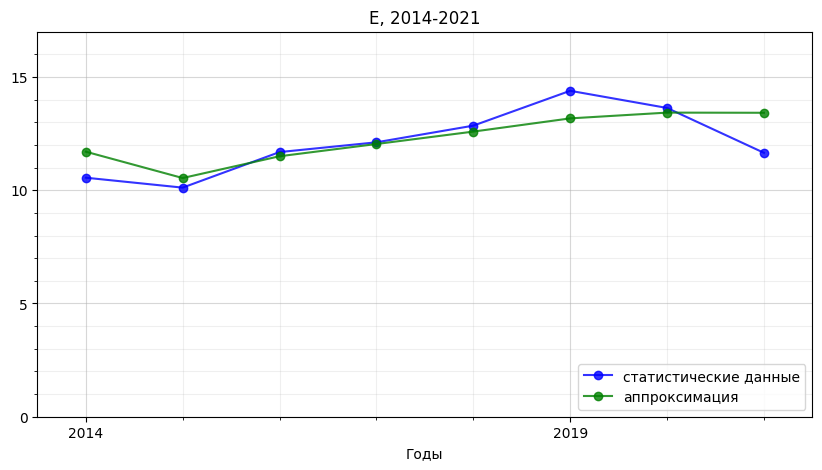

In [174]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, E_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
plt.plot(YEARS_2014_2021_np_int, best_E_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 17)

plt.title('E, 2014-2021')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 17, 5))
ax.set_yticks(np.arange(0.0, 17, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

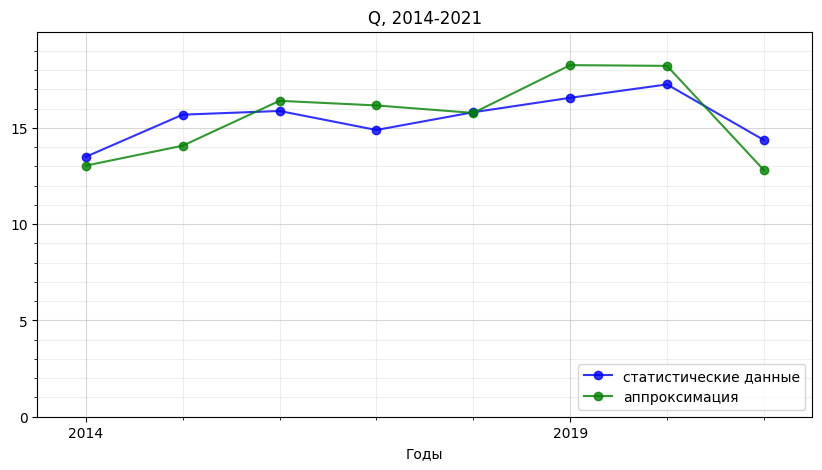

In [175]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(YEARS_2014_2021_np_int, Q_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
plt.plot(YEARS_2014_2021_np_int, best_Q_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

plt.xlim(2013.5, 2021.5)
plt.ylim(0, 20)

plt.title('Q, 2014-2021')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2014, 2021, 5))
ax.set_xticks(YEARS_2014_2021_np_int, minor=True)
ax.set_yticks(np.arange(0.0, 20, 5))
ax.set_yticks(np.arange(0.0, 20, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

In [176]:
import pylab

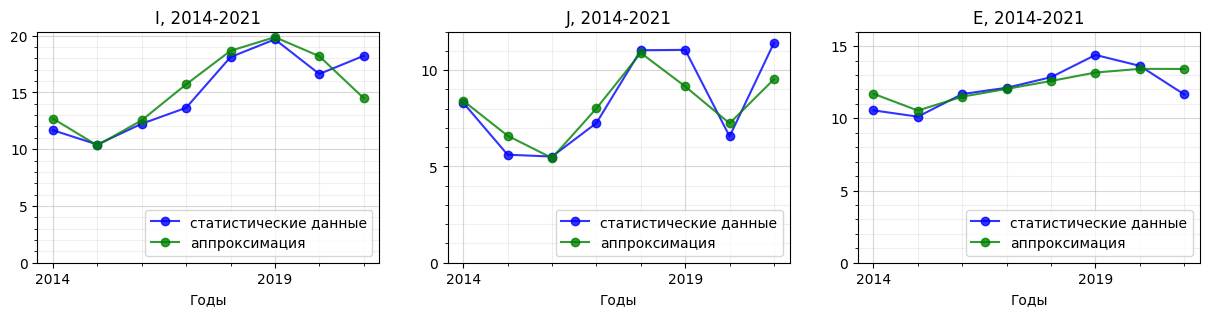

In [177]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=False)

fig.set_figwidth(15)
fig.set_figheight(3)

ax[0].plot(YEARS_2014_2021_np_int, I_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[0].plot(YEARS_2014_2021_np_int, best_I_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[0].set_title('I, 2014-2021')

ax[0].set_xlabel('Годы')

ax[0].legend(loc=4)

ax[0].set_xticks(np.arange(2014, 2021, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0.0, 21, 5))
ax[0].set_yticks(np.arange(0.0, 21, 1), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)



ax[1].plot(YEARS_2014_2021_np_int, J_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[1].plot(YEARS_2014_2021_np_int, best_J_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[1].set_title('J, 2014-2021')

ax[1].set_xlabel('Годы')

ax[1].legend(loc=4)

ax[1].set_xticks(np.arange(2014, 2021, 5))
ax[1].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[1].set_yticks(np.arange(0.0, 13, 5))
ax[1].set_yticks(np.arange(0.0, 13, 1), minor=True)

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)



ax[2].plot(YEARS_2014_2021_np_int, E_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[2].plot(YEARS_2014_2021_np_int, best_E_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[2].set_title('E, 2014-2021')

ax[2].set_xlabel('Годы')

ax[2].legend(loc=4)

ax[2].set_xticks(np.arange(2014, 2021, 5))
ax[2].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[2].set_yticks(np.arange(0.0, 17, 5))
ax[2].set_yticks(np.arange(0.0, 17, 1), minor=True)

ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=0.5)


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

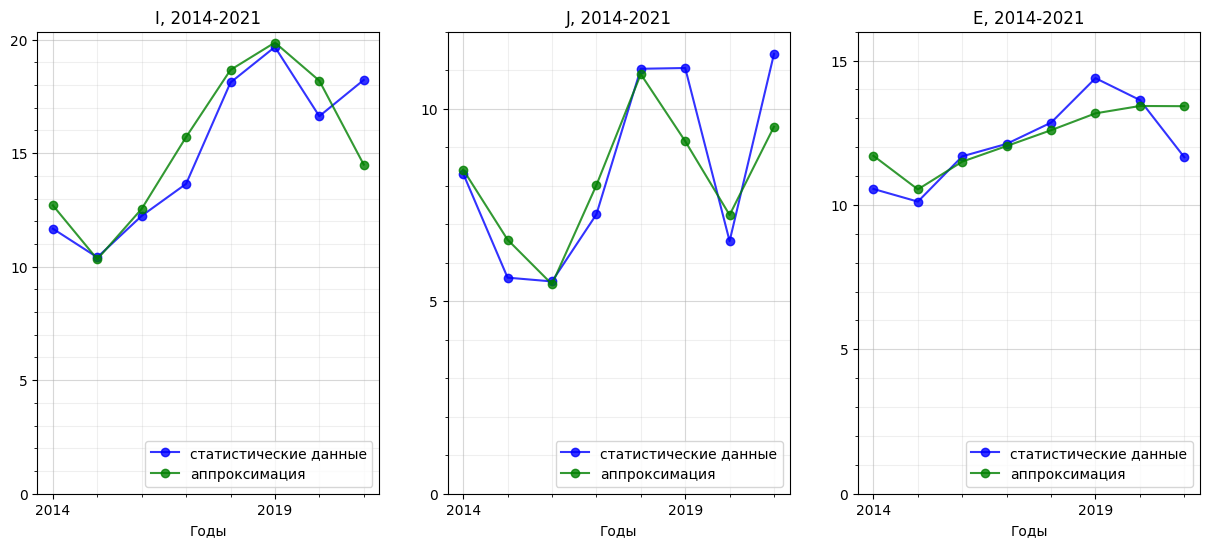

In [178]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=False)

fig.set_figwidth(15)
fig.set_figheight(6)

ax[0].plot(YEARS_2014_2021_np_int, I_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[0].plot(YEARS_2014_2021_np_int, best_I_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[0].set_title('I, 2014-2021')

ax[0].set_xlabel('Годы')

ax[0].legend(loc=4)

ax[0].set_xticks(np.arange(2014, 2021, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0.0, 21, 5))
ax[0].set_yticks(np.arange(0.0, 21, 1), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)



ax[1].plot(YEARS_2014_2021_np_int, J_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[1].plot(YEARS_2014_2021_np_int, best_J_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[1].set_title('J, 2014-2021')

ax[1].set_xlabel('Годы')

ax[1].legend(loc=4)

ax[1].set_xticks(np.arange(2014, 2021, 5))
ax[1].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[1].set_yticks(np.arange(0.0, 13, 5))
ax[1].set_yticks(np.arange(0.0, 13, 1), minor=True)

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)



ax[2].plot(YEARS_2014_2021_np_int, E_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[2].plot(YEARS_2014_2021_np_int, best_E_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[2].set_title('E, 2014-2021')

ax[2].set_xlabel('Годы')

ax[2].legend(loc=4)

ax[2].set_xticks(np.arange(2014, 2021, 5))
ax[2].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[2].set_yticks(np.arange(0.0, 17, 5))
ax[2].set_yticks(np.arange(0.0, 17, 1), minor=True)

ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=0.5)


plt.savefig('E_I_J_approxomations_2014_2021.png')
files.download('E_I_J_approxomations_2014_2021.png')

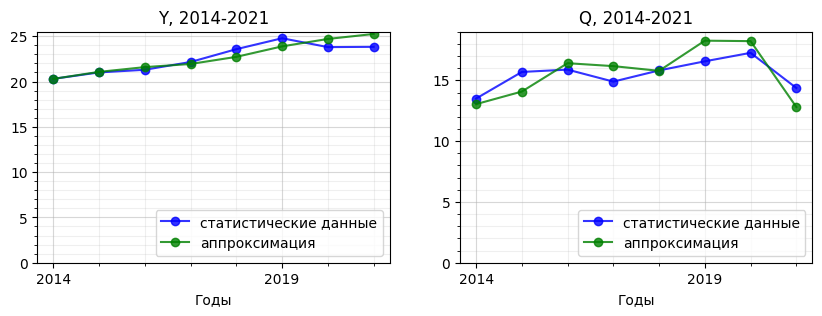

In [179]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)

fig.set_figwidth(10)
fig.set_figheight(3)

ax[0].plot(YEARS_2014_2021_np_int, Y_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[0].plot(YEARS_2014_2021_np_int, best_Y_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[0].set_title('Y, 2014-2021')

ax[0].set_xlabel('Годы')

ax[0].legend(loc=4)

ax[0].set_xticks(np.arange(2014, 2021, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0.0, 26, 5))
ax[0].set_yticks(np.arange(0.0, 26, 1), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)




ax[1].plot(YEARS_2014_2021_np_int, Q_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[1].plot(YEARS_2014_2021_np_int, best_Q_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[1].set_title('Q, 2014-2021')

ax[1].set_xlabel('Годы')

ax[1].legend(loc=4)

ax[1].set_xticks(np.arange(2014, 2021, 5))
ax[1].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[1].set_yticks(np.arange(0.0, 20, 5))
ax[1].set_yticks(np.arange(0.0, 20, 1), minor=True)

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)



plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

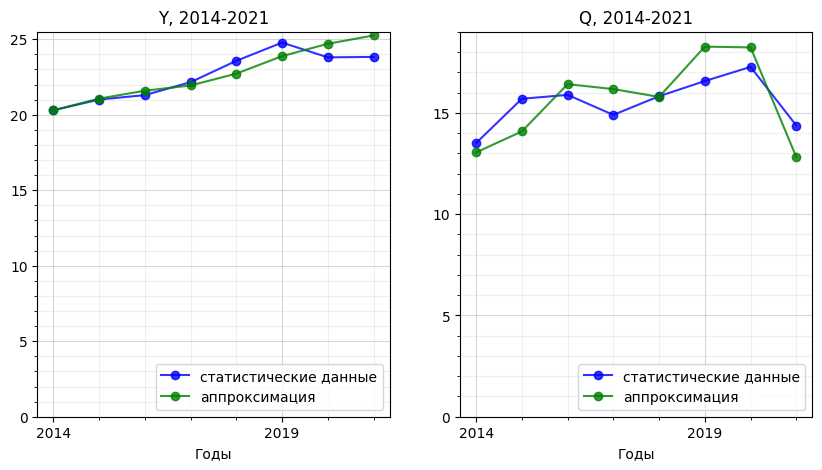

In [180]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)

fig.set_figwidth(10)
fig.set_figheight(5)

ax[0].plot(YEARS_2014_2021_np_int, Y_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[0].plot(YEARS_2014_2021_np_int, best_Y_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[0].set_title('Y, 2014-2021')

ax[0].set_xlabel('Годы')

ax[0].legend(loc=4)

ax[0].set_xticks(np.arange(2014, 2021, 5))
ax[0].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[0].set_yticks(np.arange(0.0, 26, 5))
ax[0].set_yticks(np.arange(0.0, 26, 1), minor=True)

ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)




ax[1].plot(YEARS_2014_2021_np_int, Q_2014_2021_stat, '-bo', label='статистические данные',  alpha=0.8)
ax[1].plot(YEARS_2014_2021_np_int, best_Q_2014_2021_estimation, '-go', label='аппроксимация', alpha=0.8)

ax[1].set_title('Q, 2014-2021')

ax[1].set_xlabel('Годы')

ax[1].legend(loc=4)

ax[1].set_xticks(np.arange(2014, 2021, 5))
ax[1].set_xticks(YEARS_2014_2021_np_int, minor=True)
ax[1].set_yticks(np.arange(0.0, 20, 5))
ax[1].set_yticks(np.arange(0.0, 20, 1), minor=True)

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=0.5)



plt.savefig('Y_Q_approximations_2014_2021.png')
files.download('Y_Q_approximations_2014_2021.png')

In [181]:
best_Y_2014_2032_estimation, best_K_2014_2032_estimation = general_estimation_K_Y(a = best_a, b=best_b,
                              mu=best_mu, alpha=best_alpha, beta=beta_2014_2032_approximation,
                              L=L_2014_2032_approximation, pi_J=pi_J_2014_2032_approximation, last_year=2032)

In [182]:
best_E_2014_2032_estimation, best_I_2014_2032_estimation, best_J_2014_2032_estimation, best_Q_2014_2032_estimation = general_estimation(a = best_a, b=best_b,
                              mu=best_mu, alpha=best_alpha, Y=best_Y_2014_2032_estimation, sigma=sigma_2014_2032_approximation,
                              rho=rho_2014_2032_approximation, delta=delta_2014_2032_approximation, pi_E=pi_E_2014_2032_approximation,
                              pi_J=pi_J_2014_2032_approximation, pi_I=pi_I_2014_2032_approximation)

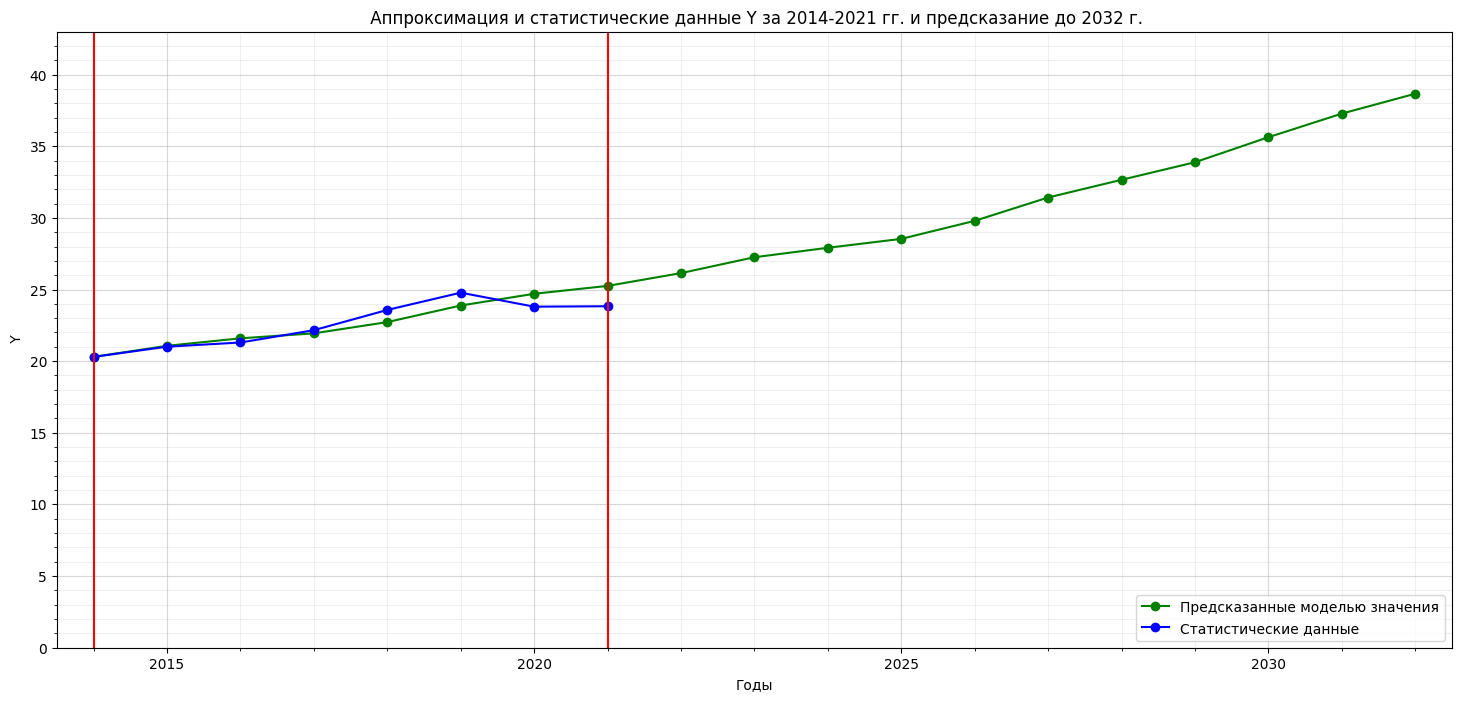

In [183]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_Y_2014_2032_estimation, '-go', label='Предсказанные моделью значения')

ax.plot(YEARS_2014_2021_np_int, Y_2014_2021_stat, '-bo', label='Статистические данные')

ax.vlines(2021, -0.01, 65, color='red')
ax.vlines(2014, -0.01, 65, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(-0.01, 43)

plt.title(' Аппроксимация и статистические данные Y за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')
plt.ylabel(' Y')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(np.arange(2014, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 43, 5))
ax.set_yticks(np.arange(0.0, 43, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

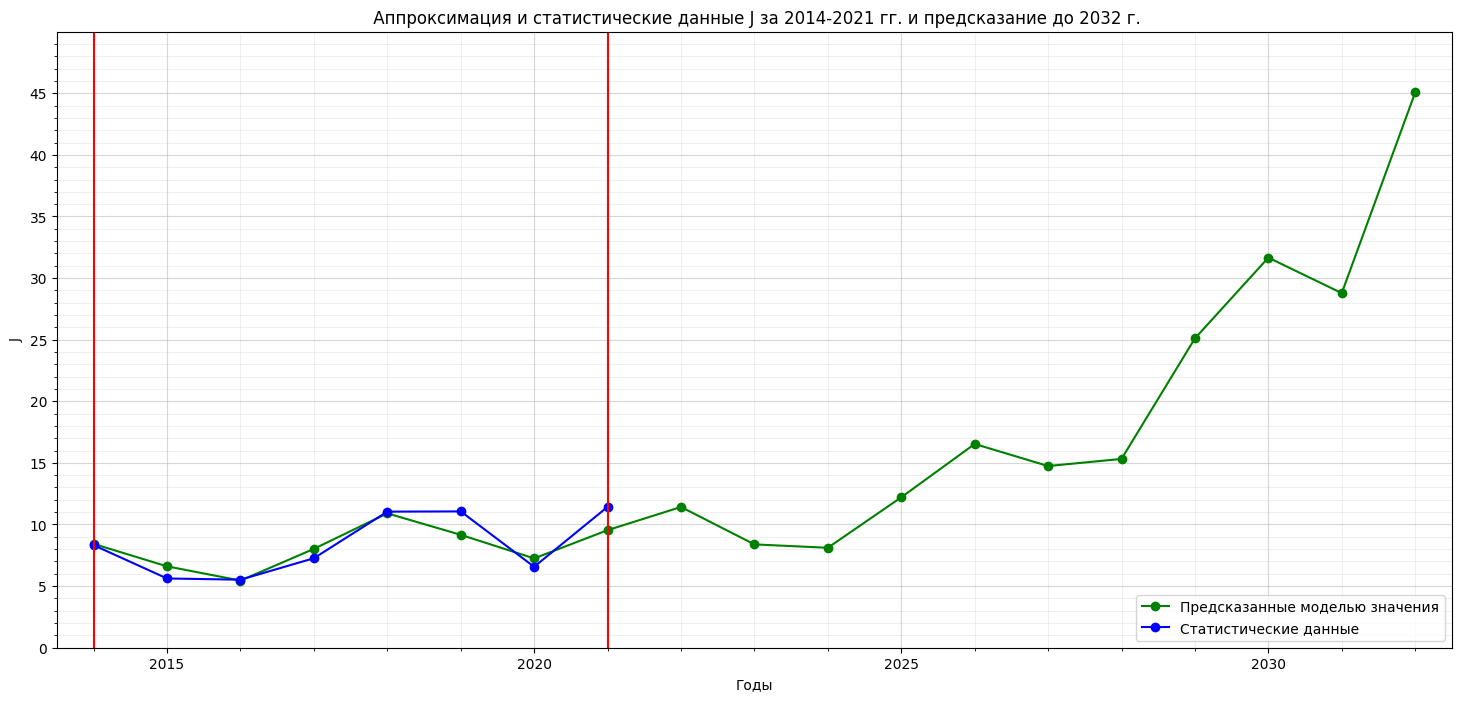

In [184]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_J_2014_2032_estimation, '-go', label='Предсказанные моделью значения')

ax.plot(YEARS_2014_2021_np_int, J_2014_2021_stat, '-bo', label='Статистические данные')

ax.vlines(2021, -0.01, 50, color='red')
ax.vlines(2014, -0.01, 50, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(-0.01, 50)

plt.title(' Аппроксимация и статистические данные J за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')
plt.ylabel('J')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(np.arange(2014, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 50, 5))
ax.set_yticks(np.arange(0.0, 50, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

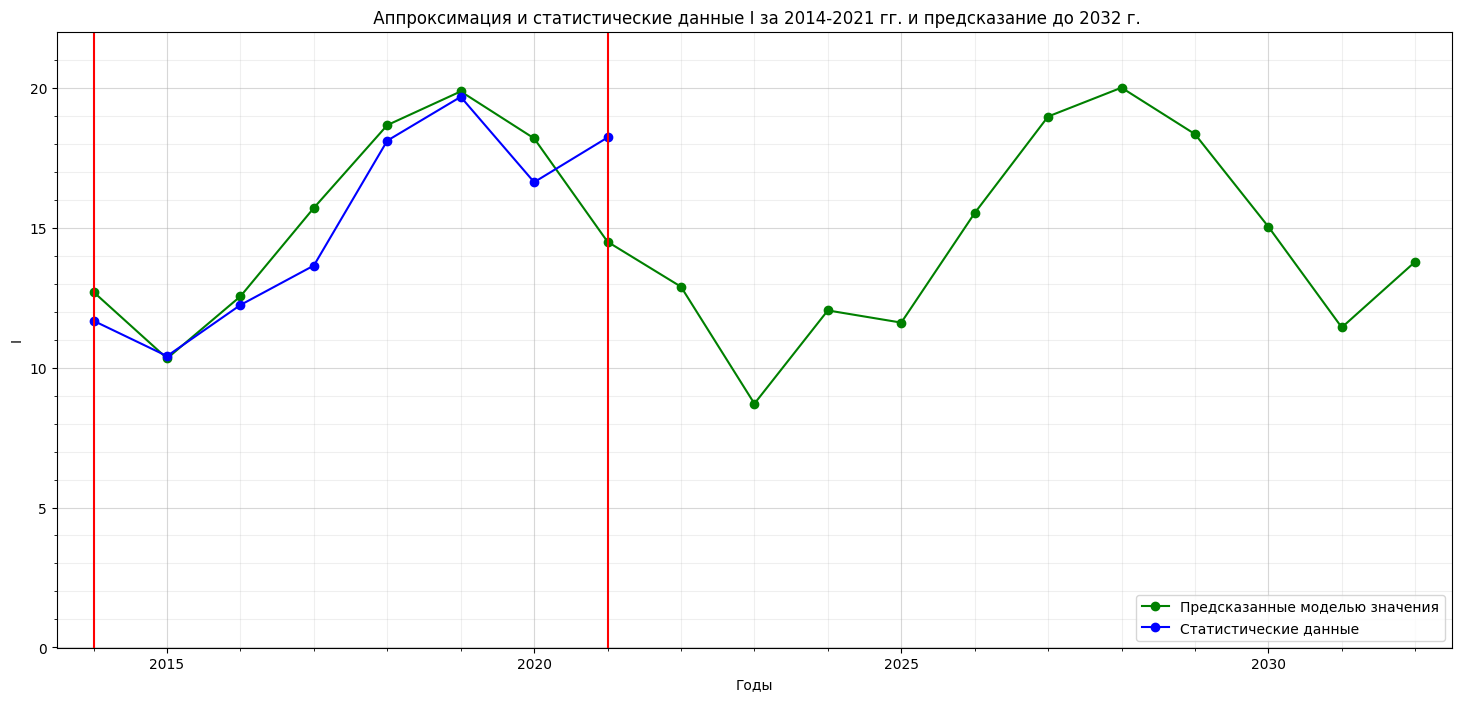

In [185]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_I_2014_2032_estimation, '-go', label='Предсказанные моделью значения')

ax.plot(YEARS_2014_2021_np_int, I_2014_2021_stat, '-bo', label='Статистические данные')

ax.vlines(2021, -0.01, 22, color='red')
ax.vlines(2014, -0.01, 22, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(-0.01, 22)

plt.title(' Аппроксимация и статистические данные I за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')
plt.ylabel('I')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(np.arange(2014, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 22, 5))
ax.set_yticks(np.arange(0.0, 22, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

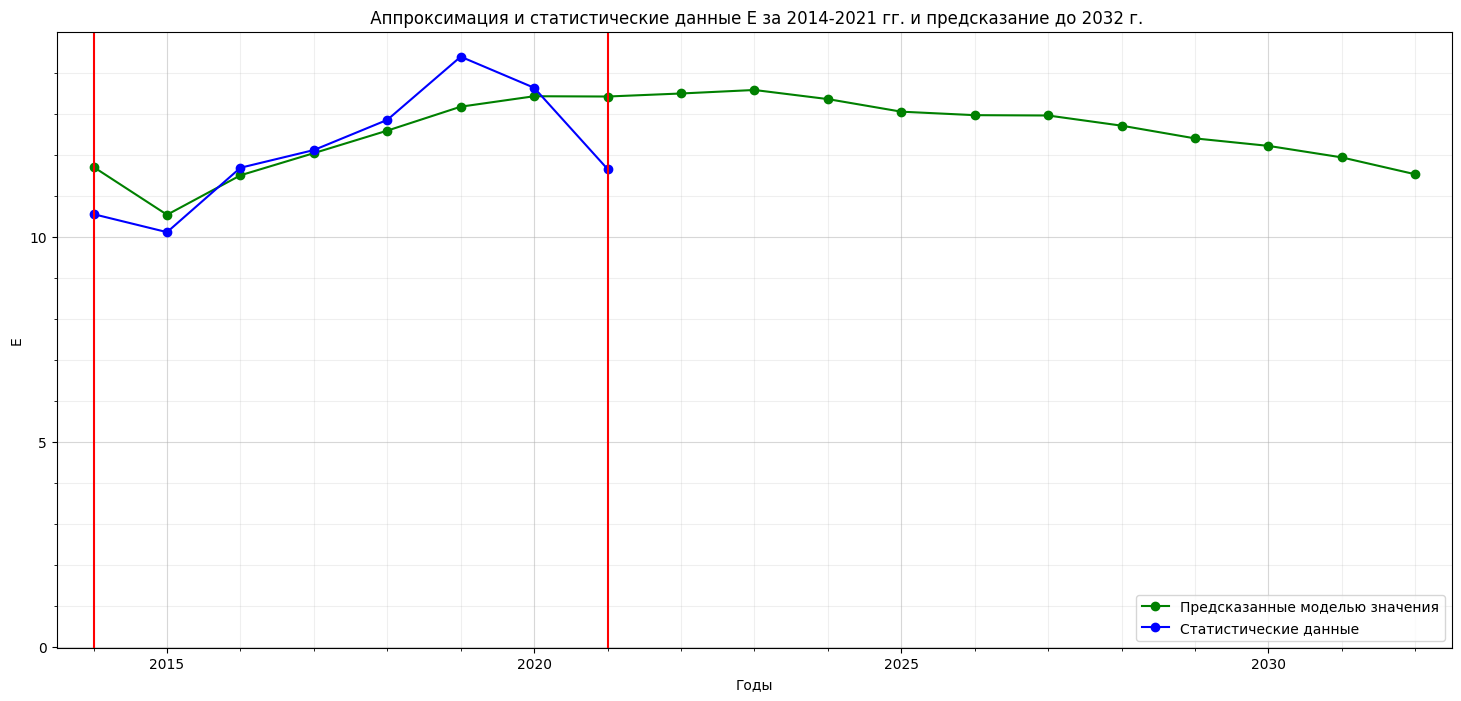

In [186]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_E_2014_2032_estimation, '-go', label='Предсказанные моделью значения')

ax.plot(YEARS_2014_2021_np_int, E_2014_2021_stat, '-bo', label='Статистические данные')

ax.vlines(2021, -0.01, 22, color='red')
ax.vlines(2014, -0.01, 22, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(-0.01, 15)

plt.title(' Аппроксимация и статистические данные E за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')
plt.ylabel('E')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(np.arange(2014, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 15, 5))
ax.set_yticks(np.arange(0.0, 15, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

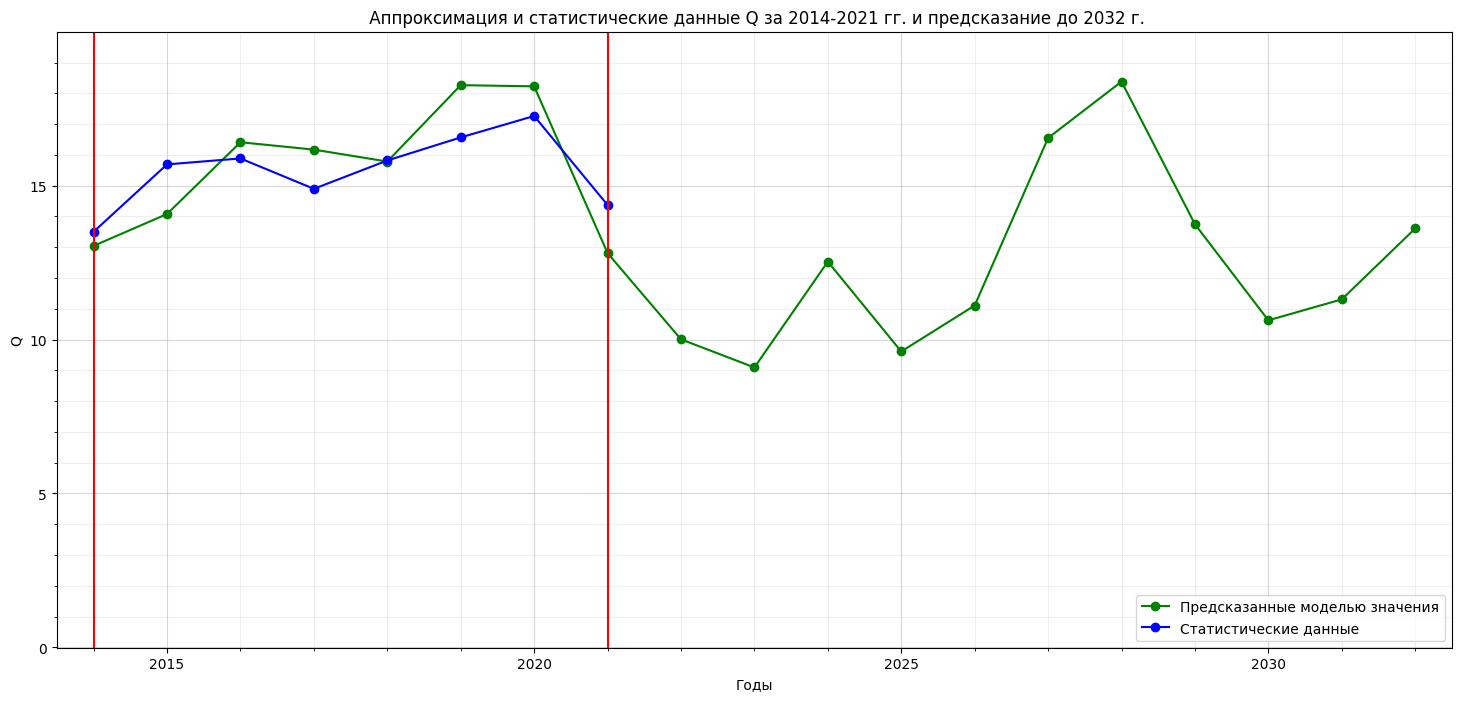

In [187]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_Q_2014_2032_estimation, '-go', label='Предсказанные моделью значения')

ax.plot(YEARS_2014_2021_np_int, Q_2014_2021_stat, '-bo', label='Статистические данные')

ax.vlines(2021, -0.01, 20, color='red')
ax.vlines(2014, -0.01, 20, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(-0.01, 20)

plt.title(' Аппроксимация и статистические данные Q за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')
plt.ylabel('Q')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(np.arange(2014, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 20, 5))
ax.set_yticks(np.arange(0.0, 20, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

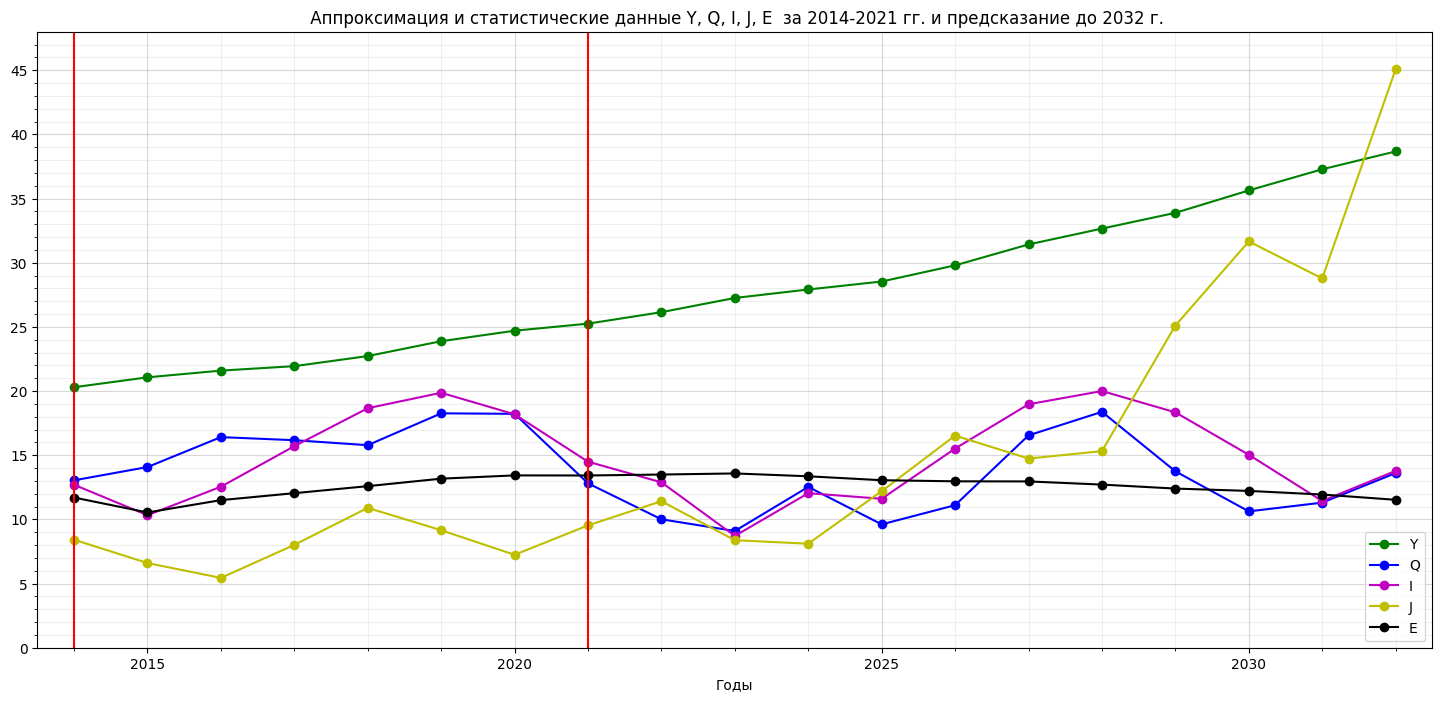

In [188]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_Y_2014_2032_estimation, '-go', label='Y')
ax.plot(YEARS_2014_2032_np_int, best_Q_2014_2032_estimation, '-bo', label='Q')
ax.plot(YEARS_2014_2032_np_int, best_I_2014_2032_estimation, '-mo', label='I')
ax.plot(YEARS_2014_2032_np_int, best_J_2014_2032_estimation, '-yo', label='J')
ax.plot(YEARS_2014_2032_np_int, best_E_2014_2032_estimation, '-ko', label='E')

ax.vlines(2021, -0.01, 48, color='red')
ax.vlines(2014, -0.01, 48, color='red')

plt.xlim(2013.5, 2032.5)
plt.ylim(0, 48)

plt.title(' Аппроксимация и статистические данные Y, Q, I, J, E  за 2014-2021 гг. и предсказание до 2032 г.')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2015, 2033, 5))
ax.set_xticks(np.arange(2014, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 48, 5))
ax.set_yticks(np.arange(0.0, 48, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

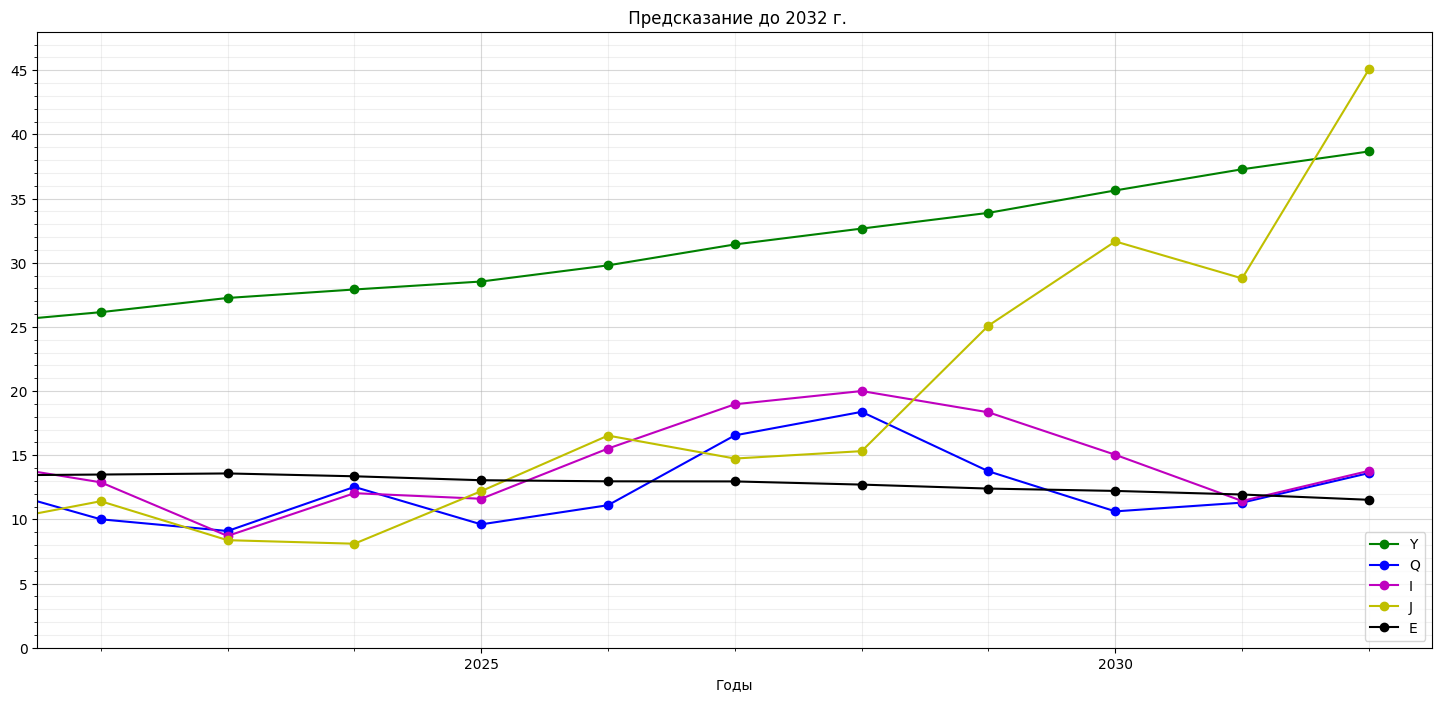

In [189]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(8)

ax.plot(YEARS_2014_2032_np_int, best_Y_2014_2032_estimation, '-go', label='Y')
ax.plot(YEARS_2014_2032_np_int, best_Q_2014_2032_estimation, '-bo', label='Q')
ax.plot(YEARS_2014_2032_np_int, best_I_2014_2032_estimation, '-mo', label='I')
ax.plot(YEARS_2014_2032_np_int, best_J_2014_2032_estimation, '-yo', label='J')
ax.plot(YEARS_2014_2032_np_int, best_E_2014_2032_estimation, '-ko', label='E')

ax.vlines(2021, -0.01, 48, color='red')
ax.vlines(2014, -0.01, 48, color='red')

plt.xlim(2021.5, 2032.5)
plt.ylim(0, 48)

plt.title(' Предсказание до 2032 г.')

plt.xlabel('Годы')

plt.legend(loc=4)

ax.set_xticks(np.arange(2025, 2033, 5))
ax.set_xticks(np.arange(2022, 2033, 1), minor=True)
ax.set_yticks(np.arange(0.0, 48, 5))
ax.set_yticks(np.arange(0.0, 48, 1), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.savefig('Y_Q_I_E_J_predictions.png')
files.download('Y_Q_I_E_J_predictions.png')